<a href="https://colab.research.google.com/github/leobioinf0/SkLearn_Train_Test/blob/main/S11_T01_SkLearn_Train_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# df['DayOfWeek']= df['DayOfWeek'].replace({1 : "Monday", 2 : "Tuesday", 3: "Wednesday", 4 : "Thursday", 5 : "Friday", 6 : "Saturday", 7 : "Sunday" })
# df["DayOfWeek"] = pd.Categorical(df["DayOfWeek"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# df['Month']= df['Month'].replace({1 : "January", 2 : "February", 3: "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 
#                                   8 : "August", 9 : "September", 10: "October", 11 : "November", 12 : "December"})
# df["Month"] = pd.Categorical(df["Month"], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

#df["CancellationCode"] = pd.Categorical(df["CancellationCode"])

In [ ]:
# taxi_out = wheels_off - departure_time
# taxi_in = arrival_time - wheels_on
# air_time = wheels_on - wheels_off
# elapsed_time =air_time + taxi_in + taxi_out

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scikit-learn
!pip install --upgrade matplotlib

In [14]:
import numpy as np

# Data treatment
# ==============================================================================
import pandas as pd

# Preprocessing and modeling
# ==============================================================================
from sklearn.model_selection import train_test_split

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
%matplotlib inline
sns.set(rc={'figure.figsize':(20,5)})

from tqdm import tqdm_notebook
import os

In [31]:
# Path folder configuration
# ===============================================================================

path = '/content/drive/MyDrive/Data_Science_amb_Python/Sprint11-Train_and_Test/SkLearn_Train_Test/'
#path = '/content/'
os.chdir(path)

In [ ]:
file = 'DelayedFlights.csv'
df = pd.read_csv(path+file, index_col=0)
df.describe()

In [43]:
df_s = pd.read_csv('DelayedFlightsSmall.csv', index_col=0)
df_s.describe()

Year          Month  ...  SecurityDelay  LateAircraftDelay
count  203360.0  203360.000000  ...  130952.000000      130952.000000
mean     2008.0       6.100983  ...       0.089277          25.313909
std         0.0       3.482422  ...       1.825905          41.951153
min      2008.0       1.000000  ...       0.000000           0.000000
25%      2008.0       3.000000  ...       0.000000           0.000000
50%      2008.0       6.000000  ...       0.000000           8.000000
75%      2008.0       9.000000  ...       0.000000          33.000000
max      2008.0      12.000000  ...     178.000000         994.000000

[8 rows x 24 columns]

In [ ]:
'DelayedFlightsSmall.csv'

In [39]:
df_small = df.sample(frac=.105)
df_small.reset_index(drop=True, inplace=True)

In [40]:
df_small.to_csv(path_or_buf='DelayedFlightsSmall.csv', 
                sep=',')

In [41]:
!dir -l

total 295982
-rw------- 1 root root    115356 Nov 10 16:57 Boolean_attributes_Proportion.png
-rw------- 1 root root    371390 Nov 10 16:49 Categorical_attributes_distribution.png
-rw------- 1 root root    170478 Nov  6 19:38 Categorical_attributes_proportion.png
-rw------- 1 root root   9417657 Nov  8 17:17 Copia\ de\ S11_T01_SkLearn_Train_Test.ipynb
-rw------- 1 root root   8138799 Nov  6 19:51 Copy\ of\ S11_T01_SkLearn_Train_Test.ipynb
-rw------- 1 root root     82572 Nov  9 16:57 Datetime_attributes_distribution.png
-rw------- 1 root root    283687 Nov  6 23:33 Datetime_attributes_distributions.png
-rw------- 1 root root 247963212 Nov 14  2019 DelayedFlights.csv
-rw------- 1 root root  25554504 Nov 13 06:54 DelayedFlightsSmall.csv
-rw------- 1 root root       151 Nov 10 17:10 Numerical_attributes_distribution.gdoc
-rw------- 1 root root    801143 Nov 13 01:35 Numerical_attributes_distribution.png
-rw------- 1 root root    372722 Nov  6 20:20 Numerical_attributes_distributions.png
-r

In [20]:
os.stat(path+file).st_size

247963212

In [42]:
print(str(os.path.getsize('DelayedFlightsSmall.csv')/1024)+" "+"KB")
print(str(os.path.getsize('DelayedFlightsSmall.csv')/(1024*1024))+" "+"MB")
print(str(os.path.getsize('DelayedFlightsSmall.csv')/(1024*1024*1024))+" "+"GB")

24955.5703125 KB
24.37067413330078 MB
0.023799486458301544 GB


In [ ]:
print(str(os.path.getsize(path+file)/1024)+" "+"KB")
print(str(os.path.getsize(path+file)/(1024*1024))+" "+"MB")
print(str(os.path.getsize(path+file)/(1024*1024*1024))+" "+"GB")

242151.57421875 KB
236.47614669799805 MB
0.23093373700976372 GB


In [27]:
25*1024*1024

26214400

In [28]:

26214400/247963212

0.10571890801285475

In [18]:
df.describe()

Year         Month  ...  SecurityDelay  LateAircraftDelay
count  1936758.0  1.936758e+06  ...   1.247488e+06       1.247488e+06
mean      2008.0  6.111106e+00  ...   9.013714e-02       2.529647e+01
std          0.0  3.482546e+00  ...   2.022714e+00       4.205486e+01
min       2008.0  1.000000e+00  ...   0.000000e+00       0.000000e+00
25%       2008.0  3.000000e+00  ...   0.000000e+00       0.000000e+00
50%       2008.0  6.000000e+00  ...   0.000000e+00       8.000000e+00
75%       2008.0  9.000000e+00  ...   0.000000e+00       3.300000e+01
max       2008.0  1.200000e+01  ...   3.920000e+02       1.316000e+03

[8 rows x 24 columns]

In [11]:
df.describe()

Year          Month  ...  SecurityDelay  LateAircraftDelay
count  280729.000000  280728.000000  ...  185430.000000      185430.000000
mean     2007.992854       1.346246  ...       0.110133          27.008785
std         3.786058       0.475774  ...       1.938947          42.920063
min         2.000000       1.000000  ...       0.000000           0.000000
25%      2008.000000       1.000000  ...       0.000000           0.000000
50%      2008.000000       1.000000  ...       0.000000          11.000000
75%      2008.000000       2.000000  ...       0.000000          36.000000
max      2008.000000       2.000000  ...     149.000000         897.000000

[8 rows x 24 columns]

In [ ]:
df = df.sample(n=10000)

## category: Finite list of values

In [ ]:
# category: Finite list of values

df['TailNum'] = pd.Categorical(df['TailNum'], [str(i) for i in df['TailNum'].unique()].sort())
df['CancellationCode']= df['CancellationCode'].replace({"A" : "carrier", "B" : "weather", "C" : "NAS", "D" : "security", "N" : "none" })

for col in tqdm_notebook(['Year', "Month", 'DayOfWeek', 'DayofMonth', 'UniqueCarrier', 'Origin', 'Dest',"CancellationCode"]):
    df[col] = pd.Categorical(df[col], np.sort(df[col].unique()))

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
df['FlightNum'] = df['FlightNum'].astype(str)
df['FlightNum']  = pd.Categorical(df['FlightNum'], np.sort(df['FlightNum'].unique()))

## bool: True/False values

In [ ]:
# bool: True/False values
df["Diverted"]=df["Diverted"].astype('bool')
df["Cancelled"]=df["Cancelled"].astype('bool')

##int64: Integer numbers

In [ ]:
#int64: Integer numbers
for col in tqdm_notebook(df.select_dtypes(include=['float64']).columns):
    df[col] = df[col].astype('Int64')

  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# Call train_test_split on the data and capture the results
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 130)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

## Checking if the training set was correcly splitted

In [ ]:
# percentage that "X_train" corresponds to the total data
print(round((len(X_train)/len(df)),2))

0.8


In [ ]:
# percentage that "train" corresponds to the total data
print(round((len(X_test)/len(df)),2))

0.2


In [ ]:
print("Full set - Features: ", df.shape)
print("Training set - Features: ", X_train.shape)
print("Test set - Features: ", X_test.shape)

Full set - Features:  (10000, 29)
Training set - Features:  (8000, 29)
Test set - Features:  (2000, 29)


## percentage of null values

In [ ]:
#porcentage de valores nulos en aquellos atributos que tienen nulos
null_df = pd.DataFrame(df.loc[:,df.isnull().any()].isnull().sum()* 100 / len(df), columns=["df_pct"])
null_X_train = pd.DataFrame(X_train.loc[:,X_train.isnull().any()].isnull().sum()* 100 / len(X_train), columns=["X_train_pct"])
null_X_test = pd.DataFrame(X_test.loc[:,X_test.isnull().any()].isnull().sum()* 100 / len(X_test), columns=["X_test_pct"])
null_df.merge(null_X_train,left_index=True, right_index=True).merge(null_X_test,left_index=True, right_index=True)

df_pct  X_train_pct  X_test_pct
ArrTime              0.43       0.4375        0.40
ActualElapsedTime    0.49       0.5000        0.45
AirTime              0.49       0.5000        0.45
ArrDelay             0.49       0.5000        0.45
TaxiIn               0.43       0.4375        0.40
CarrierDelay        35.11      34.9625       35.70
WeatherDelay        35.11      34.9625       35.70
NASDelay            35.11      34.9625       35.70
SecurityDelay       35.11      34.9625       35.70
LateAircraftDelay   35.11      34.9625       35.70

## Study of categorical variables

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

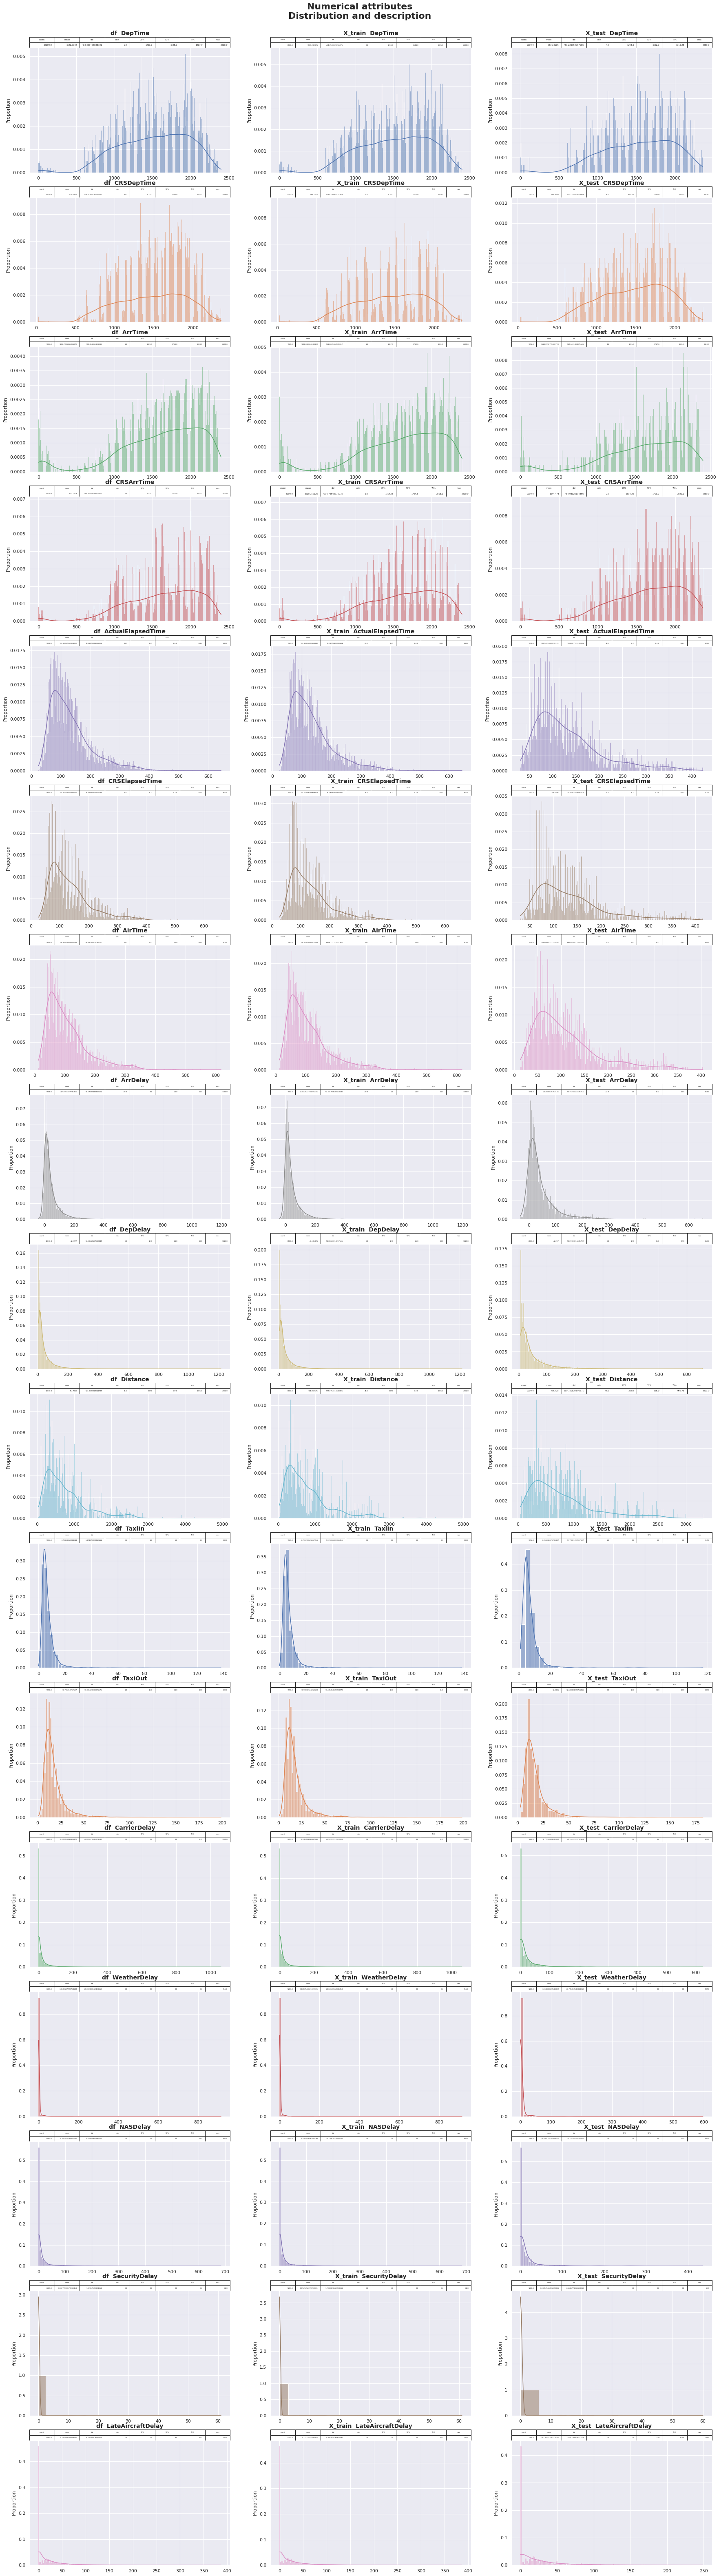

In [ ]:
fig, axes = plt.subplots(nrows=len(num_cols), 
                         ncols=3, 
                         figsize=(30, len(num_cols)*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):

    ttl = "df " if data is df else "X_train " if data is X_train else "X_test "   
    
    for i, colum in enumerate(tqdm_notebook(num_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        
        custom_plots(x=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[i][j])
plt.subplots_adjust(top=0.965)
fig.suptitle(t='Numerical attributes\nDistribution and description',
             fontsize = 22, 
             fontweight = "bold")
plt.savefig(path + "Numerical_attributes_distribution.png")
plt.show()

In [ ]:
desc_table = datos.describe().to_frame().T
desc_table

count      mean        std  min  25%   50%    75%    max
LateAircraftDelay  1286.0  24.77605  37.862207  0.0  0.0  11.0  32.75  249.0

In [ ]:
for v in desc_table.values[0]:
    print(len(str(v)))
    #len(str(v))

6
18
17
3
3
4
5
5


In [ ]:
len(str(desc_table.values[0][0]))

6

In [ ]:
cat_cols = df.select_dtypes(include=['category']).columns
cat_cols

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'Origin', 'Dest', 'CancellationCode'],
      dtype='object')

In [ ]:

dtype(datos)

NameError: ignored

In [ ]:
def custom_plots(x, color, title, ax=None):
    from pandas.api.types import is_categorical_dtype
    
    if ax is None:
        ax = plt.gca()
    if is_categorical_dtype(x):
        desc_table = x.describe().to_frame().T
    else:
        desc_table = round(x.describe(),2).to_frame().T
    
    sns.histplot(x, stat="proportion", color=color, 
                 kde=True, ax=ax, bins=len(x.unique()))
    ax.table(cellText=desc_table.values,
            colLabels=desc_table.columns,
            loc='top')
    ax.set_title(title + ' ' + x.name,
                 fontsize = 14,
                 fontweight = "bold",
                 loc='center',
                 pad=31)
    ax.set_xlabel("")
    return(ax)

In [ ]:
fig, axes = plt.subplots(nrows=len(cat_cols), 
                         ncols=3, 
                         figsize=(30, len(num_cols)*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):
    
    ttl = "df" if data is df else "X_train" if data is X_train else "X_test"   
    
    for i, colum in enumerate(tqdm_notebook(cat_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        
        custom_plots(x=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[i][j])

plt.subplots_adjust(top=0.96)
fig.suptitle(t='Numerical attributes\nDistribution and description',
             fontsize = 20, 
             fontweight = "bold")
#plt.savefig(path + "Numerical_attributes_distribution.png")
plt.show()

In [ ]:
# Graph for each qualitative variable
# ==============================================================================
fig, axes = plt.subplots(nrows=len(cat_cols), 
                         ncols=3, 
                         figsize=(30, len(cat_cols)*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):
    ttl = "df" if data is df else "X_train" if data is X_train else "X_test"   
    
    for i, colum in enumerate(tqdm_notebook(cat_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]

        if datos.nunique() > 31:
            top20 = datos.value_counts().head(20)/ len(datos)
            axes[i][j].barh(y=top20.index,
                           width=top20,
                           color=clr)
            title = ttl + " Top 20"
        else:
            custom_plots(x=datos, 
                        color=clr, 
                        title=ttl, 
                        ax=axes[i][j])

plt.subplots_adjust(top=0.93)
fig.suptitle('Categorical attributes\nDistribution and description',
             fontsize = 20,
             fontweight = "bold")
#plt.savefig(path + "Categorical_attributes_distribution.png")
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

TypeError: ignored

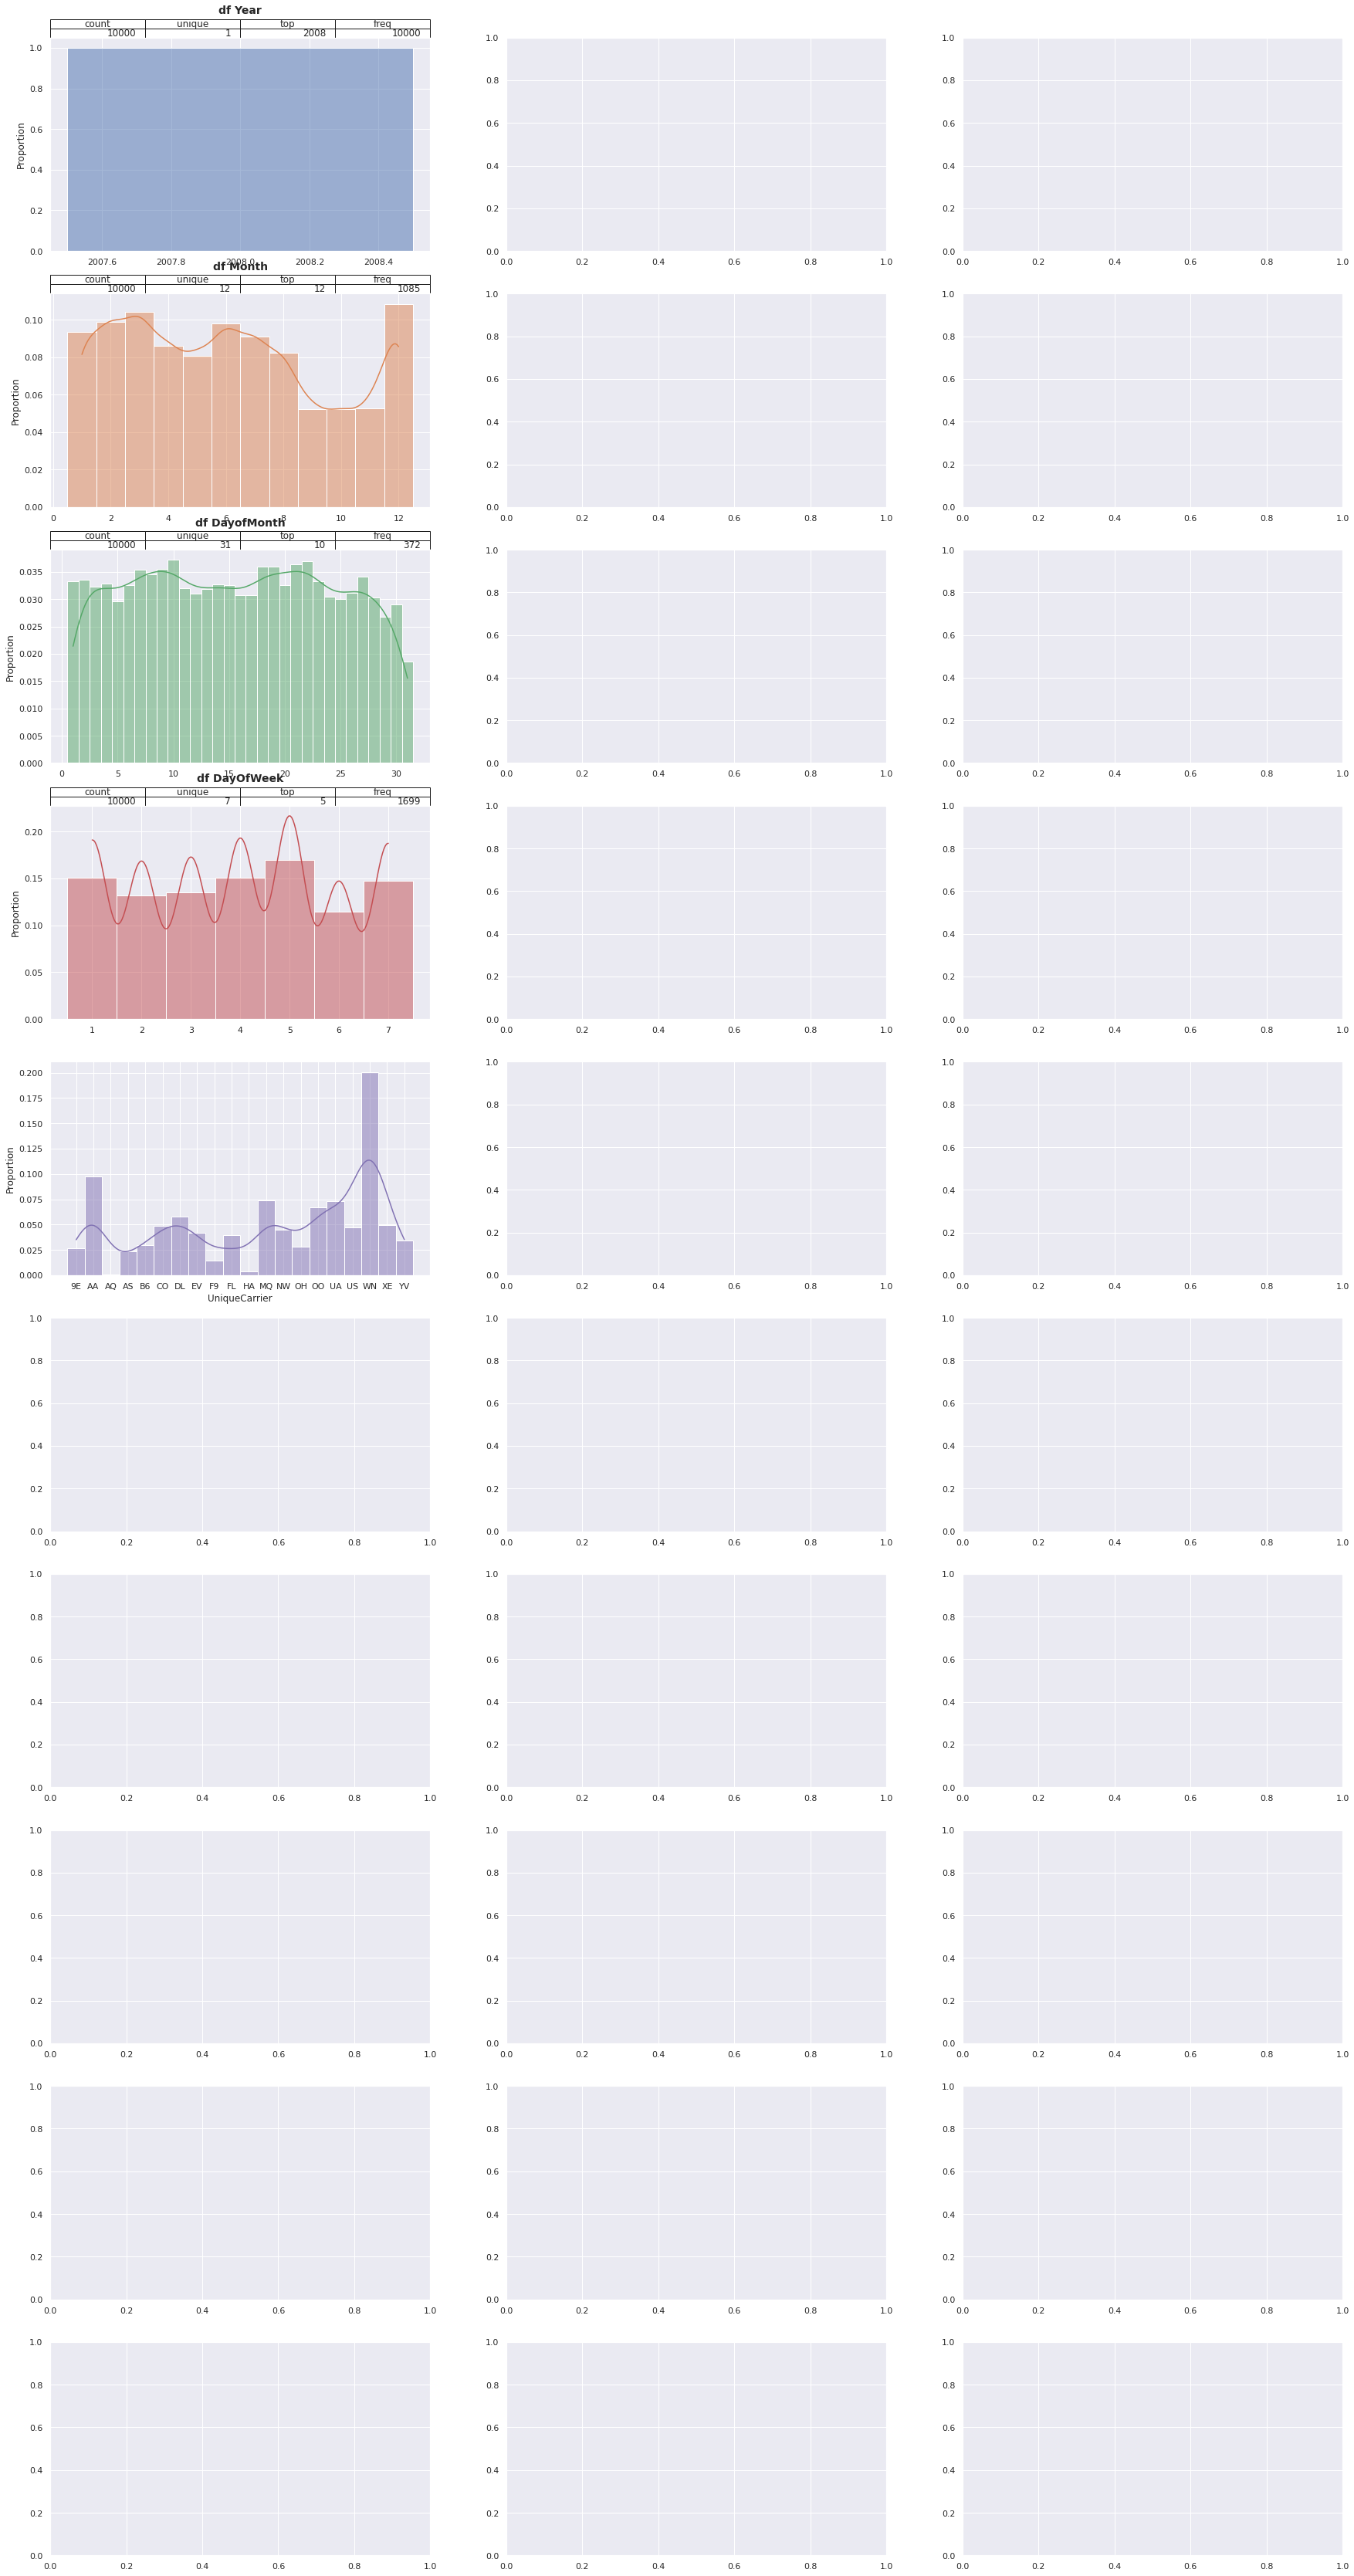

In [ ]:
# Graph for each qualitative variable
# ==============================================================================
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=3, figsize=(24, len(cat_cols)*5))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):
    desc_table = data.describe(include=['category']).T
    for i, colum in enumerate(tqdm_notebook(cat_cols)):
        if data[colum].nunique() > 31:
            top20 = data[colum].value_counts().head(20)/ len(data[colum])
            axes[i][j].barh(y=top20.index,
                           width=top20,
                           color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
            title = "df Top 20 " if data is df else "X_train Top 20 " if data is X_train else "X_test Top 20 "
        else:
            sns.histplot(data=data,
                    y=colum,
                    stat="proportion",
                    color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                    ax=axes[i][j])
            title = "df " if data is df else "X_train " if data is X_train else "X_test "
        desc_table_ = axes[i][j].table(cellText=desc_table.loc[[colum]].values,
                        colLabels=desc_table.loc[[colum]].columns,
                        rowLabels=desc_table.loc[[colum]].index,
                        loc='top', 
                        colWidths=[0.13, 0.09, 0.14, 0.13])
        desc_table_.auto_set_font_size(False)
        desc_table_.set_fontsize(11)
        axes[i][j].set_title(title + colum,
                            fontsize = 14,
                            fontweight = "bold",
                            loc='center',
                            pad=-14)
        axes[i][j].tick_params(labelsize = 12)
        axes[i][j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top=0.93)
fig.suptitle('Categorical attributes\nDistribution and description',
             fontsize = 20,
             fontweight = "bold")
plt.savefig(path + "Categorical_attributes_distribution.png")
plt.show()

## Study of numerical variables

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(30, len(num_cols)*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):
    desc_table = round(data.describe(include=['number']),1).T
    title = "df " if data is df else "X_train " if data is X_train else "X_test "   
    for i, colum in enumerate(tqdm_notebook(num_cols)):
        sns.histplot(data=data,
                    x=colum,
                    stat="proportion",
                    color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                    ax=axes[i][j],
                    bins=len(df[colum].unique()))
        desc_table_ = axes[i][j].table(cellText=desc_table.loc[[colum]].values,
                                    colLabels=desc_table.loc[[colum]].columns,
                                    rowLabels=desc_table.loc[[colum]].index,
                                    loc='top', 
                                    colWidths=[0.11, 0.08, 0.07, 0.06, 0.08, 0.08, 0.08, 0.08])
        desc_table_.auto_set_font_size(False)
        desc_table_.set_fontsize(11)
        axes[i][j].set_title(title+colum,
                            fontsize = 14,
                            fontweight = "bold",
                            loc='center',
                            pad=-14)
        axes[i][j].tick_params(labelsize = 12)
        axes[i][j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top=0.96)
fig.suptitle(t='Numerical attributes\nDistribution and description',
             fontsize = 20, 
             fontweight = "bold")
plt.savefig(path + "Numerical_attributes_distribution.png")
plt.show()

## Study of Boolean variables

In [ ]:
bool_cols = df.select_dtypes(include=['bool']).columns
bool_cols

Index(['Cancelled', 'Diverted'], dtype='object')

In [ ]:
fig, axes = plt.subplots(nrows=len(bool_cols), ncols=3, figsize=(30, len(bool_cols)*6))
for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):
    desc_table = data.describe(include=['bool']).T
    title = "df " if data is df else "X_train " if data is X_train else "X_test "   
    
    for i, colum in enumerate(tqdm_notebook(bool_cols)):
        axes[i][j].pie(data[colum].value_counts(),
                       labels = ['False', 'True'], 
                       startangle=45,
                       autopct=lambda p: '{:.3f}%({:.0f})'.format(p,(p/100)*len(data[colum])))
        desc_table_ = axes[i][j].table(cellText=desc_table.loc[[colum]].values,
                                    colLabels=desc_table.loc[[colum]].columns,
                                    rowLabels=desc_table.loc[[colum]].index,
                                    loc='top',
                                    colWidths=[0.15, 0.1, 0.1, 0.15])
        desc_table_.auto_set_font_size(False)
        desc_table_.set_fontsize(11)
        axes[i][j].set_title(title+colum,
                            fontsize = 14,
                            fontweight = "bold",
                            loc='center',
                            pad=-14)
        axes[i][j].tick_params(labelsize = 12)
        axes[i][j].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle(t='Boolean attributes\nProportion and description',
             fontsize = 20, 
             fontweight = "bold")
plt.savefig(path + "Boolean_attributes_Proportion.png")
plt.show()

### Exercise 2: 
  - Apply some transformation process (standardize numerical data, create dummy columns, polynomials.

In [ ]:
# Path folder configuration
# ===============================================================================

path = '/content/drive/MyDrive/Data_Science_amb_Python/Sprint11-Train_and_Test/SkLearn_Train_Test/'
file = 'DelayedFlights.csv'
df = pd.read_csv(path+file, index_col=0)

# category: Finite list of values
df['TailNum'] = pd.Categorical(df['TailNum'], [str(i) for i in df['TailNum'].unique()].sort())
df['CancellationCode']= df['CancellationCode'].replace({"A" : "carrier", "B" : "weather", "C" : "NAS", "D" : "security", "N" : "none" })

df['FlightNum'] = df['FlightNum'].astype(str)
df['FlightNum']  = pd.Categorical(df['FlightNum'], np.sort(df['FlightNum'].unique()))

for col in tqdm_notebook(['Year', "Month", 'DayOfWeek', 'DayofMonth', 'UniqueCarrier', 'Origin', 'Dest',"CancellationCode"]):
    df[col] = pd.Categorical(df[col], np.sort(df[col].unique()))

# bool: True/False values
df["Diverted"]=df["Diverted"].astype('bool')
df["Cancelled"]=df["Cancelled"].astype('bool')

#int64: Integer numbers
for col in tqdm_notebook(df.select_dtypes(include=['float64']).columns):
    df[col] = df[col].astype('Int64')

# Call train_test_split on the data and capture the results
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 130)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

## Impute missing values

In [ ]:
from sklearn.impute import SimpleImputer

for data in tqdm_notebook([df, X_train, X_test]):
    for col in tqdm_notebook(data.columns[data.isna().any()].tolist()):
        if data[col].dtypes == "Int64":
            data[[col]] = SimpleImputer(strategy="mean").fit_transform(data[[col]])
        elif data[col].dtypes == "category":
            data[[col]] = SimpleImputer(strategy="most_frequent").fit_transform(data[[col]])
            df[col] = pd.Categorical(df[col], np.sort(df[col].unique()))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
df.isna().sum()

## Create column "Date_"
-  Create column "Date_" from "Year", "Month" and "Day of Month".
-  The "dtype" is: `datetime64[ns]`

In [ ]:
for data in tqdm_notebook([df, X_train, X_test]):
    data["Date_"]=pd.to_datetime(dict(year=data.Year, month=data.Month, day=data.DayofMonth))

  0%|          | 0/3 [00:00<?, ?it/s]

## datetime.time
- Transform columns ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"] from Int64 to time (HH:MM:SS)
-  The "dtype" is: `datetime.time`

In [ ]:
def numToTime(x):
    """
    Convert aeronautical time to datetime.time object
    """
    from datetime import time
    if pd.isnull(x):
        return np.nan
    else:
        x = str(int(x))
        h = x[:-2]
        if h == "" or h == "24":
            h = "0"
        m = x[-2:]
        return time(int(h), int(m))

In [ ]:
for data in tqdm_notebook([df, X_train, X_test]):
    for column in tqdm_notebook(["DepTime","CRSDepTime","ArrTime","CRSArrTime"]):
        data[column+"_time"] = data[column].apply(numToTime)
        data[column+"_datetime"] = pd.to_datetime(dict(year=data.Year,
                                                       month=data.Month,
                                                       day=data.DayofMonth,
                                                       hour=[t.hour for t in data[column+"_time"]],
                                                       minute=[t.minute for t in data[column+"_time"]]),
                                                  format='%m-%d-%Y %H:%M')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
minutes_cols = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 
                'DepDelay','TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
                'NASDelay','SecurityDelay', 'LateAircraftDelay']

In [ ]:
X_test[minutes_cols].isna().sum()

ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), minutes_cols),
    (MaxAbsScaler(), minutes_cols),
    (StandardScaler(), minutes_cols),
    (RobustScaler(), minutes_cols),
    (QuantileTransformer(), minutes_cols),
    (PowerTransformer(), minutes_cols))
X_test_transformed = ct.fit_transform(X_test)

In [ ]:
X_test_transformed = pd.DataFrame(data=X_test_transformed,
                              columns=[j+"_"+i for i in list(ct.named_transformers_)[:-1] for j in minutes_cols])

In [ ]:
X_test = pd.concat([X_test, X_test_transformed], axis=1)

In [ ]:
X_test

Year  ... LateAircraftDelay_powertransformer
0       2008  ...                          -1.387596
1       2008  ...                           0.452603
2       2008  ...                           1.186624
3       2008  ...                          -1.387596
4       2008  ...                           0.031539
...      ...  ...                                ...
387347  2008  ...                          -1.387596
387348  2008  ...                          -1.387596
387349  2008  ...                           0.452603
387350  2008  ...                           0.452603
387351  2008  ...                           0.311583

[387352 rows x 110 columns]

In [ ]:
X_test= X_test.sample(n=1000)

In [ ]:
round(X_test[transf].describe(),1).values

array([ 1.0e+03, -0.0e+00,  1.0e+00, -1.4e+00, -1.4e+00,  5.0e-01,
        5.0e-01,  3.0e+00])

In [ ]:
round(X_test[transf].describe(),1).index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
pd.DataFrame(round(X_test[transf].describe(),1).T)

ActualElapsedTime
count             1000.0
mean               136.3
std                 73.8
min                 32.0
25%                 82.0
50%                118.5
75%                170.0
max                488.0

In [ ]:
desc_table_ = axes[r][c].table(cellText=round(X_test[transf].describe(),1).values,
                                    colLabels=round(X_test[transf].describe(),1).index,
                                    loc='top',
                                    colWidths=[0.15, 0.1, 0.1, 0.15,0.15, 0.1, 0.1, 0.15])

In [ ]:
data=X_test.filter(regex=(min_col))
data

ActualElapsedTime  ...  ActualElapsedTime_powertransformer
149688              220.0  ...                            1.237991
348000              129.0  ...                            0.217177
241747              111.0  ...                           -0.080403
132023               65.0  ...                           -1.176545
373662              127.0  ...                            0.186446
...                   ...  ...                                 ...
332002              148.0  ...                            0.485312
204967              245.0  ...                            1.437036
272625              243.0  ...                            1.421957
231711              105.0  ...                           -0.191579
293172               93.0  ...                           -0.436520

[1000 rows x 7 columns]

In [ ]:
desc_table = round(data.describe(), 1).T
desc_table

count   mean   std  ...    50%    75%    max
ActualElapsedTime                      1000.0  136.3  73.8  ...  118.5  170.0  488.0
ActualElapsedTime_minmaxscaler         1000.0    0.2   0.1  ...    0.1    0.2    0.6
ActualElapsedTime_maxabsscaler         1000.0    0.2   0.1  ...    0.2    0.2    0.7
ActualElapsedTime_standardscaler       1000.0    0.0   1.0  ...   -0.2    0.5    4.9
ActualElapsedTime_robustscaler         1000.0    0.2   0.9  ...    0.0    0.6    4.4
ActualElapsedTime_quantiletransformer  1000.0    0.5   0.3  ...    0.5    0.8    1.0
ActualElapsedTime_powertransformer     1000.0    0.0   1.0  ...    0.0    0.8    2.7

[7 rows x 8 columns]

In [ ]:
desc_table.loc[[transf]]

count   mean   std   min   25%    50%    75%    max
ActualElapsedTime  1000.0  136.3  73.8  32.0  82.0  118.5  170.0  488.0

  0%|          | 0/12 [00:00<?, ?it/s]

ActualElapsedTime


  0%|          | 0/7 [00:00<?, ?it/s]

ActualElapsedTime
ActualElapsedTime_minmaxscaler
ActualElapsedTime_maxabsscaler
ActualElapsedTime_standardscaler
ActualElapsedTime_robustscaler
ActualElapsedTime_quantiletransformer
ActualElapsedTime_powertransformer
CRSElapsedTime


  0%|          | 0/7 [00:00<?, ?it/s]

CRSElapsedTime
CRSElapsedTime_minmaxscaler
CRSElapsedTime_maxabsscaler
CRSElapsedTime_standardscaler
CRSElapsedTime_robustscaler
CRSElapsedTime_quantiletransformer
CRSElapsedTime_powertransformer
AirTime


  0%|          | 0/7 [00:00<?, ?it/s]

AirTime
AirTime_minmaxscaler
AirTime_maxabsscaler
AirTime_standardscaler
AirTime_robustscaler
AirTime_quantiletransformer
AirTime_powertransformer
ArrDelay


  0%|          | 0/7 [00:00<?, ?it/s]

ArrDelay
ArrDelay_minmaxscaler
ArrDelay_maxabsscaler
ArrDelay_standardscaler
ArrDelay_robustscaler
ArrDelay_quantiletransformer
ArrDelay_powertransformer
DepDelay


  0%|          | 0/7 [00:00<?, ?it/s]

DepDelay
DepDelay_minmaxscaler
DepDelay_maxabsscaler
DepDelay_standardscaler
DepDelay_robustscaler
DepDelay_quantiletransformer
DepDelay_powertransformer
TaxiIn


  0%|          | 0/7 [00:00<?, ?it/s]

TaxiIn
TaxiIn_minmaxscaler
TaxiIn_maxabsscaler
TaxiIn_standardscaler
TaxiIn_robustscaler
TaxiIn_quantiletransformer
TaxiIn_powertransformer
TaxiOut


  0%|          | 0/7 [00:00<?, ?it/s]

TaxiOut
TaxiOut_minmaxscaler
TaxiOut_maxabsscaler
TaxiOut_standardscaler
TaxiOut_robustscaler
TaxiOut_quantiletransformer
TaxiOut_powertransformer
CarrierDelay


  0%|          | 0/7 [00:00<?, ?it/s]

CarrierDelay
CarrierDelay_minmaxscaler
CarrierDelay_maxabsscaler
CarrierDelay_standardscaler
CarrierDelay_robustscaler
CarrierDelay_quantiletransformer
CarrierDelay_powertransformer
WeatherDelay


  0%|          | 0/7 [00:00<?, ?it/s]

WeatherDelay
WeatherDelay_minmaxscaler
WeatherDelay_maxabsscaler
WeatherDelay_standardscaler
WeatherDelay_robustscaler
WeatherDelay_quantiletransformer
WeatherDelay_powertransformer
NASDelay


  0%|          | 0/7 [00:00<?, ?it/s]

NASDelay
NASDelay_minmaxscaler
NASDelay_maxabsscaler
NASDelay_standardscaler
NASDelay_robustscaler
NASDelay_quantiletransformer
NASDelay_powertransformer
SecurityDelay


  0%|          | 0/7 [00:00<?, ?it/s]

SecurityDelay
SecurityDelay_minmaxscaler
SecurityDelay_maxabsscaler
SecurityDelay_standardscaler
SecurityDelay_robustscaler
SecurityDelay_quantiletransformer
SecurityDelay_powertransformer
LateAircraftDelay


  0%|          | 0/7 [00:00<?, ?it/s]

LateAircraftDelay
LateAircraftDelay_minmaxscaler
LateAircraftDelay_maxabsscaler
LateAircraftDelay_standardscaler
LateAircraftDelay_robustscaler
LateAircraftDelay_quantiletransformer
LateAircraftDelay_powertransformer


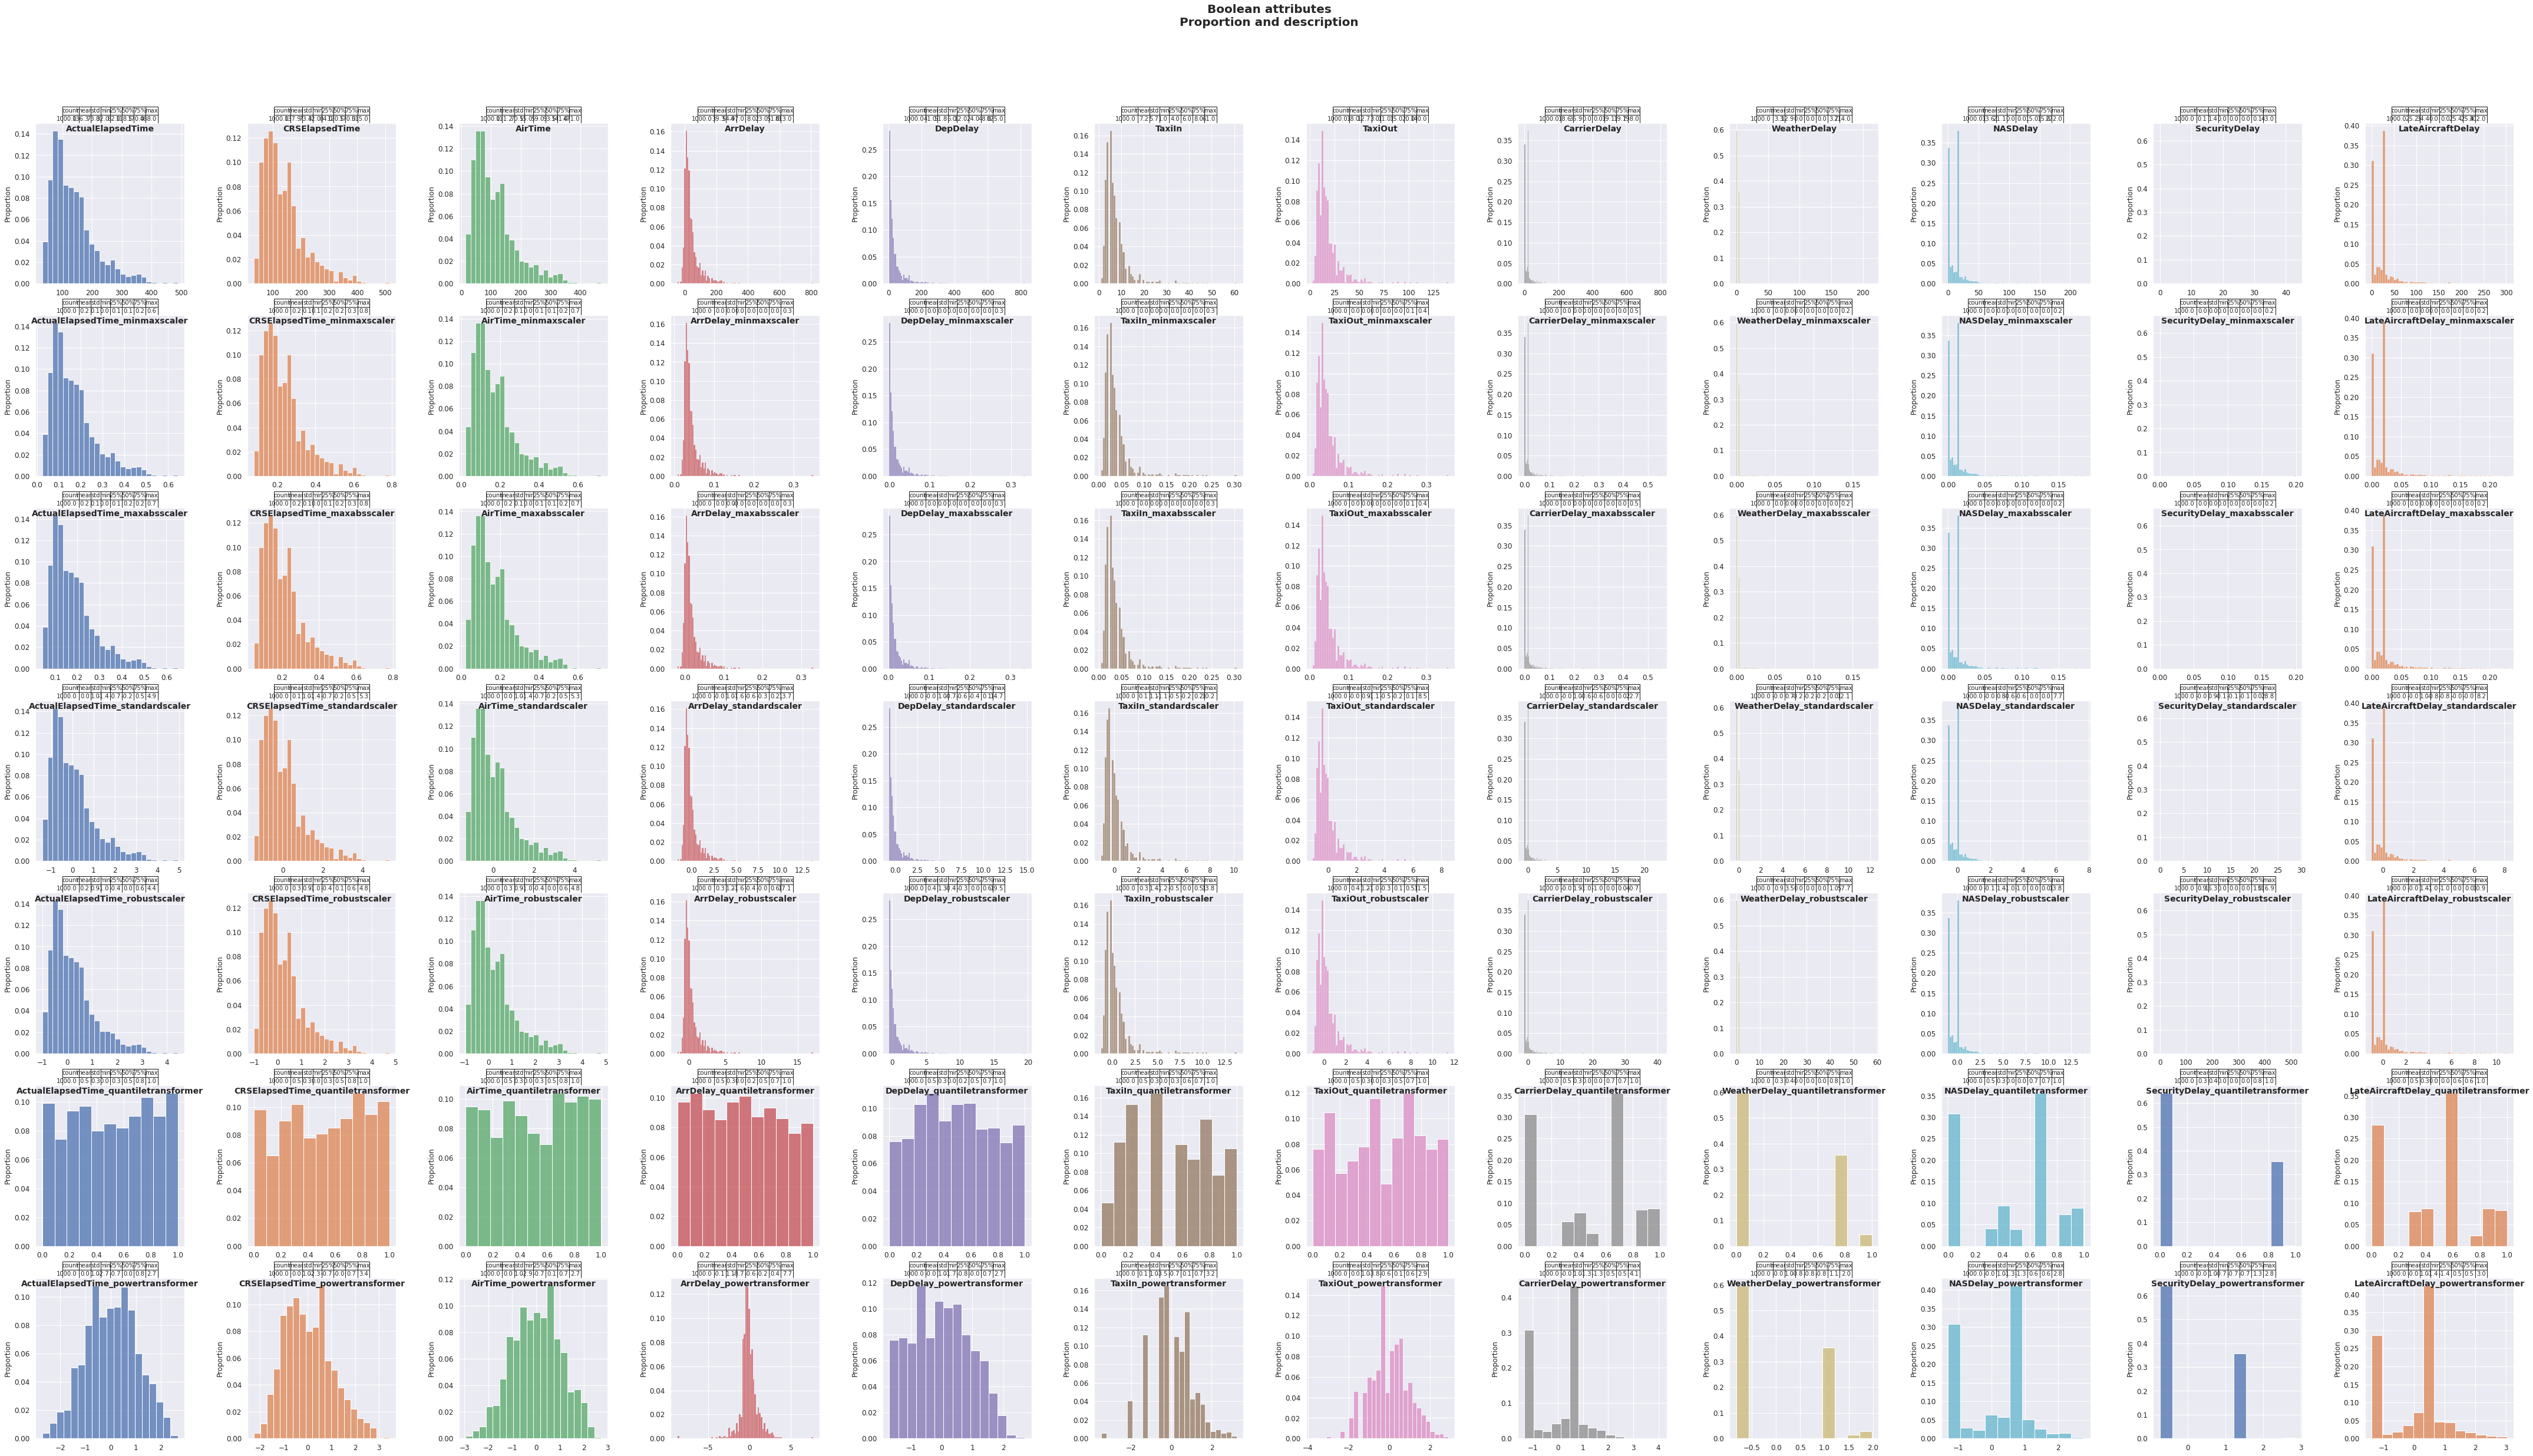

In [ ]:
fig, axes = plt.subplots(nrows=len(ct.named_transformers_), ncols=len(minutes_cols), figsize=(len(minutes_cols)*5, len(ct.named_transformers_)*5))
for c, min_col in enumerate(tqdm_notebook(minutes_cols)):
    print(min_col)
    data=X_test.filter(regex=(min_col))
    desc_table = round(data.describe(), 1).T
    transformaciones = data.columns
    for r, transf in enumerate(tqdm_notebook(transformaciones)):
        print(transf)
        sns.histplot(data=data,
            x=transf,
            stat="proportion",
            color=(list(plt.rcParams['axes.prop_cycle'])*2)[c]["color"],
            ax=axes[r][c])
        desc_table_ = axes[r][c].table(cellText=desc_table.loc[[transf]].values,
                                    colLabels=desc_table.loc[[transf]].columns,
                                    loc='top',
                                    colWidths=[0.11, 0.08, 0.07, 0.06, 0.08, 0.08, 0.08, 0.08])
        desc_table_.auto_set_font_size(False)
        desc_table_.set_fontsize(10)
        axes[r][c].set_title(transf,
                            fontsize = 14,
                            fontweight = "bold",
                            loc='center',
                            pad=-14)
        axes[r][c].tick_params(labelsize = 12)
        axes[r][c].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle(t='Boolean attributes\nProportion and description',
             fontsize = 20, 
             fontweight = "bold")
#plt.savefig(path + "Boolean_attributes_Proportion.png")
plt.show()

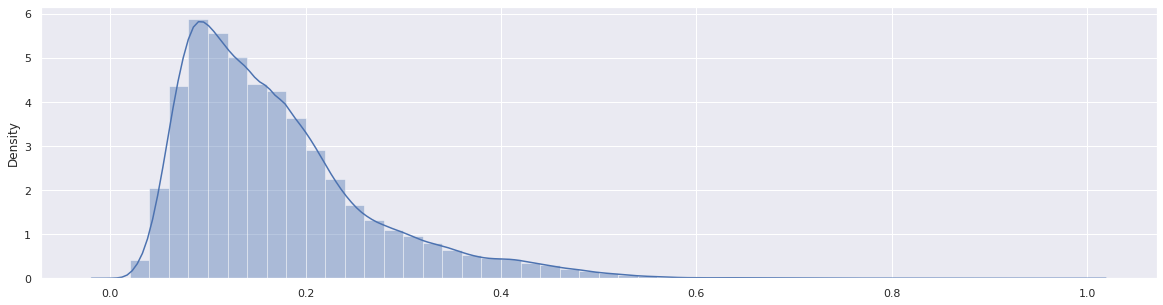

In [ ]:
sns.distplot(X_test[["ActualElapsedTime_minmaxscaler","ActualElapsedTime_maxabsscaler"]])

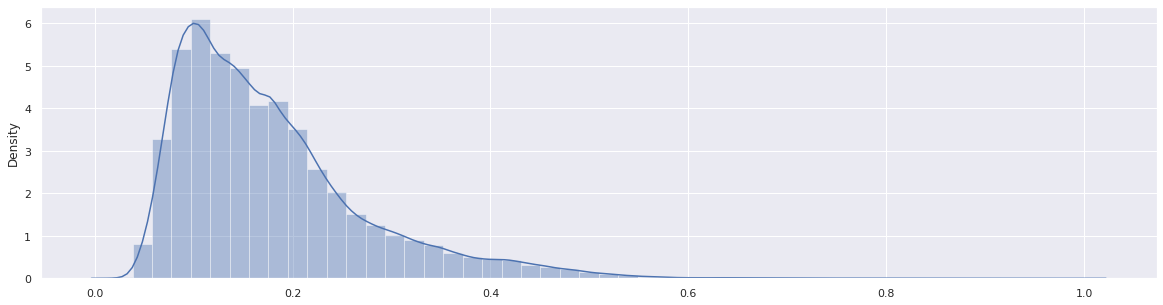

In [ ]:
sns.distplot(X_test[["ActualElapsedTime_maxabsscaler"]], )

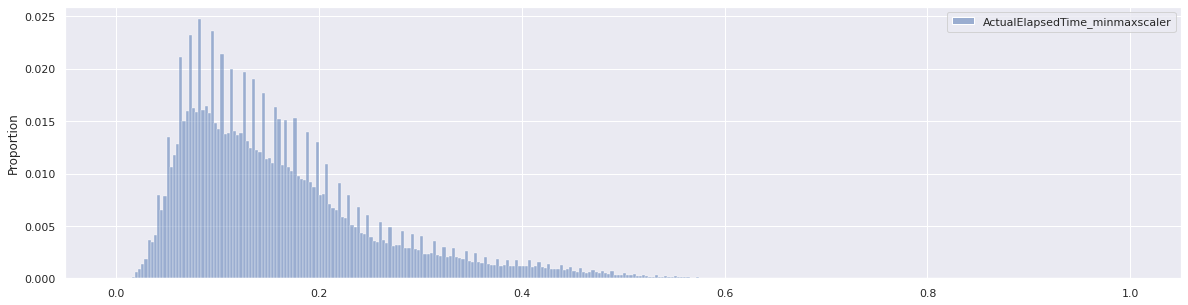

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_minmaxscaler"]], stat="proportion")

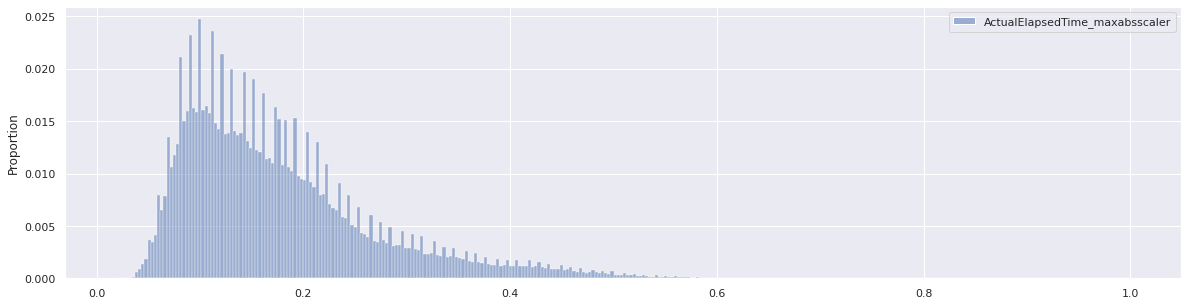

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_maxabsscaler"]], stat="proportion")

No handles with labels found to put in legend.


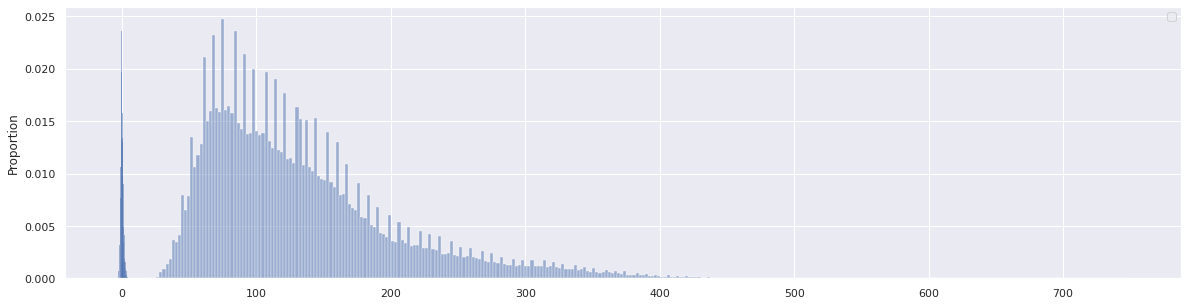

In [ ]:
sns.histplot(X_test[["ActualElapsedTime"]], stat="proportion")
sns.histplot(X_test[["ActualElapsedTime_minmaxscaler"]], stat="proportion")
sns.histplot(X_test[["ActualElapsedTime_maxabsscaler"]], stat="proportion")
sns.histplot(X_test[["ActualElapsedTime_standardscaler"]], stat="proportion")
sns.histplot(X_test[["ActualElapsedTime_robustscaler"]], stat="proportion")
sns.histplot(X_test[["ActualElapsedTime_quantiletransformer"]], stat="proportion")
sns.histplot(X_test[["ActualElapsedTime_powertransformer"]], stat="proportion")
plt.legend() 
plt.show()

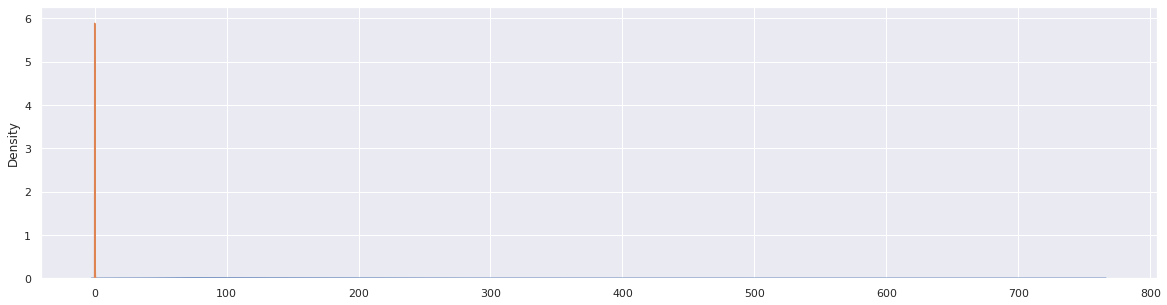

In [ ]:
sns.distplot(X_test[["ActualElapsedTime"]])
sns.distplot(X_test[["ActualElapsedTime_minmaxscaler"]])

<AxesSubplot:ylabel='Proportion'>

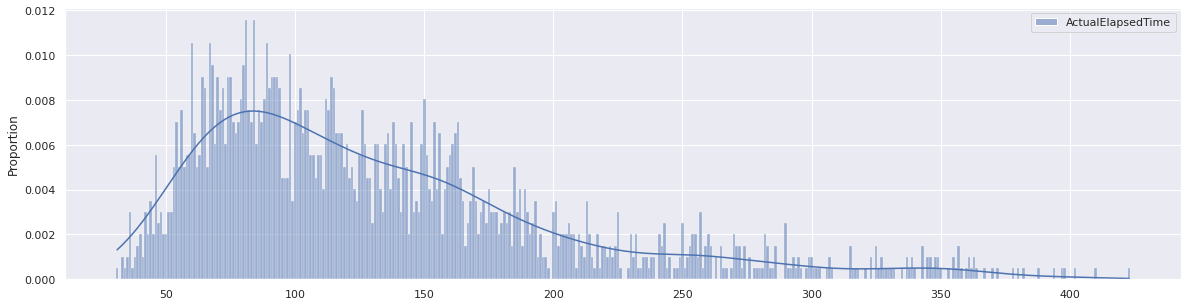

In [ ]:
sns.histplot(X_test[["ActualElapsedTime"]], stat="proportion", kde=True)

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_minmaxscaler"]], stat="proportion")

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_maxabsscaler"]], stat="proportion")

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_standardscaler"]], stat="proportion")

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_robustscaler"]], stat="proportion")

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_quantiletransformer"]], stat="proportion")

In [ ]:
sns.histplot(X_test[["ActualElapsedTime_powertransformer"]], stat="proportion")

In [ ]:
ActualElapsedTime_maxabsscaler	ActualElapsedTime_standardscaler	ActualElapsedTime_robustscaler	ActualElapsedTime_quantiletransformer	ActualElapsedTime_powertransformer

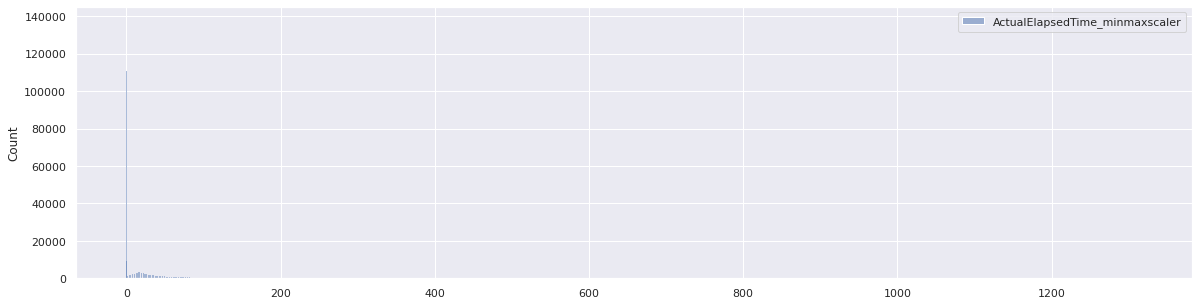

In [ ]:
sns.histplot(X_test[["ActualElapsedTime"]])
sns.histplot(X_test[["ActualElapsedTime_minmaxscaler"]])

In [ ]:
X_test[["ActualElapsedTime_MinMaxScaler"]] = pd.DataFrame(MinMaxScaler().fit_transform(X_test[["ActualElapsedTime"]]))

In [ ]:
X_test[["ActualElapsedTime_MinMaxScaler"]].describe()

In [ ]:
sns.distplot(pd.DataFrame(MinMaxScaler().fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
sns.distplot(pd.DataFrame(MaxAbsScaler().fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
sns.distplot(pd.DataFrame(StandardScaler().fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
sns.distplot(pd.DataFrame(QuantileTransformer(random_state=0,  output_distribution='uniform').fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
sns.distplot(pd.DataFrame(RobustScaler().fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
sns.histplot(pd.DataFrame(PowerTransformer(method = 'box-cox').fit_transform(X_test[["ActualElapsedTime"]])), label="PowerTransformer", kde=True)
plt.legend() 
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})

In [ ]:
stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"]

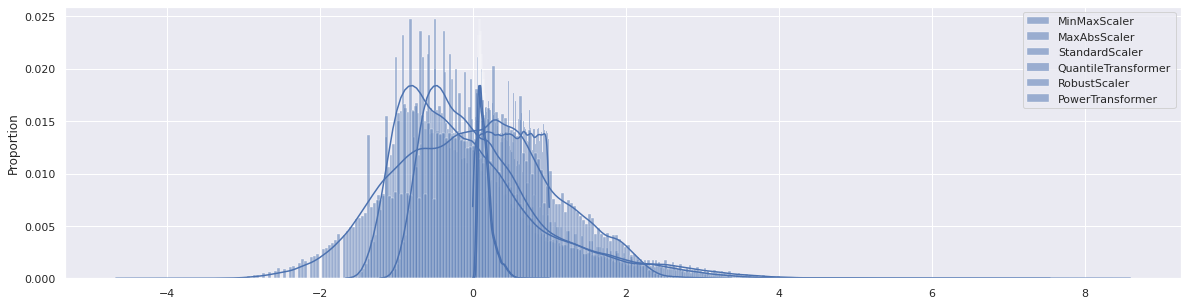

In [ ]:
sns.histplot(pd.DataFrame(MinMaxScaler().fit_transform(X_test[["ActualElapsedTime"]])), label="MinMaxScaler", kde=True,stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[1]["color"])
sns.histplot(pd.DataFrame(MaxAbsScaler().fit_transform(X_test[["ActualElapsedTime"]])), label="MaxAbsScaler", kde=True,stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[2]["color"])
sns.histplot(pd.DataFrame(StandardScaler().fit_transform(X_test[["ActualElapsedTime"]])), label="StandardScaler", kde=True,stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[3]["color"])
sns.histplot(pd.DataFrame(QuantileTransformer(random_state=0,  output_distribution='uniform').fit_transform(X_test[["ActualElapsedTime"]])), label="QuantileTransformer", kde=True,stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[4]["color"])
sns.histplot(pd.DataFrame(RobustScaler().fit_transform(X_test[["ActualElapsedTime"]])), label="RobustScaler", kde=True,stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[5]["color"])
sns.histplot(pd.DataFrame(PowerTransformer(method = 'box-cox').fit_transform(X_test[["ActualElapsedTime"]])), label="PowerTransformer", kde=True,stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[6]["color"])
plt.legend() 
plt.show()

In [ ]:
color=(list(plt.rcParams['axes.prop_cycle'])*2)[2]["color"]
color

(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)

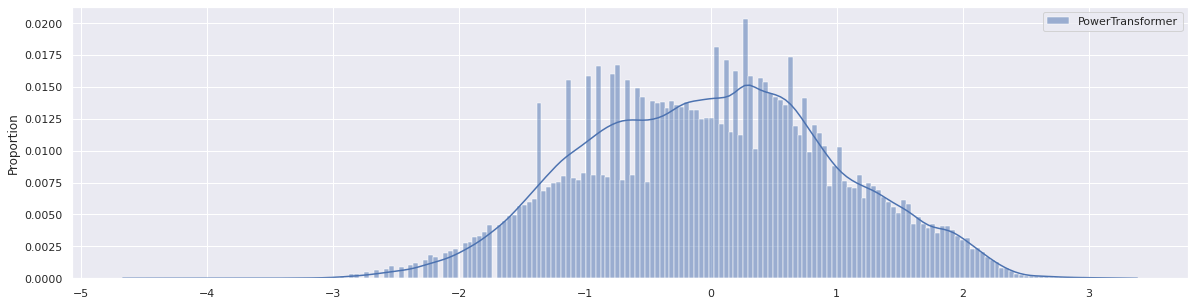

In [ ]:
sns.histplot(pd.DataFrame(PowerTransformer(method = 'box-cox').fit_transform(X_test[["ActualElapsedTime"]])), label="PowerTransformer", kde=True,stat="proportion",color=(list(plt.rcParams['axes.prop_cycle'])*2)[1]["color"])
plt.legend() 
plt.show()

No handles with labels found to put in legend.


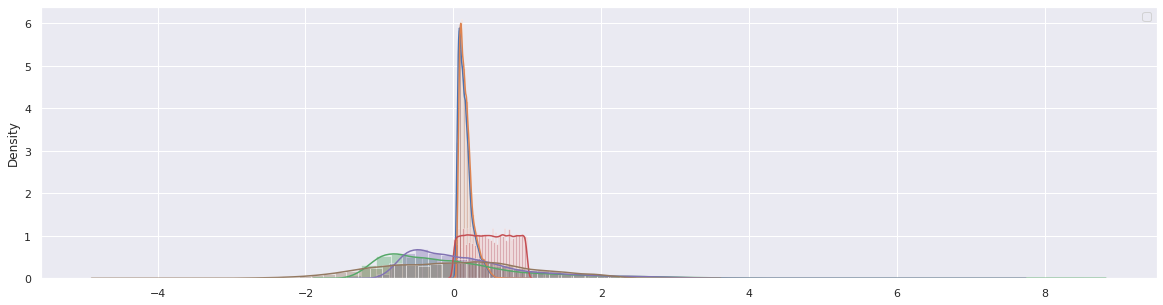

In [ ]:
sns.distplot(pd.DataFrame(MinMaxScaler().fit_transform(X_test[["ActualElapsedTime"]])))
sns.distplot(pd.DataFrame(MaxAbsScaler().fit_transform(X_test[["ActualElapsedTime"]])))
sns.distplot(pd.DataFrame(StandardScaler().fit_transform(X_test[["ActualElapsedTime"]])))
sns.distplot(pd.DataFrame(QuantileTransformer(random_state=0,  output_distribution='uniform').fit_transform(X_test[["ActualElapsedTime"]])))
sns.distplot(pd.DataFrame(RobustScaler().fit_transform(X_test[["ActualElapsedTime"]])))
sns.distplot(pd.DataFrame(PowerTransformer(method = 'box-cox').fit_transform(X_test[["ActualElapsedTime"]])))
plt.legend() 
plt.show()

No handles with labels found to put in legend.


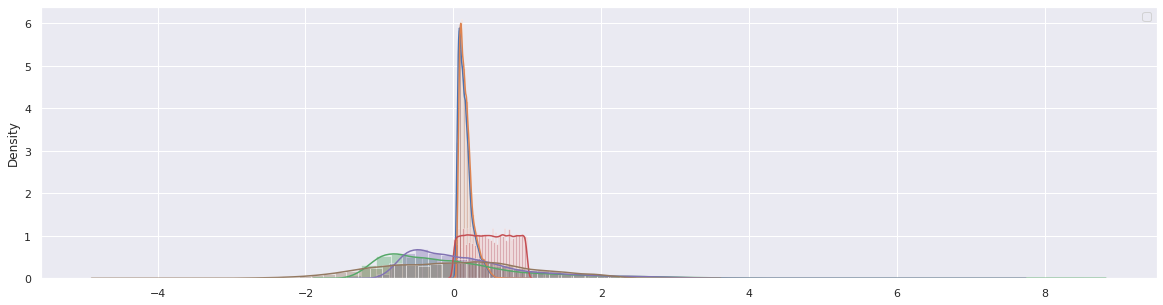

In [ ]:
sns.distplot(pd.DataFrame(MinMaxScaler().fit_transform(X_test[["ActualElapsedTime"]])), norm_hist=True)
sns.distplot(pd.DataFrame(MaxAbsScaler().fit_transform(X_test[["ActualElapsedTime"]])), norm_hist=True)
sns.distplot(pd.DataFrame(StandardScaler().fit_transform(X_test[["ActualElapsedTime"]])), norm_hist=True)
sns.distplot(pd.DataFrame(QuantileTransformer(random_state=0,  output_distribution='uniform').fit_transform(X_test[["ActualElapsedTime"]])), norm_hist=True)
sns.distplot(pd.DataFrame(RobustScaler().fit_transform(X_test[["ActualElapsedTime"]])), norm_hist=True)
sns.distplot(pd.DataFrame(PowerTransformer(method = 'box-cox').fit_transform(X_test[["ActualElapsedTime"]])), norm_hist=True)
plt.legend() 
plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer
sns.distplot(pd.DataFrame(QuantileTransformer(random_state=0,  output_distribution='uniform').fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
from sklearn.preprocessing import RobustScaler
sns.distplot(pd.DataFrame(RobustScaler().fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
ig, axes = plt.subplots(nrows=len(minutes_cols), ncols=7, figsize=(len(trnsfrmr)*5, len(num_cols)*5))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):
    desc_table = round(data.describe(include=['number']),1).T
    title = "df " if data is df else "X_train " if data is X_train else "X_test "   
    for i, colum in enumerate(tqdm_notebook(num_cols)):

        sns.histplot(data=data,
                    x=colum,
                    stat="proportion",
                    color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                    ax=axes[i][j],
                    bins=len(df[colum].unique()))
        
        desc_table_ = axes[i][j].table(cellText=desc_table.loc[[colum]].values,
                                    colLabels=desc_table.loc[[colum]].columns,
                                    rowLabels=desc_table.loc[[colum]].index,
                                    loc='top', 
                                    colWidths=[0.11, 0.08, 0.07, 0.06, 0.08, 0.08, 0.08, 0.08])
        desc_table_.auto_set_font_size(False)
        desc_table_.set_fontsize(11)
        
        axes[i][j].set_title(title+colum,
                            fontsize = 14,
                            fontweight = "bold",
                            loc='center',
                            pad=-14)
        axes[i][j].tick_params(labelsize = 12)
        axes[i][j].set_xlabel("")

    
fig.tight_layout()
plt.subplots_adjust(top=0.96)
fig.suptitle(t='Numerical attributes\nDistribution and description',
             fontsize = 20, 
             fontweight = "bold")
#plt.savefig(path + "Numerical_attributes_distribution.png")
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
sns.distplot(pd.DataFrame(PowerTransformer(method = 'box-cox').fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
sns.distplot(pd.DataFrame(KBinsDiscretizer(encode = 'ordinal', strategy='quantile').fit_transform(X_test[["ActualElapsedTime"]])))

In [ ]:
X_test[["ActualElapsedTime_RobustScaler_UV"]] = pd.DataFrame(RobustScaler(unit_variance=True).fit_transform(X_test[["ActualElapsedTime"]]))

In [ ]:
X_test[["ActualElapsedTime_RobustScaler"]] = pd.DataFrame(RobustScaler().fit_transform(X_test[["ActualElapsedTime"]]))

In [ ]:
X_test[["ActualElapsedTime","ActualElapsedTime_RobustScaler", "ActualElapsedTime_RobustScaler_UV"]]

In [ ]:
X_test[["ActualElapsedTime"]].max()

In [ ]:
X_test[["ActualElapsedTime_RobustScaler"]].max()

In [ ]:
X_test[["ActualElapsedTime_RobustScaler_UV"]].max()

In [ ]:
X_test["Date"].dt.strftime("%B")

In [ ]:
X_test["Date"].dt.strftime('%A')

In [ ]:
X_test["Date"].dt.weekday

In [ ]:
X_test

In [ ]:
X_test.dtypes

In [ ]:
X_test["DepTime_time"].dt

In [ ]:
type(X_test.loc[0,"DepTime"])

In [ ]:
t+"_time"

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
make_column_transformer(
    (StandardScaler(), ['numerical_column']),
    (OneHotEncoder(), ['categorical_column']))


In [ ]:

ColumnTransformer(transformers=[('standardscaler', StandardScaler(...),
                                 ['numerical_column']),
                                ('onehotencoder', OneHotEncoder(...),
                                 ['categorical_column'])])

In [ ]:
df[df.columns[df.isna().any()]].select_dtypes("Int64")

In [ ]:
datetimes_cols = df.select_dtypes(include=['bool']).columns
df_datetimes_desc = df.describe(include=['bool']).T
X_train_datetimes_desc = X_train.describe(include=['bool']).T
X_test_datetimes_desc = X_test.describe(include=['bool']).T

In [ ]:
from sklearn.impute import SimpleImputer
SimpleImputer().fit
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

In [ ]:
X_test[["Year", "Month", "DayofMonth"]]

In [ ]:
X_test[["TailNum"]]

In [ ]:
for col in tqdm_notebook(df.columns[df.isna().any()].tolist()):
    print("filling NaN in {} from df".format(col))
    df[col].fillna(df[col].mode()[0], inplace = True)
    
    print("filling NaN in {} from X_train".format(col))
    X_train[col].fillna(X_train[col].mode()[0], inplace = True)
    
    print("filling NaN in {} from df".format(col))
    X_test[col].fillna(X_test[col].mode()[0], inplace = True)

In [ ]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(30, len(num_cols)*6))

for i, colum in enumerate(num_cols):
    sns.boxplot(data=df,
                 x=colum,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax=axes[i][0])

    axes[i][0].set_title("df "+colum,
                         fontsize = 14,
                         fontweight = "bold",
                         loc='center',
                         pad=-14)
    axes[i][0].tick_params(labelsize = 12)
    axes[i][0].set_xlabel("")

    sns.boxplot(data=X_train,
                 x=colum,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax=axes[i][1])
    
    axes[i][1].set_title("X_train "+colum,
                         fontsize = 14,
                         fontweight = "bold",
                         loc='center',
                         pad=-14)
    axes[i][1].tick_params(labelsize = 12)
    axes[i][1].set_xlabel("")

    sns.boxplot(data=X_test,
                 x=colum,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax=axes[i][2])

    axes[i][2].set_title("X_test "+colum,
                         fontsize = 14,
                         fontweight = "bold",
                         loc='center',
                         pad=-14)
    axes[i][2].tick_params(labelsize = 12)
    axes[i][2].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.96)
fig.suptitle(t='Numerical attributes\nBoxplot',
             fontsize = 20, 
             fontweight = "bold")
plt.show()

In [ ]:

fig, axes = plt.subplots(nrows=len(datetimes_cols), ncols=3, figsize=(30, len(datetimes_cols)*6))

for i, colum in enumerate(datetimes_cols):
    sns.histplot(data=df,
                 x=colum,
                 stat="proportion",
                 kde=True,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax=axes[i][0])
    table_df = axes[i][0].table(cellText=df_datetimes_desc.loc[[colum]].values,
                                colLabels=df_datetimes_desc.loc[[colum]].columns,
                                rowLabels=df_datetimes_desc.loc[[colum]].index,
                                loc='top',
                                colWidths=[0.11,0.08, 0.1, 0.1])
    table_df.auto_set_font_size(False)
    table_df.set_fontsize(11)
    axes[i][0].set_title("df "+colum,
                         fontsize = 14,
                         fontweight = "bold",
                         loc='center',
                         pad=-14)
    axes[i][0].tick_params(labelsize = 12)
    axes[i][0].set_xlabel("")

    sns.histplot(data=X_train,
                 x=colum,
                 stat="proportion",
                 kde=True,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax=axes[i][1])
    table_X_train = axes[i][1].table(cellText=X_train_datetimes_desc.loc[[colum]].values,
                                     colLabels=X_train_datetimes_desc.loc[[colum]].columns,
                                     rowLabels=X_train_datetimes_desc.loc[[colum]].index,
                                     loc='top',
                                     colWidths=[0.11,0.08, 0.1, 0.1])
    table_X_train.auto_set_font_size(False)
    table_X_train.set_fontsize(11)
    axes[i][1].set_title("X_train "+colum,
                         fontsize = 14,
                         fontweight = "bold",
                         loc='center',
                         pad=-14)
    axes[i][1].tick_params(labelsize = 12)
    axes[i][1].set_xlabel("")

    sns.histplot(data=X_test,
                 x=colum,
                 stat="proportion",
                 kde=True,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax=axes[i][2])
    table_X_test = axes[i][2].table(cellText=X_test_datetimes_desc.loc[[colum]].values,
                                    colLabels=X_test_datetimes_desc.loc[[colum]].columns,
                                    rowLabels=X_test_datetimes_desc.loc[[colum]].index,
                                    loc='top',
                                    colWidths=[0.11, 0.08, 0.1, 0.1])
    table_X_test.auto_set_font_size(False)
    table_X_test.set_fontsize(11)
    axes[i][2].set_title("X_test "+colum,
                         fontsize = 14,
                         fontweight = "bold",
                         loc='center',
                         pad=-14)
    axes[i][2].tick_params(labelsize = 12)
    axes[i][2].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle(t='B attributes\nProportion and description',
             fontsize = 20, 
             fontweight = "bold")
plt.savefig(path + "Datetime_attributes_distribution.png")
plt.show()

In [ ]:
X_test_transf[num_cols] = X_test.copy()

In [ ]:
X_test_transf[["ActualElapsedTime"]] = pd.DataFrame(RobustScaler().fit_transform(X_test[["ActualElapsedTime"]]))

In [ ]:
pd.DataFrame(RobustScaler().fit_transform(df[num_cols]))

In [ ]:
RobustScaler().fit_transform(X_test.ActualElapsedTime.values)

In [ ]:
X_test.ActualElapsedTime.values.reshape(-1, 1)

In [ ]:
X_test_transf["ActualElapsedTime"]

In [ ]:
X_test_transf[num_cols]

In [ ]:
X_test_transf[num_cols]

In [ ]:
df[num_cols]

In [ ]:
nan_mask = np.isnan(df["ActualElapsedTime"])
valid_mask = ~nan_mask

In [ ]:
RobustScaler().fit_transform(df["ActualElapsedTime"][valid_mask])

In [ ]:
df["ActualElapsedTime"][valid_mask].shape

(1928371,)

In [ ]:
df[["ActualElapsedTime"]][valid_mask] = pd.DataFrame(RobustScaler().fit_transform(df[["ActualElapsedTime"]][valid_mask]).reshape(df["ActualElapsedTime"][valid_mask].shape))

In [ ]:
df["ActualElapsedTime"][valid_mask]

In [ ]:
df[["ActualElapsedTime"]][valid_mask] = RobustScaler().fit_transform(df[["ActualElapsedTime"]][valid_mask])

In [ ]:
RobustScaler().fit_transform(df[["ActualElapsedTime"]][valid_mask]).reshape(-1,1)

In [ ]:
df["ActualElapsedTime"][valid_mask]

In [ ]:
df[["ActualElapsedTime"]][valid_mask] = RobustScaler().fit_transform(df[["ActualElapsedTime"]][valid_mask]).tolist()

In [ ]:
RobustScaler().fit_transform(df[["ActualElapsedTime"]][valid_mask]).tolist().tolist()

In [ ]:
pd.DataFrame(RobustScaler().fit_transform(df["ActualElapsedTime"]))

In [ ]:
df["ActualElapsedTime"]

# [IT Academy - Data Science with Python](https://www.barcelonactiva.cat/es/itacademy)
## S11 T01: SkLearn Train Test  
### [Github SkLearn Train Test](https://github.com/jesussantana/SkLearn-Train-Test)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
 
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
   
[![wakatime](https://wakatime.com/badge/github/jesussantana/SkLearn-Train-Test.svg)](https://wakatime.com/badge/github/jesussantana/SkLearn-Train-Test)  

[![Linkedin: JesusSantana](https://img.shields.io/badge/-JesusSantana-blue?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/chus-santana/)](https://www.linkedin.com/in/chus-santana/)  

[![GitHub JesusSantana](https://img.shields.io/github/followers/jesussantana?label=follow&style=social)](https://github.com/jesussantana)

In [ ]:
%pip install scikit-optimize

In [ ]:
%pip install fitter

In [ ]:
# Data treatment
# ==============================================================================
import numpy as np
import pandas as pd
import datetime
import time
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.ensemble import RandomForestClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Various
# ==============================================================================
import multiprocessing
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Scripts folder configuration
# ==============================================================================
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

### Exercise 1: 
  - Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level.

### Exercise 2: 
  - Apply some transformation process (standardize numerical data, create dummy columns, polynomials.

### Exercise 3: 
  - Summarize the new columns generated statistically and graphically


Exercise 1, 2 & 3 developed below

## Exploratory analysis

In [ ]:
# Testing Exploration Script
# ===============================================================================

def summary(df):
    '''
    Exploration Dataframe
    '''
    print(df.head()),
    print(df.info()),
    print(df.shape),
    print(df.describe().round(5))

summary(df_raw)

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0     

In [ ]:
df_raw.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  
0       NaN            NaN                NaN  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       0.0            0.0               32.0  
4       NaN            NaN                NaN

In [ ]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [ ]:
df.shape

(1936758, 29)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.isna().sum().sort_values()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
Distance                  0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
Dest                      0
Diverted                  0
Origin                    0
CancellationCode          0
Cancelled                 0
DepDelay                  0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
ArrDelay               8387
AirTime                8387
ActualElapsedTime      8387
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

- Data sampling to reduce loading time

In [ ]:
#df = df.sample(frac=0.001, random_state = 6858)

In [ ]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   object 
 9   FlightNum          1937 non-null   int64  
 10  TailNum            1937 non-null   object 
 11  ActualElapsedTime  1931 non-null   float64
 12  CRSElapsedTime     1937 non-null   float64
 13  AirTime            1931 non-null   float64
 14  ArrDelay           1931 non-null   float64
 15  DepDelay           1937 non-null   float64
 16  Origin            

In [ ]:
df.shape

(1937, 29)

### Drop features that we do not adds value

In [ ]:
# Drop features
df.drop(axis=1,columns=['Year', 'Cancelled', 'CancellationCode', 'TailNum','FlightNum', 'Diverted'], inplace=True)

## Numerical variables

In [ ]:
df.select_dtypes(include=['float64', 'int']).describe().round(3)

Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  \
count  1937.000    1937.000   1937.000  1937.000    1937.000  1931.000   
mean      6.188      15.640      3.979  1525.730    1472.327  1619.845   
std       3.527       8.625      1.955   446.757     421.887   549.547   
min       1.000       1.000      1.000     6.000      10.000     2.000   
25%       3.000       8.000      2.000  1216.000    1145.000  1334.000   
50%       6.000      16.000      4.000  1550.000    1511.000  1730.000   
75%       9.000      23.000      5.000  1854.000    1820.000  2029.500   
max      12.000      31.000      7.000  2356.000    2359.000  2359.000   

       CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  \
count    1937.000           1931.000        1937.000  1931.000  1931.000   
mean     1642.602            130.875         132.051   106.202    42.474   
std       463.585             70.310          69.969    67.079    56.640   
min         1.000             32.000          30.000    14.000   -25.000   
25%      1345.000             78.000          80.000    56.000     9.000   
50%      1715.000            113.000         115.000    88.000    24.000   
75%      2010.000            161.000         161.000   134.000    55.000   
max      2359.000            441.000         419.000   370.000   569.000   

       DepDelay  Distance    TaxiIn   TaxiOut  CarrierDelay  WeatherDelay  \
count  1937.000  1937.000  1931.000  1936.000      1269.000      1269.000   
mean     43.697   749.702     6.686    18.019        18.381         4.009   
std      53.677   569.053     4.470    13.466        42.627        20.647   
min       6.000    45.000     1.000     1.000         0.000         0.000   
25%      12.000   334.000     4.000    10.000         0.000         0.000   
50%      24.000   594.000     6.000    14.000         1.000         0.000   
75%      53.000   984.000     8.000    21.000        19.000         0.000   
max     571.000  3329.000    44.000   137.000       569.000       285.000   

       NASDelay  SecurityDelay  LateAircraftDelay  
count  1269.000       1269.000           1269.000  
mean     15.340          0.043             24.800  
std      36.476          0.923             42.243  
min       0.000          0.000              0.000  
25%       0.000          0.000              0.000  
50%       2.000          0.000              6.000  
75%      14.000          0.000             33.000  
max     421.000         25.000            387.000

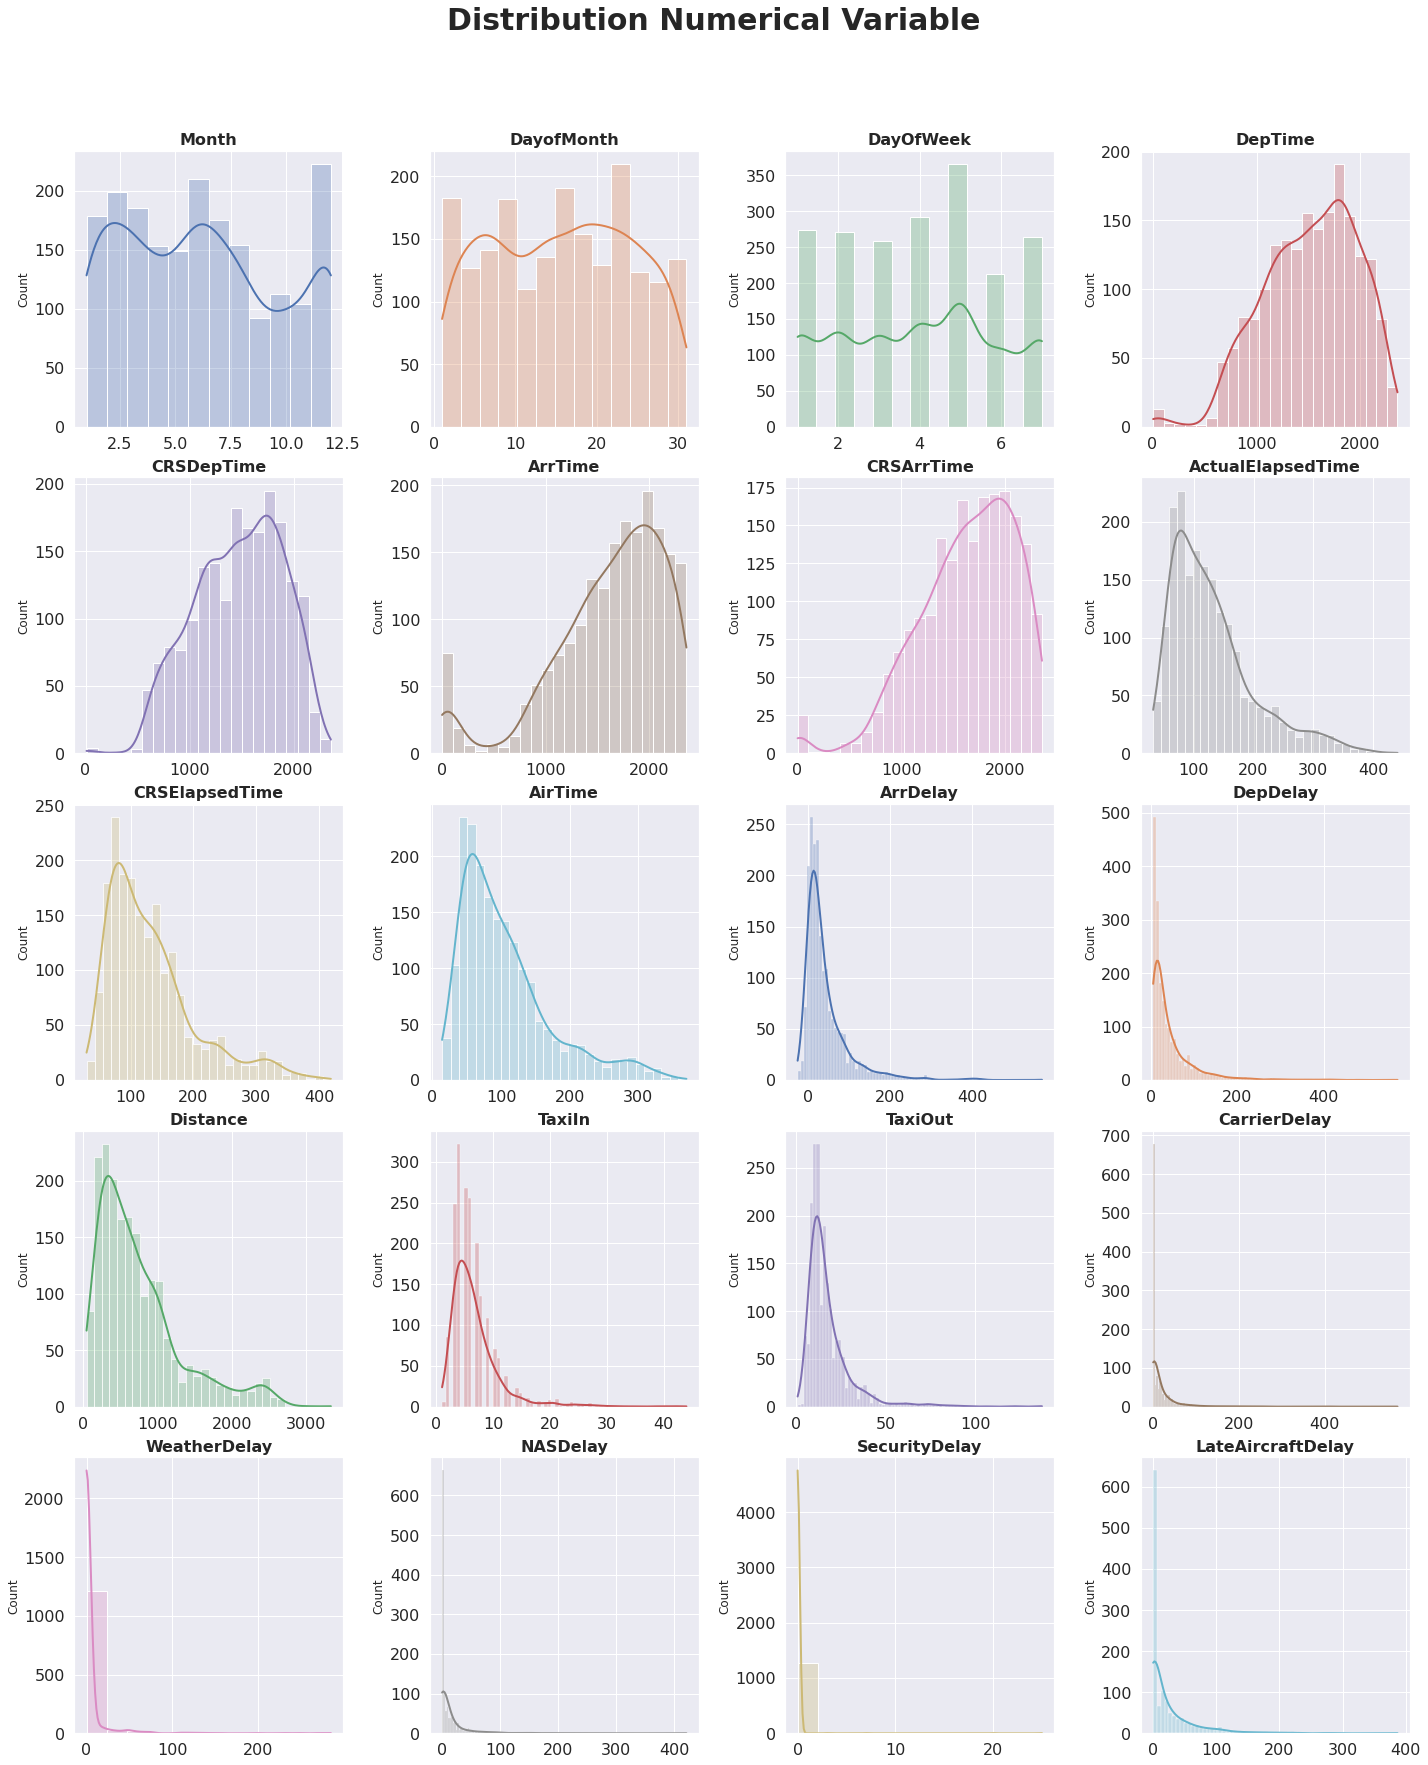

In [ ]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png")

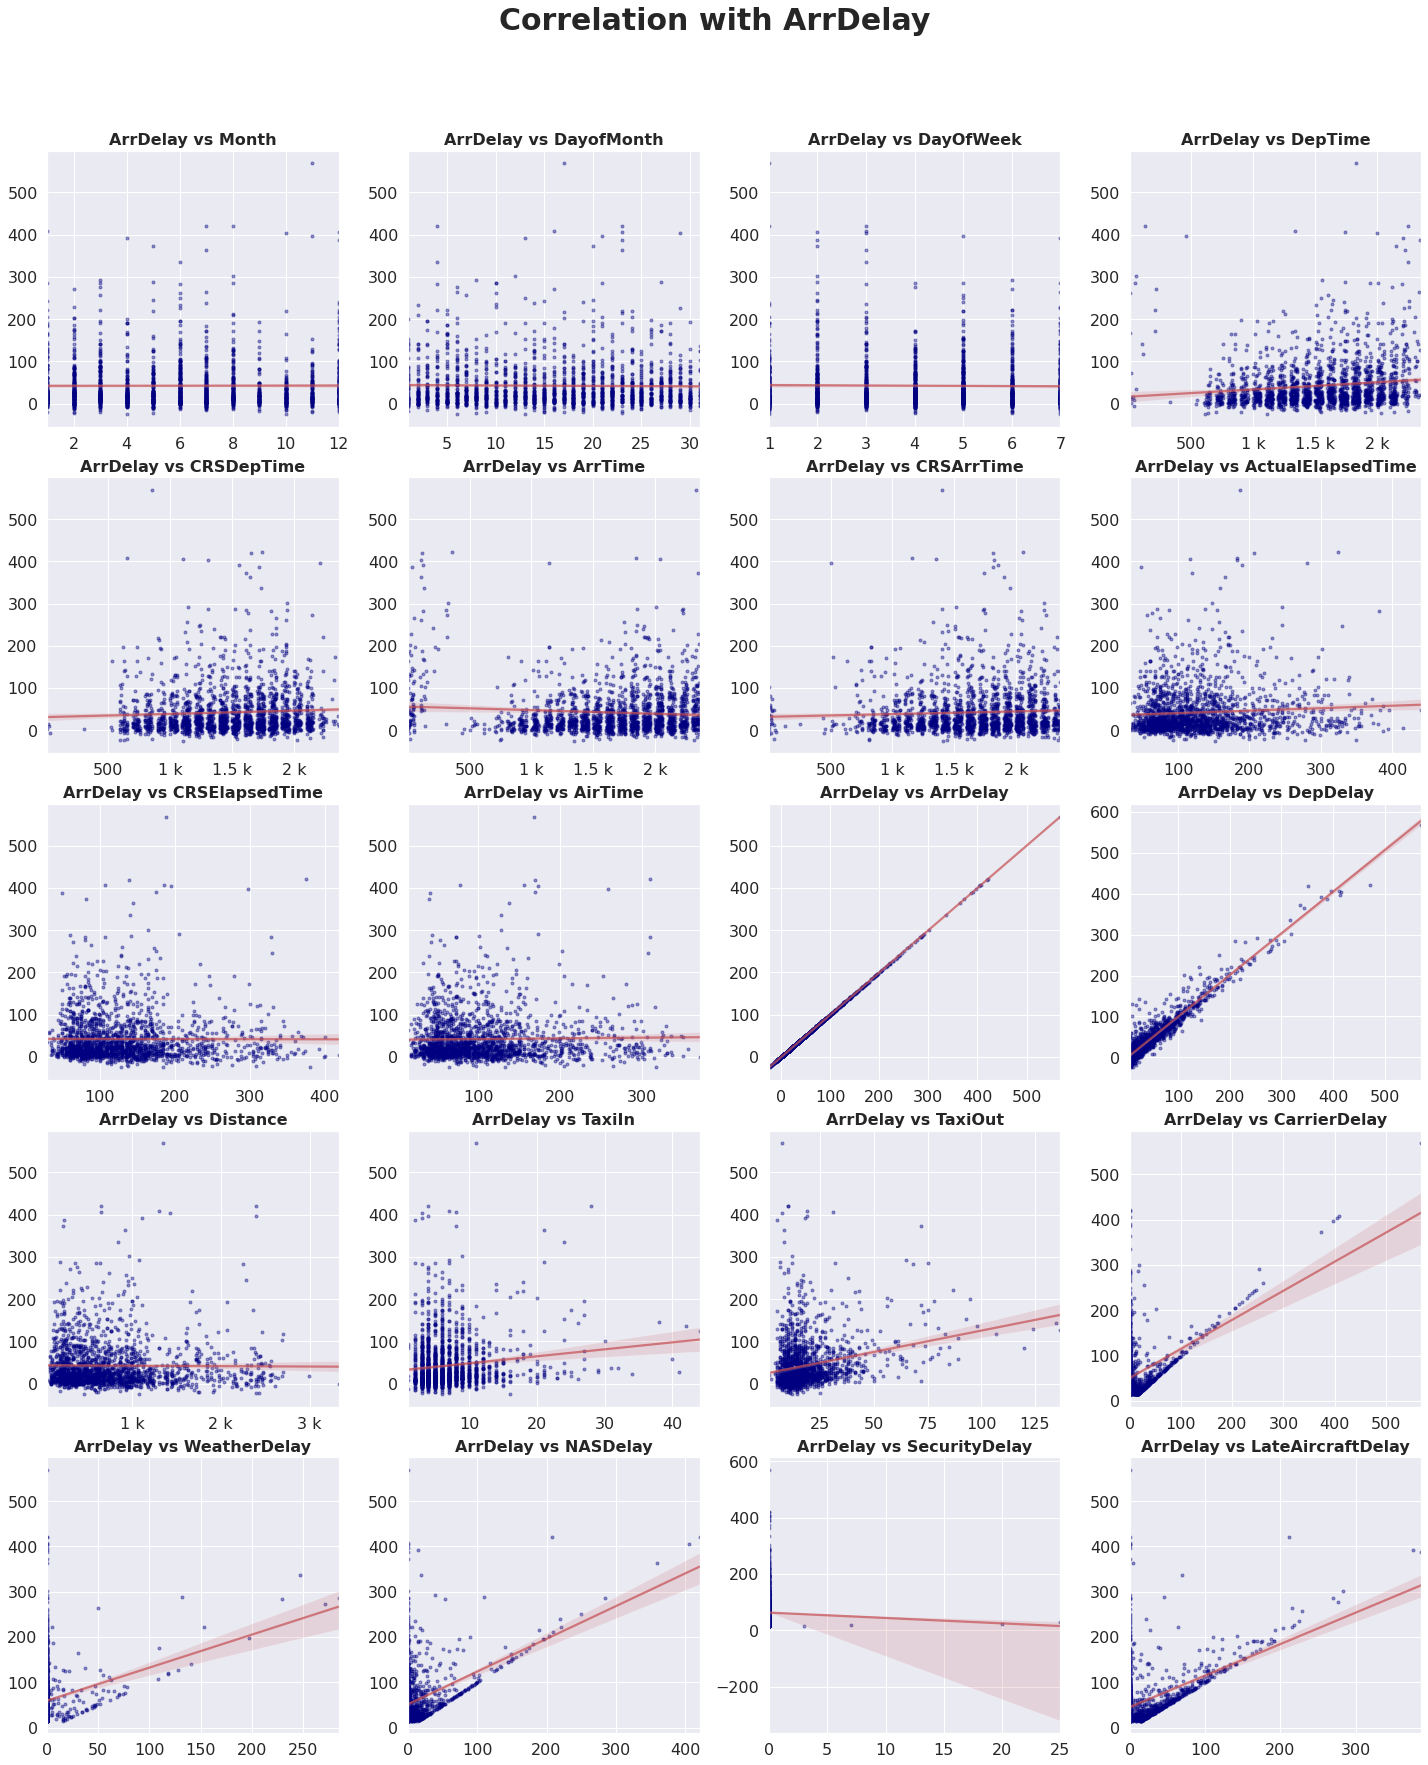

In [ ]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=4, nrows=5,  figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "navy",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 16, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Empty axes are removed
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png")

### We can observe a strong correlation with DepDelay

## Numerical variables correlation

In [ ]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

variable_1         variable_2         r     abs_r
169     CRSElapsedTime            AirTime  0.986852  0.986852
188            AirTime     CRSElapsedTime  0.986852  0.986852
249           Distance            AirTime  0.981996  0.981996
192            AirTime           Distance  0.981996  0.981996
172     CRSElapsedTime           Distance  0.981914  0.981914
248           Distance     CRSElapsedTime  0.981914  0.981914
187            AirTime  ActualElapsedTime  0.978930  0.978930
149  ActualElapsedTime            AirTime  0.978930  0.978930
148  ActualElapsedTime     CRSElapsedTime  0.974316  0.974316
167     CRSElapsedTime  ActualElapsedTime  0.974316  0.974316
230           DepDelay           ArrDelay  0.959996  0.959996
211           ArrDelay           DepDelay  0.959996  0.959996
247           Distance  ActualElapsedTime  0.957600  0.957600
152  ActualElapsedTime           Distance  0.957600  0.957600
64             DepTime         CRSDepTime  0.889127  0.889127
83          CRSDepTime            DepTime  0.889127  0.889127
86          CRSDepTime         CRSArrTime  0.699675  0.699675
124         CRSArrTime         CRSDepTime  0.699675  0.699675
123         CRSArrTime            DepTime  0.696387  0.696387
66             DepTime         CRSArrTime  0.696387  0.696387

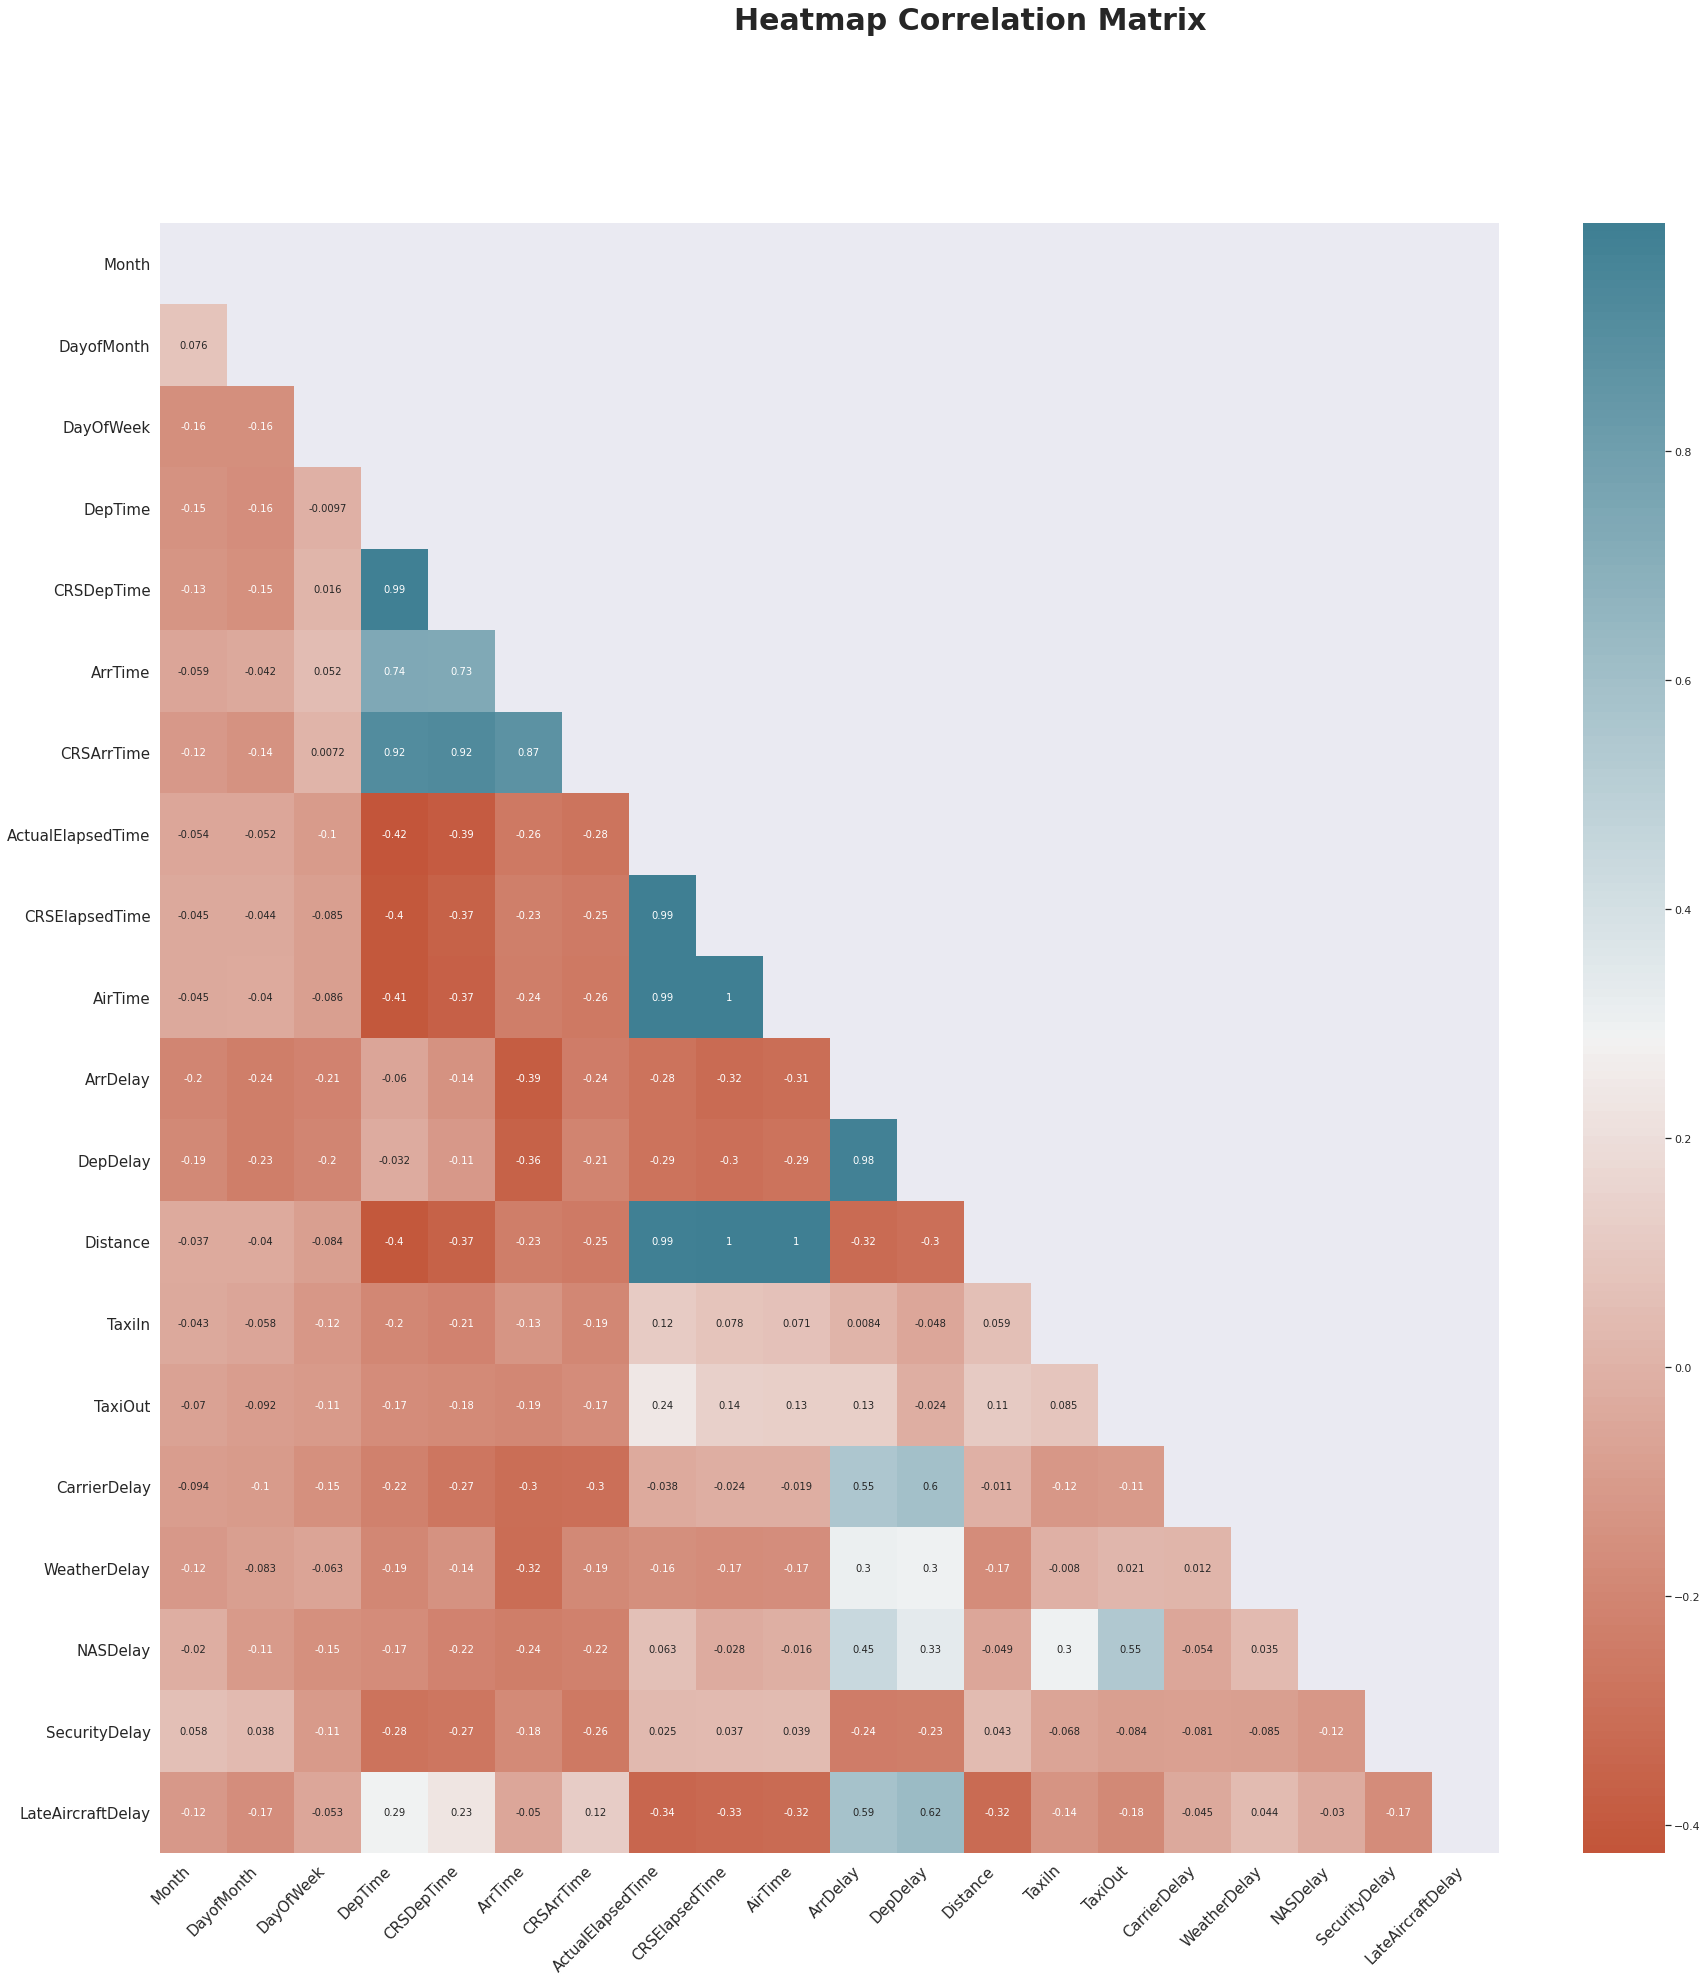

In [ ]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))

corr= df.select_dtypes(include=['float64', 'int']).corr(method='pearson').corr()

# Getting the Upper Triangle of the co-relation matrix

matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, 
            annot=True, 
            mask=matrix, 
            cmap=sns.diverging_palette(20, 220, n=200),
            annot_kws = {"size": 10})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)

fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png")

## Qualitative variables

In [ ]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']).describe()

UniqueCarrier Origin  Dest
count           1937   1937  1937
unique            20    180   186
top               WN    ATL   ATL
freq             388    130   102

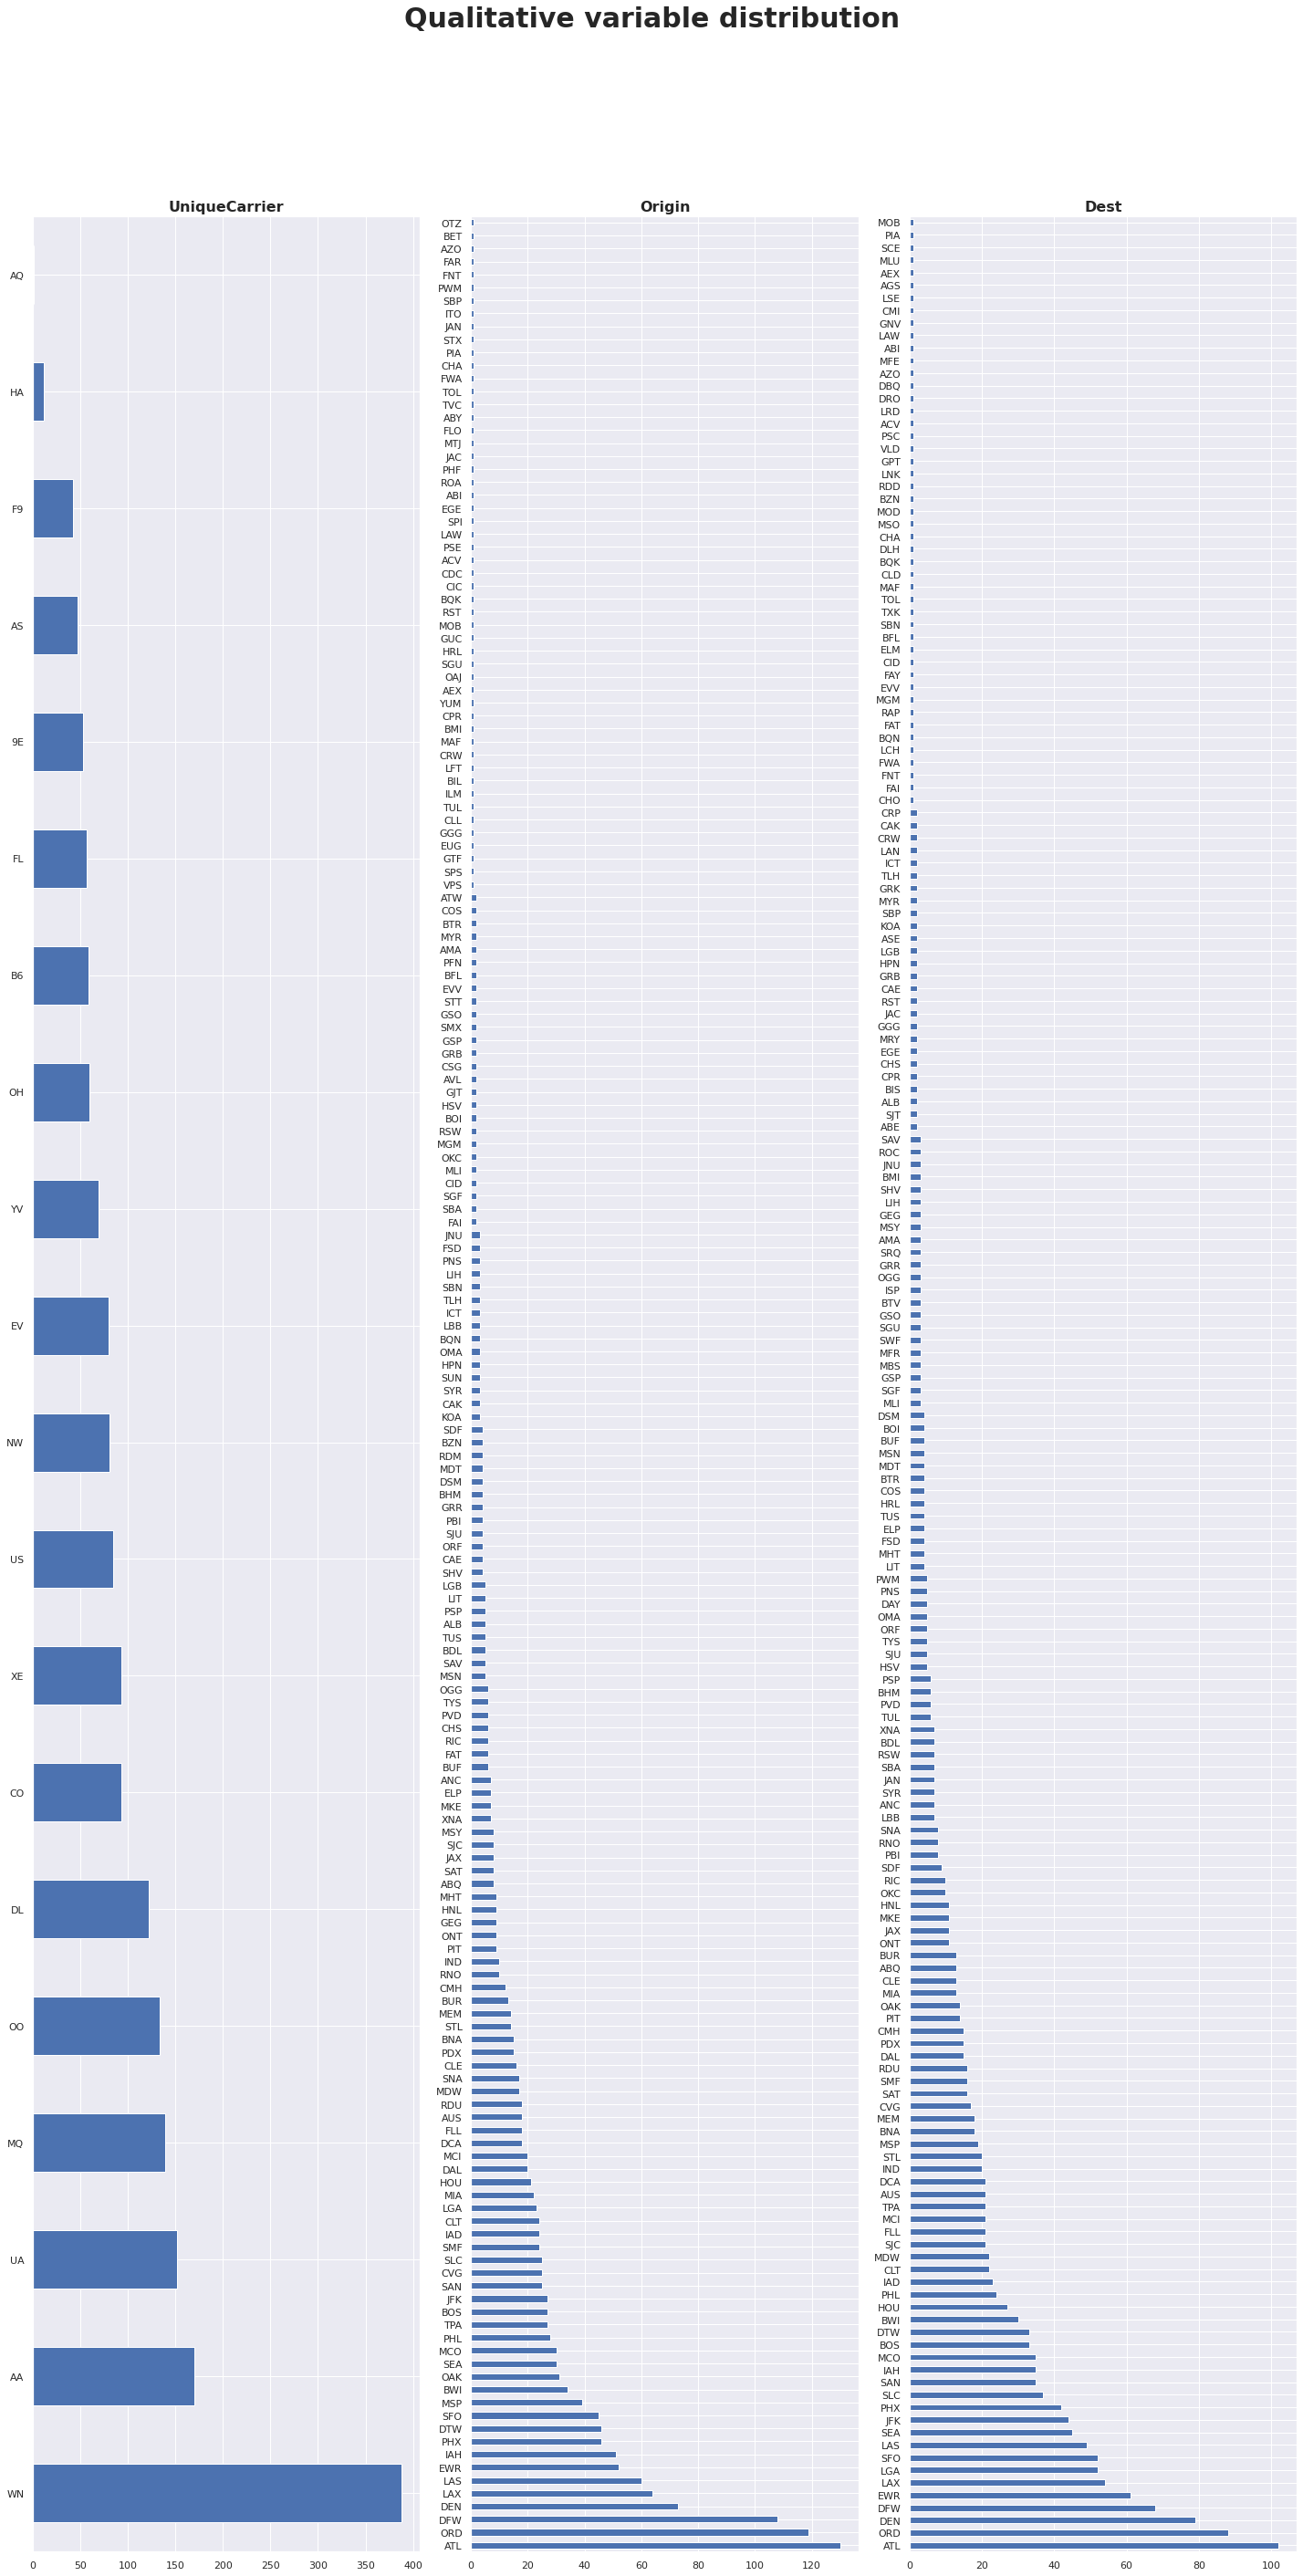

In [ ]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png")

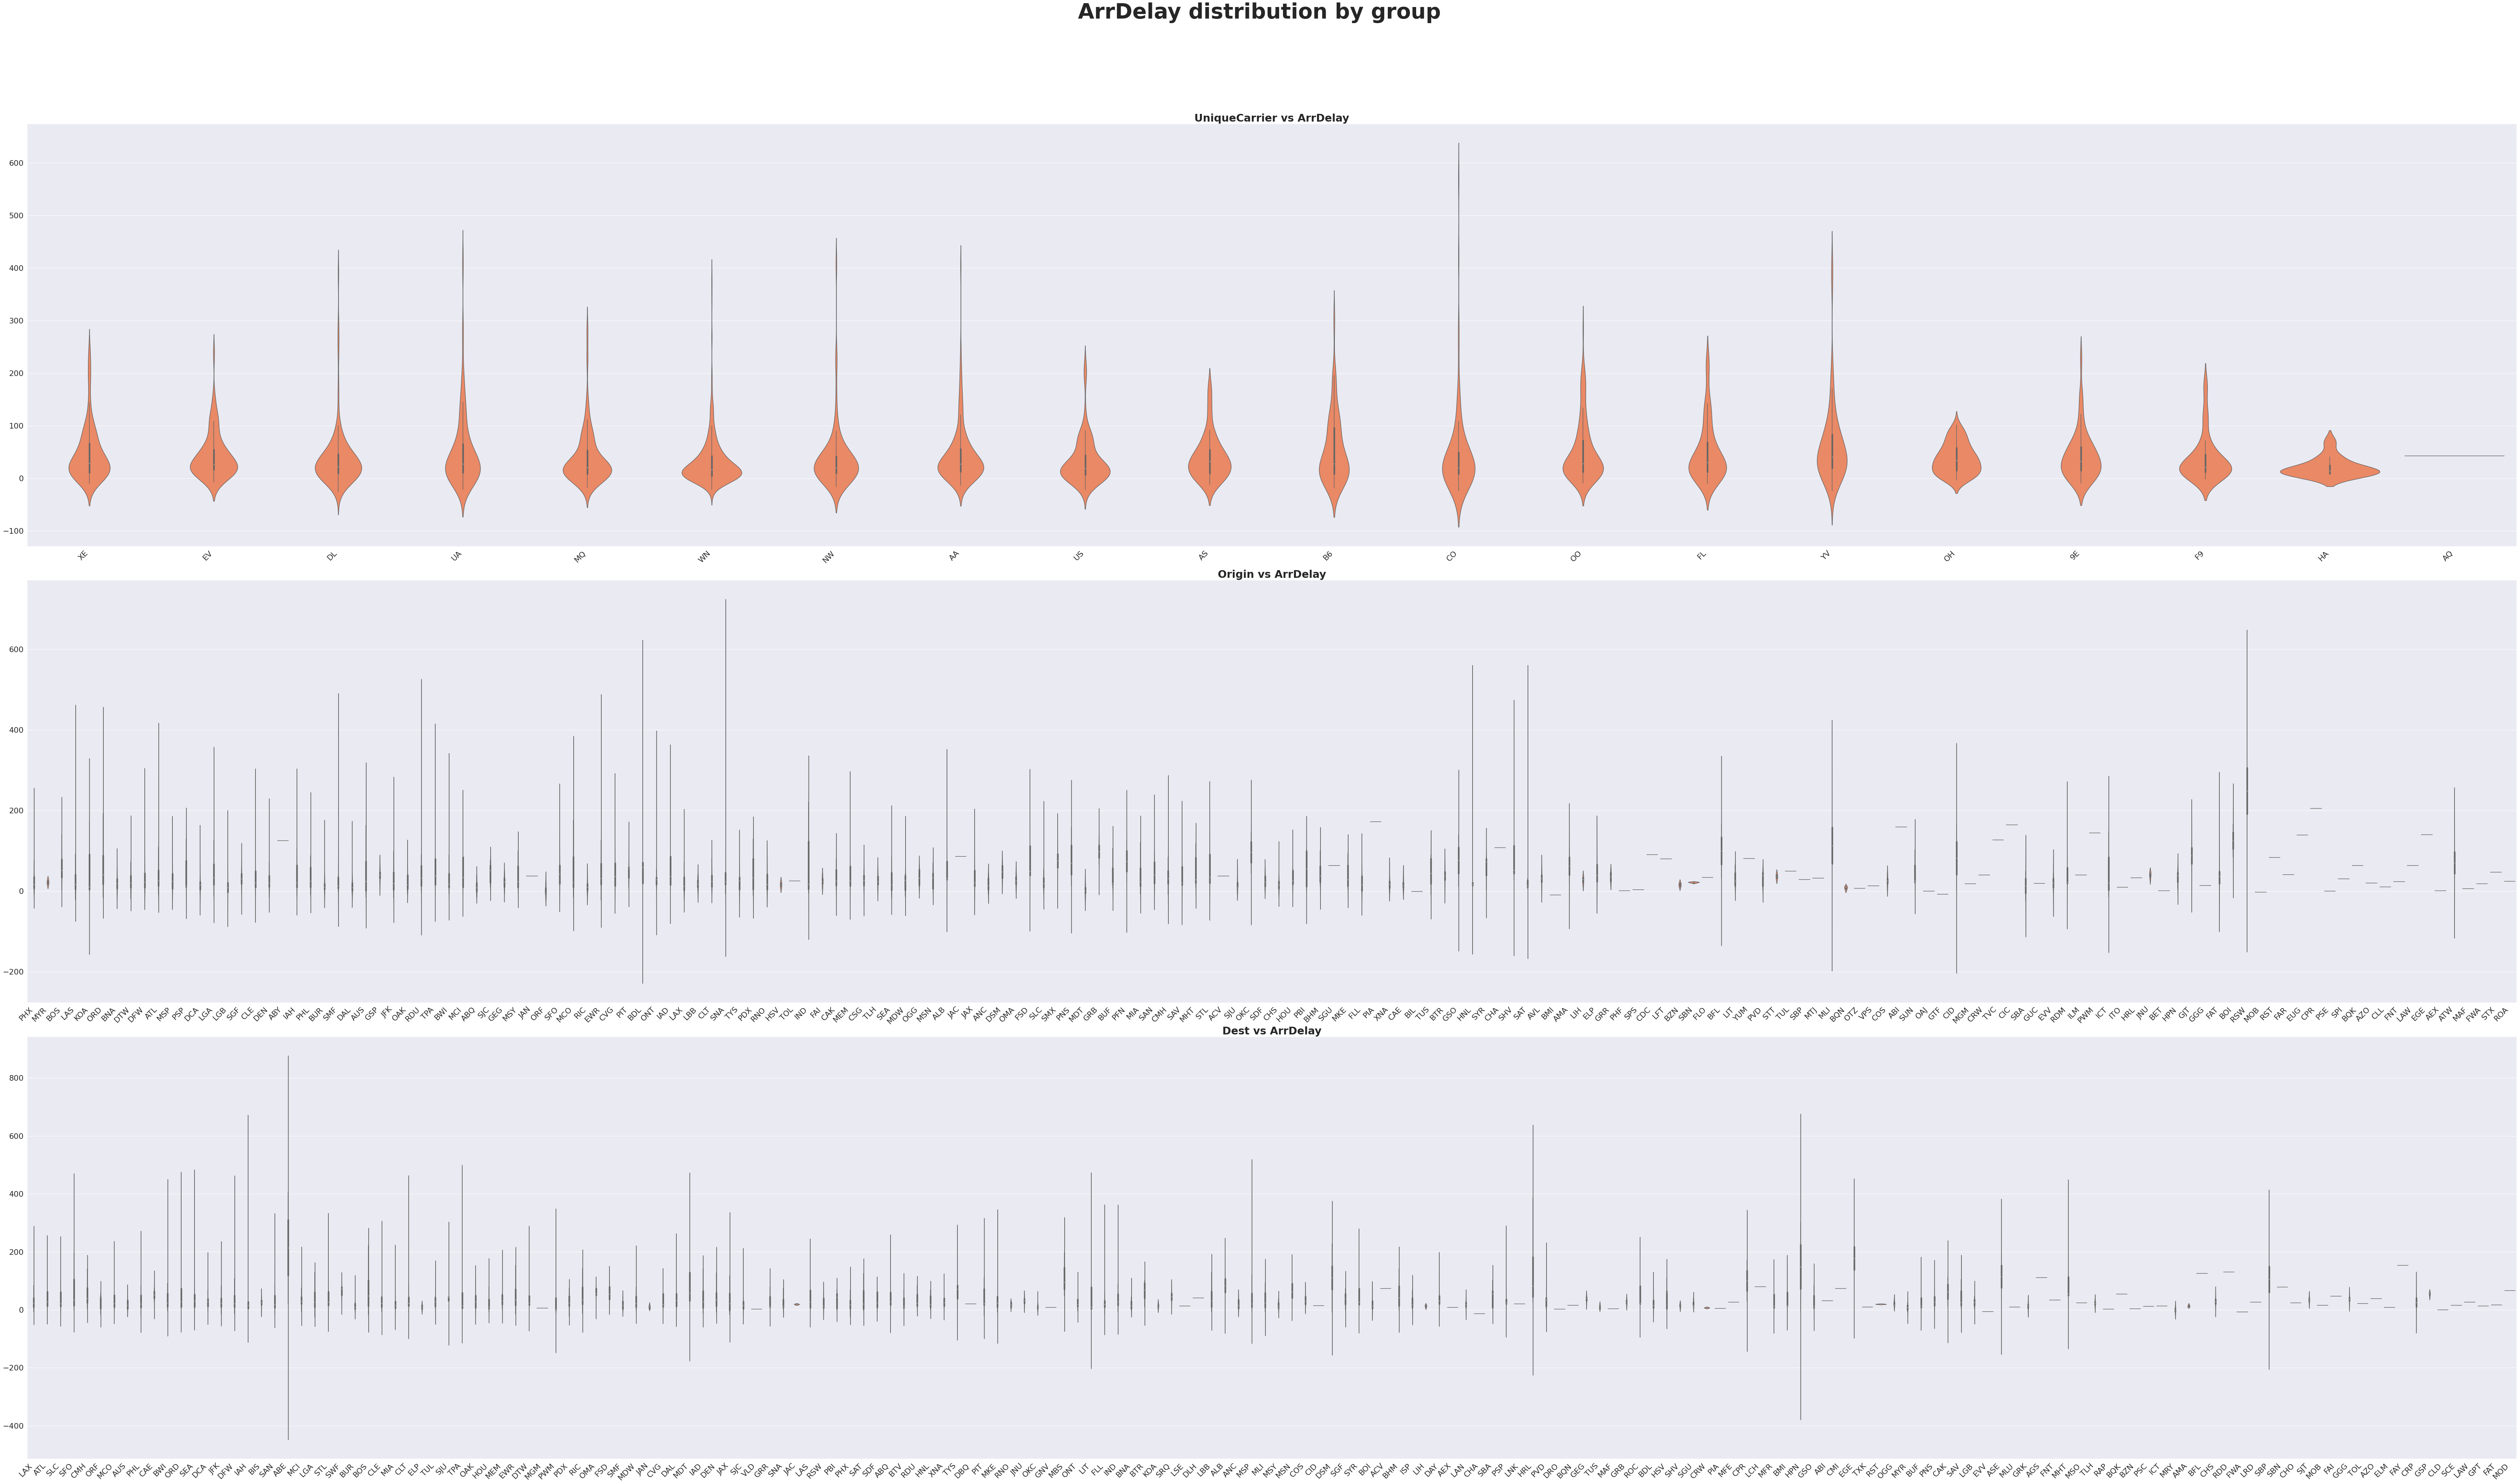

In [ ]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(100, 60))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrDelay',
        data  = df,
        color = "coral",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs ArrDelay", fontsize = 30, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 22)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45, horizontalalignment = 'right')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
  
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 60, fontweight = "bold")
plt.savefig("../reports/figures/ArrDelay_vs_Qualitative_Variable.png")

### Graph Pie chart's for each qualitative variables

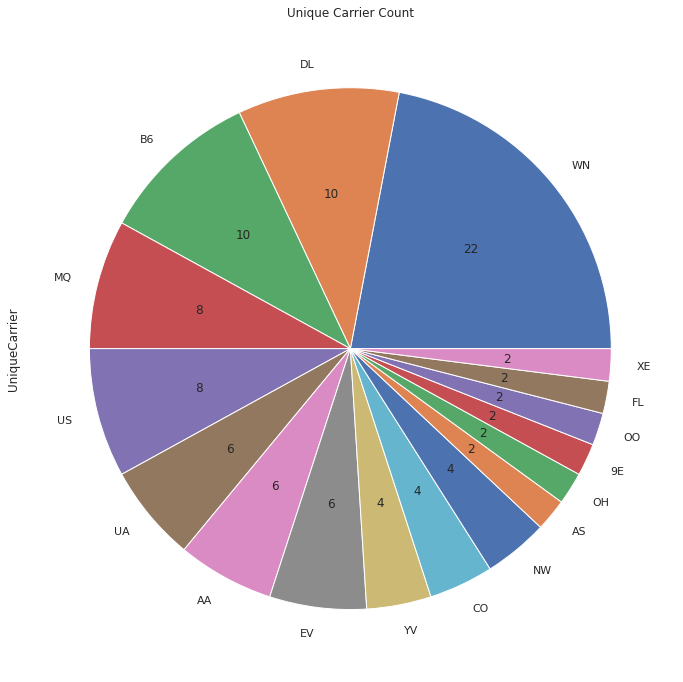

In [ ]:
# Pie chart de UniqueCarrier
plot = df['UniqueCarrier'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Unique Carrier Count')

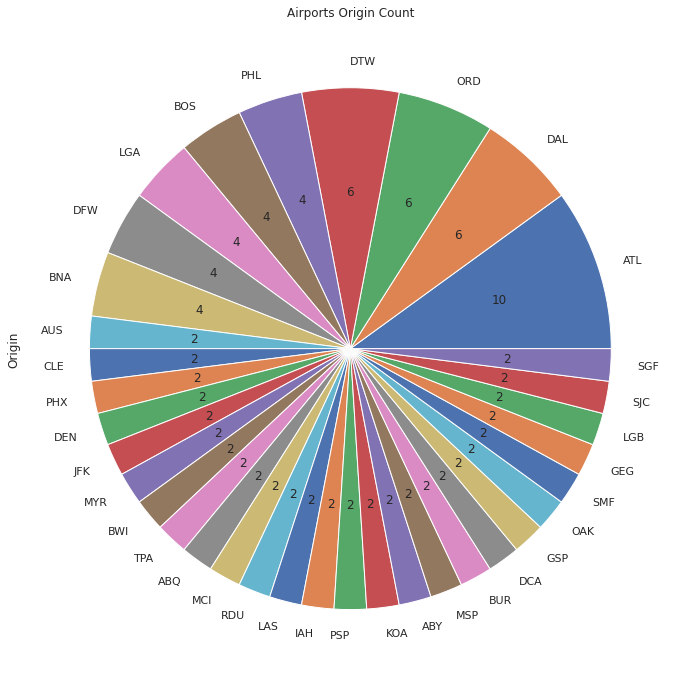

In [ ]:
# Pie chart de Origin
plot = df['Origin'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Origin Count')

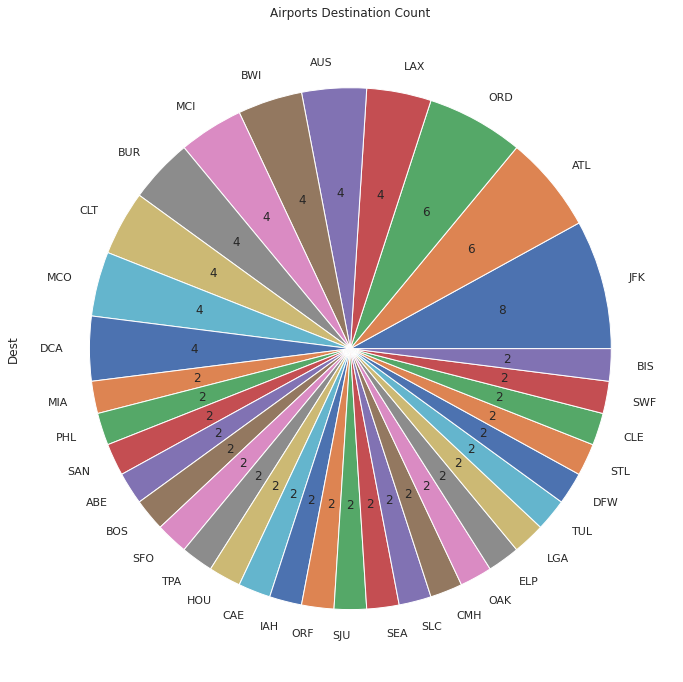

In [ ]:
# Pie chart de Dest
plot = df['Dest'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Destination Count')

## Create Categorical Dummies

In [ ]:
# Script created for transform categorical to dummies
# ===============================================================================

import categorical

In [ ]:
df  = categorical.transform_dummies(df, "UniqueCarrier")

## Create Ordinal Variables

In [ ]:
# Ordinal encoding 
encoder = OrdinalEncoder()

df[['Origin','Dest']]= encoder.fit_transform(df[['Origin','Dest']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1937 non-null   int64  
 1   DayofMonth         1937 non-null   int64  
 2   DayOfWeek          1937 non-null   int64  
 3   DepTime            1937 non-null   float64
 4   CRSDepTime         1937 non-null   int64  
 5   ArrTime            1931 non-null   float64
 6   CRSArrTime         1937 non-null   int64  
 7   ActualElapsedTime  1931 non-null   float64
 8   CRSElapsedTime     1937 non-null   float64
 9   AirTime            1931 non-null   float64
 10  ArrDelay           1931 non-null   float64
 11  DepDelay           1937 non-null   float64
 12  Origin             1937 non-null   float64
 13  Dest               1937 non-null   float64
 14  Distance           1937 non-null   int64  
 15  TaxiIn             1931 non-null   float64
 16  TaxiOut           

## Imputation of missing values

In [ ]:
df.isnull().sum().sum()

3371

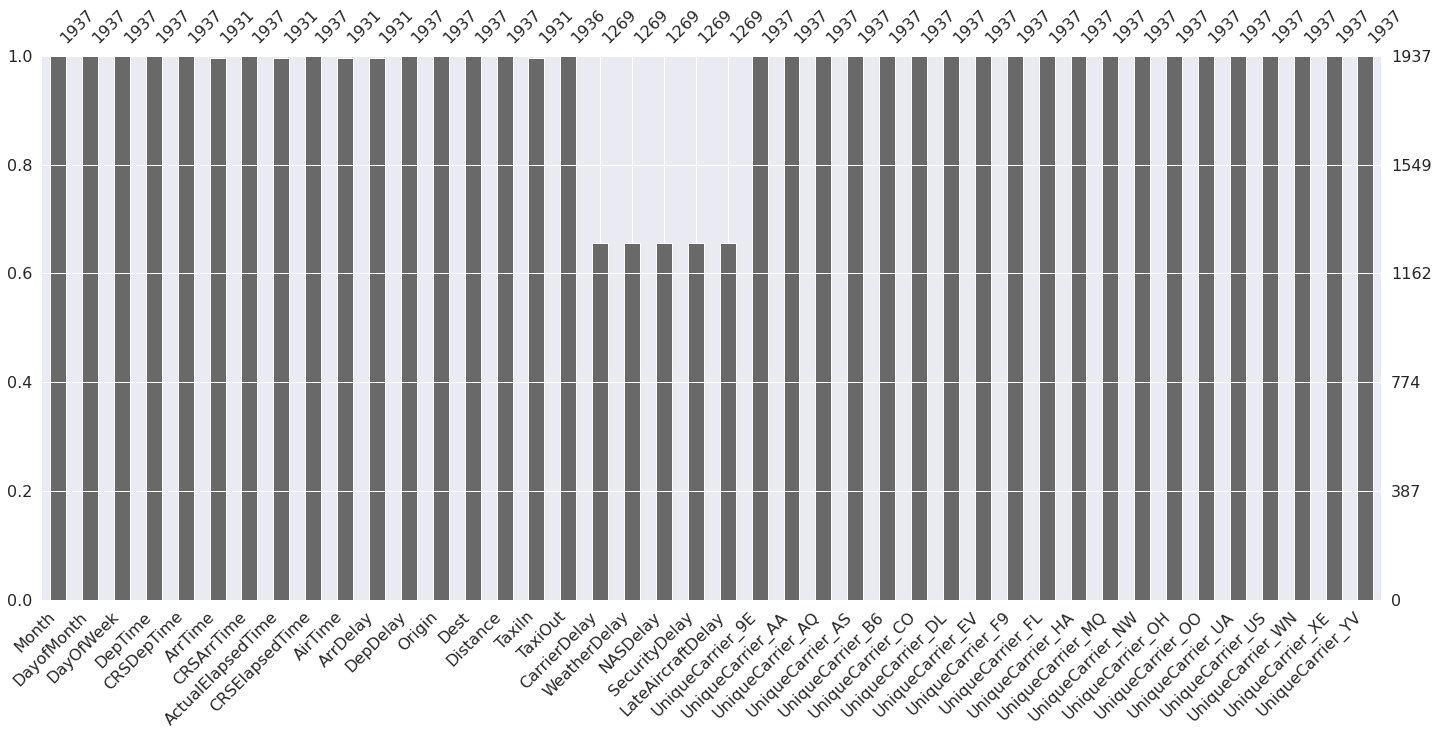

In [ ]:
# Missing Values
msno.bar(df);

In [ ]:
# Script created for transform missing data
# ===============================================================================

import missing

In [ ]:
df[:] = missing.transform(df[:])

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df

Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
32721      1.0         1.0        2.0   1402.0      1230.0   1417.0   
480545     3.0        20.0        4.0   1723.0      1715.0   1932.0   
879313     5.0         5.0        1.0    703.0       650.0   1031.0   
1670776   11.0         8.0        6.0   1628.0      1559.0   1731.0   
1464310    9.0        26.0        5.0   1526.0      1230.0   2322.0   
...        ...         ...        ...      ...         ...      ...   
1549545   10.0         4.0        6.0   1758.0      1750.0   1914.0   
290918     2.0         1.0        5.0   2240.0      2045.0   2250.0   
15679      1.0        18.0        5.0   1819.0      1810.0   1934.0   
9107       1.0         9.0        3.0   1820.0      1650.0   1817.0   
693767     4.0        12.0        6.0   1023.0       930.0   1130.0   

         CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  \
32721        1256.0               75.0            86.0     56.0      81.0   
480545       1906.0              129.0           111.0    100.0      26.0   
879313       1011.0              328.0           321.0    302.0      20.0   
1670776      1715.0               63.0            76.0     42.0      16.0   
1464310      2029.0              296.0           299.0    280.0     173.0   
...             ...                ...             ...      ...       ...   
1549545      1914.0               76.0            84.0     58.0       0.0   
290918       2101.0               70.0            76.0     53.0     109.0   
15679        1910.0               75.0            60.0     57.0      24.0   
9107         1655.0               57.0            65.0     45.0      82.0   
693767       1025.0               67.0            55.0     42.0      65.0   

         DepDelay  Origin   Dest  Distance  TaxiIn  TaxiOut  CarrierDelay  \
32721        92.0   130.0   95.0     370.0     6.0     13.0      0.000000   
480545        8.0   115.0   10.0     317.0    12.0     17.0      8.000000   
879313       13.0    21.0  170.0    2105.0     8.0     18.0      0.000000   
1670776      29.0    90.0   95.0     236.0     7.0     14.0      0.000000   
1464310     176.0    89.0  163.0    2367.0     6.0     10.0      0.000000   
...           ...     ...    ...       ...     ...      ...           ...   
1549545       8.0    79.0  130.0     395.0     3.0     15.0     18.381403   
290918      115.0    44.0   80.0     325.0     4.0     13.0    109.000000   
15679         9.0    45.0  155.0     248.0     4.0     14.0      9.000000   
9107         90.0   130.0   93.0     256.0     6.0      6.0     45.000000   
693767       53.0    48.0   11.0     190.0     3.0     22.0      3.000000   

         WeatherDelay   NASDelay  SecurityDelay  LateAircraftDelay  \
32721        0.000000   0.000000       0.000000          81.000000   
480545       0.000000  18.000000       0.000000           0.000000   
879313       0.000000  20.000000       0.000000           0.000000   
1670776      0.000000   0.000000       0.000000          16.000000   
1464310      0.000000   0.000000       0.000000         173.000000   
...               ...        ...            ...                ...   
1549545      4.008668  15.340426       0.043341          24.799842   
290918       0.000000   0.000000       0.000000           0.000000   
15679        0.000000  15.000000       0.000000           0.000000   
9107         0.000000   0.000000       0.000000          37.000000   
693767       0.000000  12.000000       0.000000          50.000000   

         UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  \
32721                 0.0               0.0               0.0   
480545                0.0               0.0               0.0   
879313                0.0               0.0               0.0   
1670776               0.0               0.0               0.0   
1464310               0.0               0.0               0.0   
...                   ...               ...               ...   
1549545   

In [ ]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************
*****************************************************************************

## Divide the data set into training set and test set

In [ ]:
# Call train_test_split on the data and capture the results
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 130)

## Checking if the training set was correcly splitted

In [ ]:
# percentage that "train" corresponds to the total data
print(round((len(X_train)/len(df)),2))

0.8


In [ ]:
# percentage that "train" corresponds to the total data
print(round((len(X_test)/len(df)),2))

0.2


## Checking  Train, Test partition

In [ ]:
print(">>>Train partition")
print("-----------------------")
print(X_train.describe().round(3))

In [ ]:
print("Test partition")
print("-----------------------")
print(X_test.describe().round(3))

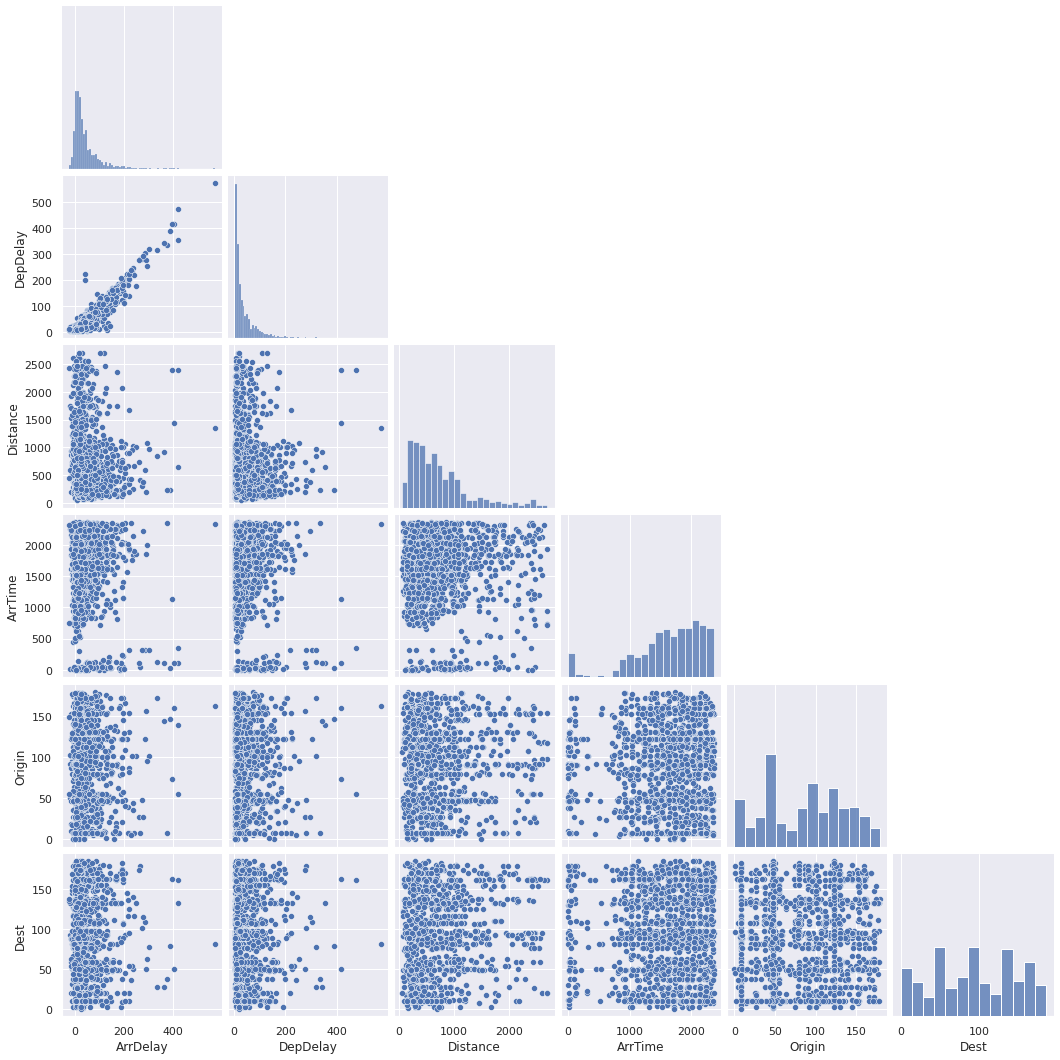

In [ ]:
sns.pairplot( X_train[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime', 'Origin', 'Dest']], corner=True)
plt.savefig("../reports/figures/train_pairplot.png")

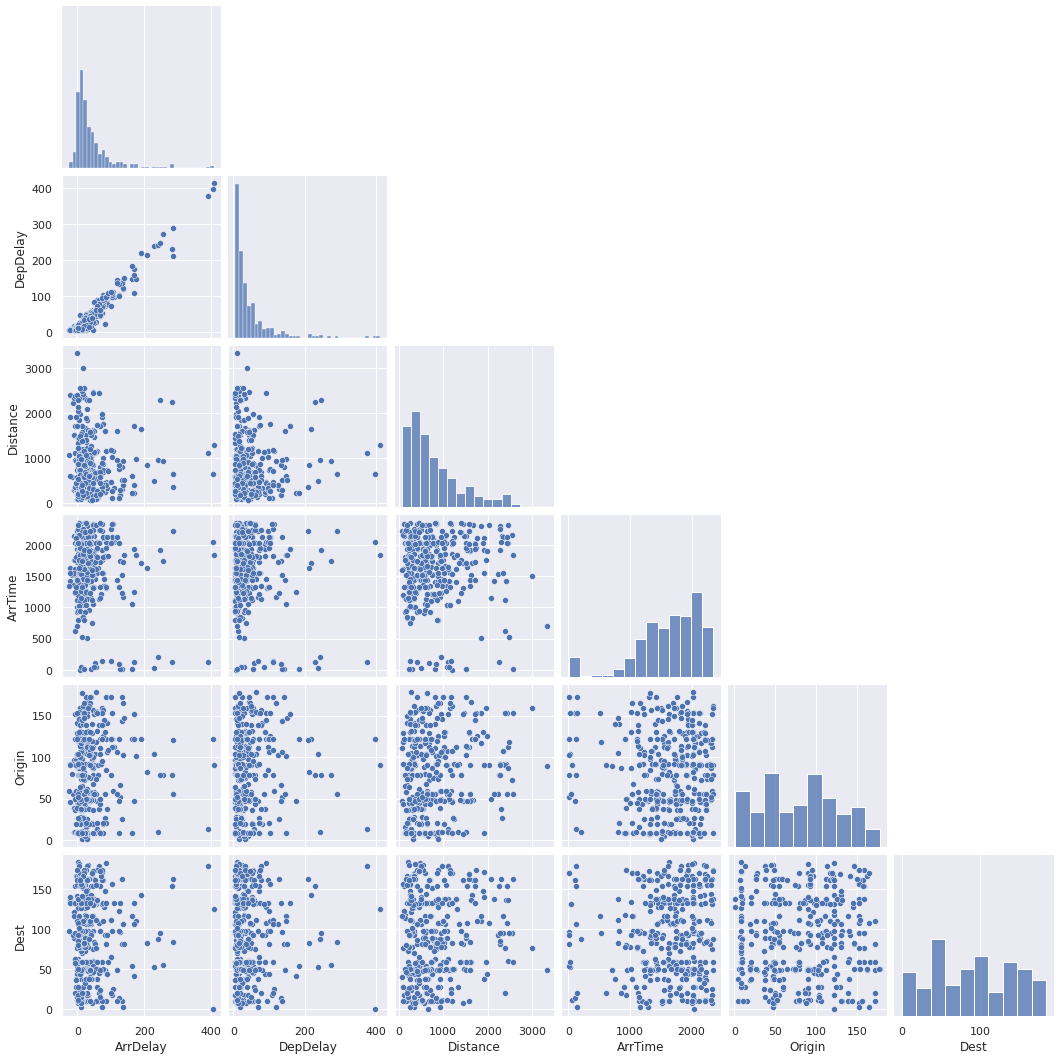

In [ ]:
sns.pairplot(X_test[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime', 'Origin', 'Dest']], corner=True)
plt.savefig("../reports/figures/test_pairplot.png")

In [ ]:
X_train.to_csv(path + "interim/X_train.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test.csv", index = False, header = True)

## Scale Train and Test Data With Standard Scaler

In [ ]:
# Import script create for Standar Scaling
# ===============================================================================

import scaling

X_train, X_test = scaling.transform(X_train, X_test, X_train.columns)

In [ ]:
X_train

Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  \
0     0.775592    0.282246   0.010214  0.872653    1.000633  1.121630   
1     1.620651   -0.885486  -1.520946 -0.478844   -0.511497 -0.001363   
2    -0.914526   -0.885486   1.030988 -1.242638   -1.226536  0.018465   
3    -1.477899    1.333204   1.541375 -0.822222   -0.827990 -0.554747   
4    -0.351153   -1.235805  -1.520946 -0.448028   -0.401311  0.406015   
...        ...         ...        ...       ...         ...       ...   
1544  0.493906   -0.885486   0.520601  0.698763    0.297317  0.932361   
1545  1.620651   -1.002259   1.541375 -0.150875   -0.066064  0.038293   
1546 -0.351153    1.683524   0.520601  0.036221    0.062878  0.159065   
1547 -1.477899    0.982885   0.010214 -1.740095   -1.765745 -1.196457   
1548 -0.632840   -1.352579   0.520601  1.301874    1.059243  1.074763   

      CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  \
0       1.228104           0.147703        0.108270  0.032151 -0.371376   
1      -0.048146           0.017228        0.195748  0.093094 -0.798750   
2      -0.050277           2.017852        2.003630  1.997563 -0.585063   
3      -0.853526          -0.722133       -0.722772 -0.897229 -0.246725   
4       0.395026           1.061032        1.085109  1.037711 -0.478219   
...          ...                ...             ...       ...       ...   
1544    0.556954          -0.229226       -0.110425 -0.165913  1.943569   
1545   -0.024709          -0.374199       -0.372860 -0.272564 -0.602870   
1546   -0.033232          -0.635150       -0.649874 -0.577278 -0.050845   
1547   -1.516153           0.162201       -0.008368  0.123566 -0.335761   
1548    0.806238          -1.026576       -1.101844 -0.881993  1.266893   

      DepDelay    Origin      Dest  Distance    TaxiIn   TaxiOut  \
0    -0.444600 -1.393059 -0.671658  0.019341  3.178172 -0.447136   
1    -0.613602  0.530839 -1.284896  0.357788 -0.159918 -0.303901   
2    -0.651158  0.903207 -1.284896  2.271451  1.175318  0.197421   
3    -0.256819 -1.351685 -0.096746 -0.990597  0.730240  0.412273   
4    -0.482156  0.117098 -0.230892  1.155297 -0.604996  0.555508   
...        ...       ...       ...       ...       ...       ...   
1544  2.203105  0.075724 -0.863295 -0.194888 -0.159918 -0.303901   
1545 -0.632380 -1.227562  1.283040 -0.436121 -0.827535 -0.303901   
1546 -0.069039 -0.110460 -1.610679 -0.648550  0.507700 -0.590370   
1547 -0.576046 -0.979318  0.267364  0.116555  0.285161  0.125803   
1548  1.245425 -0.255270 -0.288383 -0.830375 -0.827535 -0.661988   

      CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0        -0.530563     -0.234350 -0.464367      -0.053455          -0.136052   
1        -0.002281      0.003288 -0.003325       0.012296           0.005864   
2        -0.002281      0.003288 -0.003325       0.012296           0.005864   
3        -0.530563      1.484800 -0.533486      -0.053455          -0.727390   
4        -0.530563     -0.234350 -0.533486      -0.053455          -0.254319   
...            ...           ...       ...            ...                ...   
1544     -0.530563     -0.234350 -0.533486      -0.053455           3.766777   
1545     -0.002281      0.003288 -0.003325       0.012296           0.005864   
1546      0.619038     -0.234350 -0.533486      -0.053455          -0.727390   
1547     -0.156942     -0.234350 -0.153329      -0.053455          -0.727390   
1548     -0.444342     -0.234350 -0.395247      -0.053455           2.436267   

      UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  UniqueCarrier_AS  \
0            -0.164889          -0.31024         -0.025416         -0.162812   
1            -0.164889          -0.31024         -0.025416         -0.162812   
2            -0.164889          -0.31024         -0.025416         -0.162812   
3            -0.164889          -0.31024         -0.025416         -0.162812   
4            -0.164889          -0.31024         -0.0

In [ ]:
X_test

Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  \
0    1.057279    1.800297   0.520601  0.058233    0.144931  0.059924   
1   -0.914526    1.099658  -1.010559 -1.526585   -1.578194 -1.255942   
2   -1.196212   -0.885486   0.520601 -0.432620   -0.394278 -0.325823   
3    0.212219    0.749338  -1.010559  0.685556    0.813082  0.739488   
4    1.620651    0.399019   0.520601 -1.253644   -1.683691 -0.828736   
..        ...         ...        ...       ...         ...       ...   
383 -1.196212   -0.885486   0.520601  0.216715    0.168375  0.521378   
384 -0.632840   -1.469352   0.010214  0.179295    0.191819  0.234772   
385 -0.069467   -1.119032   0.520601 -0.003399   -0.073097 -0.024796   
386 -0.069467   -1.119032   0.520601  0.421420    0.531755  0.743093   
387 -0.632840   -0.301620   1.541375  1.271059    1.352291  1.262229   

     CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  \
0      0.017903          -0.997582       -0.810250 -0.912465 -0.745328   
1     -1.671690          -1.142555       -1.072685 -1.171473 -0.335761   
2     -0.472142          -0.867106       -0.810250 -0.851522 -0.460412   
3      0.838198           1.495950        1.814094  1.738555 -0.887787   
4     -1.494847           0.785584        0.501922  0.992003  1.694267   
..          ...                ...             ...       ...       ...   
383    0.407809          -0.359701       -0.329121 -0.257328 -0.157689   
384    0.199007          -0.388696       -0.445758 -0.455393 -0.531641   
385   -0.259079          -1.273030       -1.349699 -1.247651  0.020384   
386    0.667747           0.075217       -0.227063 -0.181149 -0.139881   
387    1.434775          -0.765625       -0.664454 -0.562043 -0.709714   

     DepDelay    Origin      Dest  Distance    TaxiIn   TaxiOut  CarrierDelay  \
0   -0.538490 -0.151834  0.612311 -0.778168 -0.604996 -0.447136     -0.002281   
1   -0.256819  0.737710  0.459001 -1.077009 -1.050075  0.197421      0.159198   
2   -0.407044 -1.206875  1.455514 -0.702558  0.507700 -0.447136     -0.530563   
3   -0.538490  0.737710  1.148894  1.774582 -0.827535 -0.518753     -0.002281   
4    1.414427  1.627254 -1.763989  0.354187 -0.159918 -0.733605     -0.415602   
..        ...       ...       ...       ...       ...       ...           ...   
383 -0.125373  0.737710 -1.093259 -0.248896 -0.159918 -0.518753     -0.530563   
384 -0.632380 -0.172521 -1.419042 -0.583742  0.062622  0.197421     -0.002281   
385 -0.069039  0.510152  0.439837 -1.194025 -0.604996 -0.232283      0.619038   
386 -0.538490  0.344656 -1.284896 -0.227293 -0.827535  1.486534     -0.501823   
387 -0.613602 -0.710385 -1.591515 -0.376713 -0.604996 -0.948457     -0.002281   

     WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0        0.003288 -0.003325       0.012296           0.005864   
1       -0.234350 -0.533486      -0.053455          -0.727390   
2       -0.234350 -0.533486      -0.053455          -0.224753   
3        0.003288 -0.003325       0.012296           0.005864   
4       -0.234350  0.123149      -0.053455           2.672803   
..            ...       ...            ...                ...   
383      0.477022 -0.533486      -0.053455          -0.076918   
384      0.003288 -0.003325       0.012296           0.005864   
385     -0.234350 -0.395247      -0.053455          -0.727390   
386     -0.234350  0.157708      -0.053455          -0.313453   
387      0.003288 -0.003325       0.012296           0.005864   

     UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  UniqueCarrier_AS  \
0           -0.164889         -0.310240         -0.025416         -0.162812   
1           -0.164889         -0.310240         -0.025416         -0.162812   
2           -0.164889         -0.310240         -0.025416         -0.162812   
3           -0.164889          3.223307         -0.025416         -0.162812   
4           -0.164889         -0.310240         -0.025416         -0.162812   
..                ...     

In [ ]:
X_train.describe().round(3)

Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  \
count  1549.000    1549.000   1549.000  1549.000    1549.000  1549.000   
mean     -0.000       0.000     -0.000     0.000      -0.000    -0.000   
std       1.000       1.000      1.000     1.000       1.000     1.000   
min      -1.478      -1.703     -1.521    -3.340      -3.430    -2.912   
25%      -0.915      -0.885     -1.011    -0.690      -0.769    -0.513   
50%      -0.069       0.049      0.010     0.067       0.098     0.202   
75%       0.776       0.866      0.521     0.734       0.813     0.747   
max       1.621       1.800      1.541     1.832       2.077     1.336   

       CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  \
count    1549.000           1549.000        1549.000  1549.000  1549.000   
mean       -0.000             -0.000           0.000    -0.000     0.000   
std         1.000              1.000           1.000     1.000     1.000   
min        -3.496             -1.418          -1.466    -1.385    -1.191   
25%        -0.640             -0.751          -0.737    -0.745    -0.603   
50%         0.156             -0.244          -0.227    -0.257    -0.336   
75%         0.787              0.423           0.429     0.383     0.234   
max         1.529              4.134           4.205     3.734     9.369   

       DepDelay    Origin      Dest  Distance    TaxiIn   TaxiOut  \
count  1549.000  1549.000  1549.000  1549.000  1549.000  1549.000   
mean     -0.000     0.000     0.000    -0.000    -0.000     0.000   
std       1.000     1.000     1.000     1.000     1.000     1.000   
min      -0.707    -1.786    -1.802    -1.246    -1.273    -1.235   
25%      -0.595    -0.814    -0.863    -0.724    -0.605    -0.590   
50%      -0.369     0.076     0.018    -0.258    -0.160    -0.304   
75%       0.175     0.738     0.842     0.410     0.285     0.197   
max       9.902     1.917     1.743     3.541     7.851     8.505   

       CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
count      1549.000      1549.000  1549.000       1549.000           1549.000   
mean         -0.000        -0.000     0.000          0.000             -0.000   
std           1.000         1.000     1.000          1.000              1.000   
min          -0.531        -0.234    -0.533         -0.053             -0.727   
25%          -0.531        -0.234    -0.533         -0.053             -0.727   
50%          -0.002        -0.234    -0.015         -0.053              0.006   
75%          -0.002         0.003    -0.003          0.012              0.006   
max          15.823        16.661    14.016         37.873             10.715   

       UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  UniqueCarrier_AS  \
count          1549.000          1549.000          1549.000          1549.000   
mean              0.000             0.000             0.000            -0.000   
std               1.000             1.000             1.000             1.000   
min              -0.165            -0.310            -0.025            -0.163   
25%              -0.165            -0.310            -0.025            -0.163   
50%              -0.165            -0.310            -0.025            -0.163   
75%              -0.165            -0.310            -0.025            -0.163   
max               6.065             3.223            39.345             6.142   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count          1549.000          1549.000          1549.000          1549.000   
mean              0.000             0.000             0.000             0.000   
std               1.000             1.000             1.000             1.000   
min              -0.179            -0.218            -0.257            -0.213   
25%              -0.179            -0.218            -0.257            -0.213   
50%              -0.179            -0.218            -0.257            -0.213   
75%      

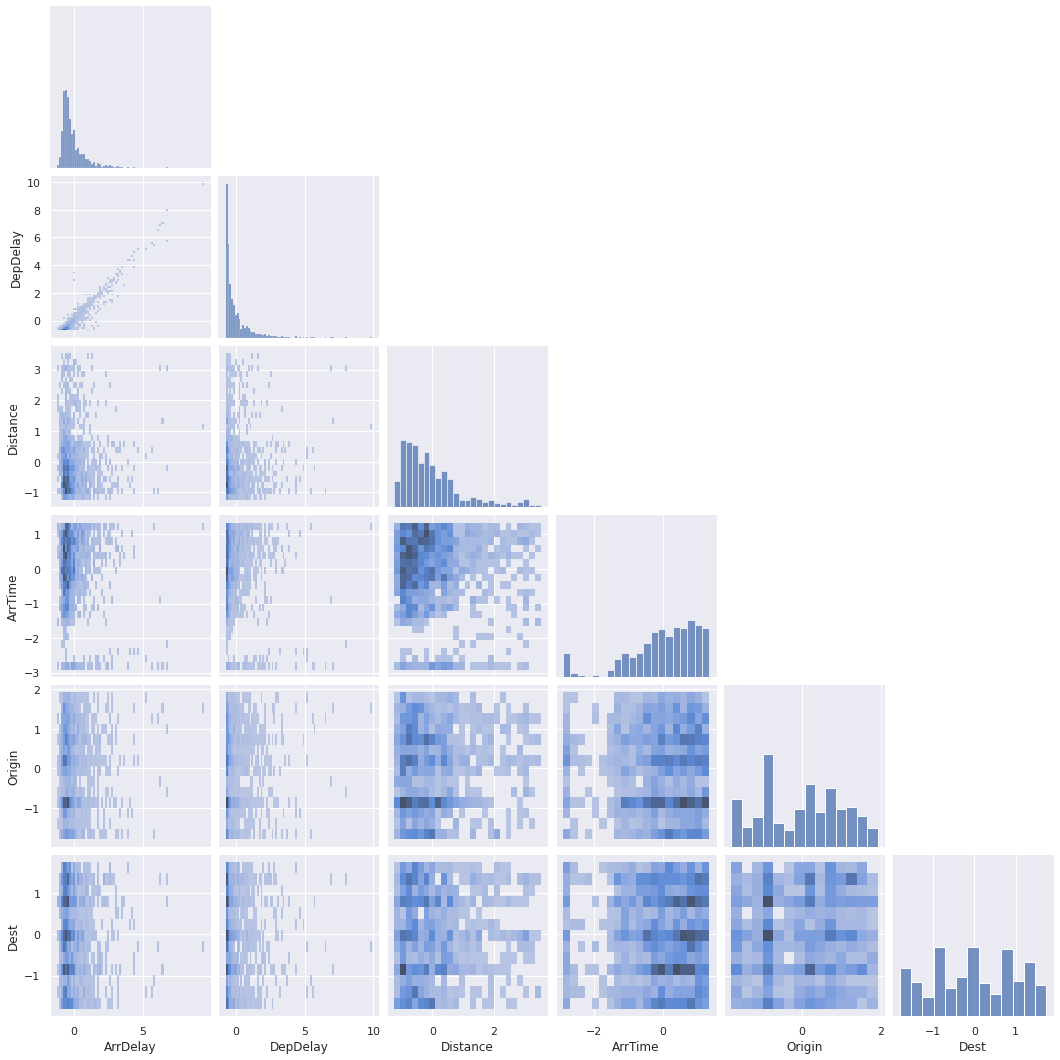

In [ ]:
sns.pairplot(X_train[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime', 'Origin', 'Dest']], kind="hist", corner=True)
plt.savefig("../reports/figures/X_train_stand_pairplot.png")

In [ ]:
X_test.describe().round(3)

Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
count  388.000     388.000    388.000  388.000     388.000  388.000   
mean    -0.082       0.033     -0.002    0.024      -0.010    0.019   
std      0.964       1.035      0.988    0.914       0.944    0.944   
min     -1.478      -1.703     -1.521   -3.321      -2.047   -2.912   
25%     -0.915      -0.885     -1.011   -0.642      -0.759   -0.485   
50%     -0.069      -0.010      0.010    0.040      -0.043    0.183   
75%      0.494       0.983      0.521    0.710       0.791    0.735   
max      1.621       1.800      1.541    1.806       1.950    1.327   

       CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  \
count     388.000            388.000         388.000  388.000   388.000   
mean        0.011              0.077           0.108    0.100    -0.034   
std         0.937              1.084           1.093    1.095     1.034   
min        -3.496             -1.389          -1.437   -1.385    -1.208   
25%        -0.604             -0.766          -0.737   -0.745    -0.603   
50%         0.033             -0.200          -0.220   -0.250    -0.336   
75%         0.764              0.557           0.575    0.588     0.101   
max         1.529              4.511           3.928    4.039     6.502   

       DepDelay   Origin     Dest  Distance   TaxiIn  TaxiOut  CarrierDelay  \
count   388.000  388.000  388.000   388.000  388.000  388.000       388.000   
mean      0.002   -0.131   -0.067     0.112   -0.036   -0.080        -0.011   
std       1.039    0.989    0.982     1.112    0.965    0.802         0.956   
min      -0.707   -1.765   -1.802    -1.198   -1.273   -0.948        -0.531   
25%      -0.576   -0.855   -0.863    -0.740   -0.605   -0.519        -0.531   
50%      -0.351   -0.152   -0.097    -0.228   -0.160   -0.304        -0.002   
75%       0.156    0.686    0.746     0.600    0.285    0.054        -0.002   
max       6.916    1.896    1.724     4.666    8.297    4.781        11.195   

       WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
count       388.000   388.000        388.000            388.000   
mean          0.016    -0.017          0.061              0.029   
std           0.952     1.097          1.556              1.053   
min          -0.234    -0.533         -0.053             -0.727   
25%          -0.234    -0.533         -0.053             -0.727   
50%          -0.234    -0.003         -0.053              0.006   
75%           0.003    -0.003          0.012              0.006   
max          13.400    13.498         30.288             10.390   

       UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  UniqueCarrier_AS  \
count           388.000           388.000           388.000           388.000   
mean              0.028            -0.001            -0.025            -0.049   
std               1.080             1.000             0.000             0.840   
min              -0.165            -0.310            -0.025            -0.163   
25%              -0.165            -0.310            -0.025            -0.163   
50%              -0.165            -0.310            -0.025            -0.163   
75%              -0.165            -0.310            -0.025            -0.163   
max               6.065             3.223            -0.025             6.142   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count           388.000           388.000           388.000           388.000   
mean             -0.015             0.068             0.021            -0.048   
std               0.959             1.138             1.038             0.886   
min              -0.179            -0.218            -0.257            -0.213   
25%              -0.179            -0.218            -0.257            -0.213   
50%              -0.179            -0.218            -0.257            -0.213   
75%              -0.179            -0.218            -0.257            -0.213   

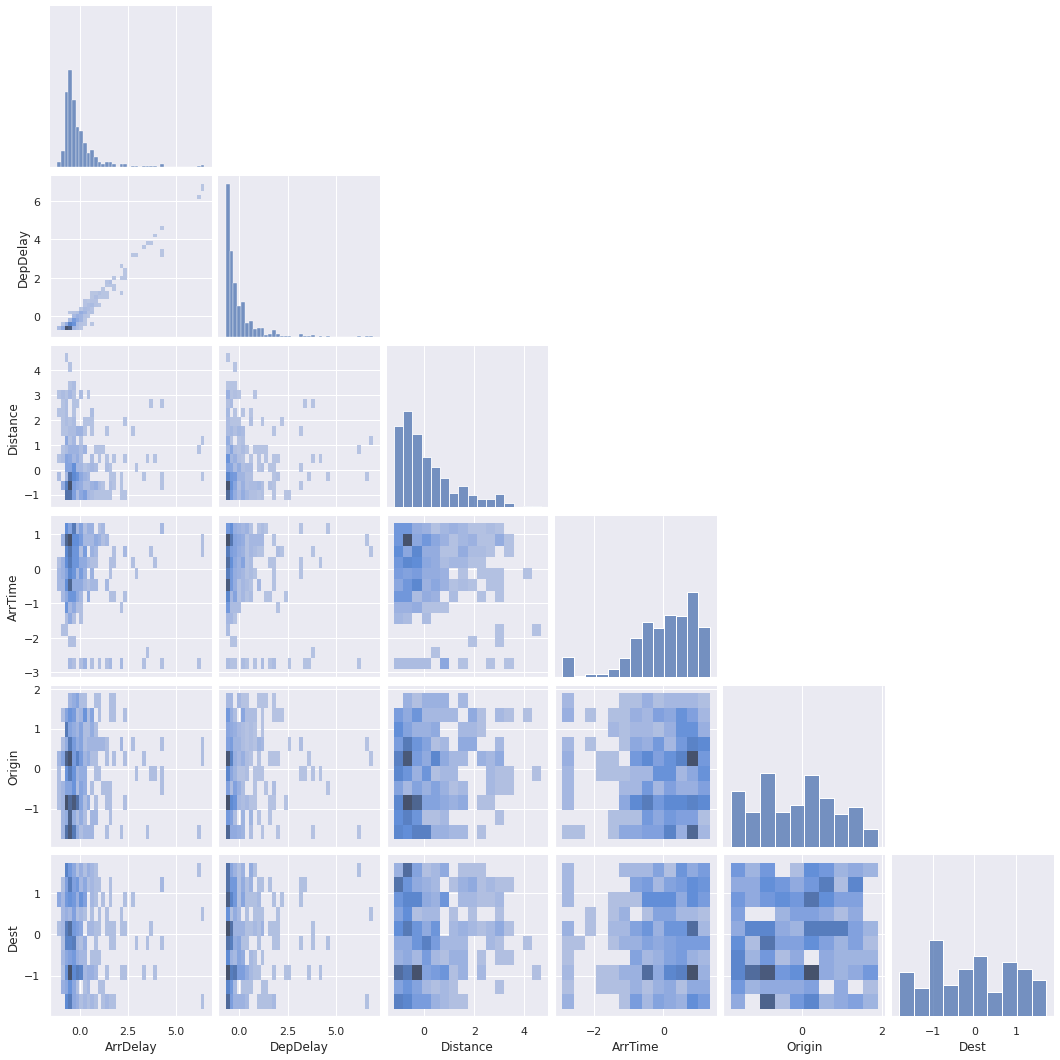

In [ ]:
sns.pairplot(X_test[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime', 'Origin', 'Dest']], kind="hist" , corner=True)
plt.savefig("../reports/figures/X_test_stand_pairplot.png")

## Distribution of new Numerical Variable X train

In [ ]:
X_train.select_dtypes(include=['float64', 'int']).describe().round(2)

Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
count  1549.00     1549.00    1549.00  1549.00     1549.00  1549.00   
mean     -0.00        0.00      -0.00     0.00       -0.00    -0.00   
std       1.00        1.00       1.00     1.00        1.00     1.00   
min      -1.48       -1.70      -1.52    -3.34       -3.43    -2.91   
25%      -0.91       -0.89      -1.01    -0.69       -0.77    -0.51   
50%      -0.07        0.05       0.01     0.07        0.10     0.20   
75%       0.78        0.87       0.52     0.73        0.81     0.75   
max       1.62        1.80       1.54     1.83        2.08     1.34   

       CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  \
count     1549.00            1549.00         1549.00  1549.00   1549.00   
mean        -0.00              -0.00            0.00    -0.00      0.00   
std          1.00               1.00            1.00     1.00      1.00   
min         -3.50              -1.42           -1.47    -1.38     -1.19   
25%         -0.64              -0.75           -0.74    -0.74     -0.60   
50%          0.16              -0.24           -0.23    -0.26     -0.34   
75%          0.79               0.42            0.43     0.38      0.23   
max          1.53               4.13            4.21     3.73      9.37   

       DepDelay   Origin     Dest  Distance   TaxiIn  TaxiOut  CarrierDelay  \
count   1549.00  1549.00  1549.00   1549.00  1549.00  1549.00       1549.00   
mean      -0.00     0.00     0.00     -0.00    -0.00     0.00         -0.00   
std        1.00     1.00     1.00      1.00     1.00     1.00          1.00   
min       -0.71    -1.79    -1.80     -1.25    -1.27    -1.23         -0.53   
25%       -0.59    -0.81    -0.86     -0.72    -0.60    -0.59         -0.53   
50%       -0.37     0.08     0.02     -0.26    -0.16    -0.30         -0.00   
75%        0.18     0.74     0.84      0.41     0.29     0.20         -0.00   
max        9.90     1.92     1.74      3.54     7.85     8.51         15.82   

       WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
count       1549.00   1549.00        1549.00            1549.00   
mean          -0.00      0.00           0.00              -0.00   
std            1.00      1.00           1.00               1.00   
min           -0.23     -0.53          -0.05              -0.73   
25%           -0.23     -0.53          -0.05              -0.73   
50%           -0.23     -0.02          -0.05               0.01   
75%            0.00     -0.00           0.01               0.01   
max           16.66     14.02          37.87              10.71   

       UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  UniqueCarrier_AS  \
count           1549.00           1549.00           1549.00           1549.00   
mean               0.00              0.00              0.00             -0.00   
std                1.00              1.00              1.00              1.00   
min               -0.16             -0.31             -0.03             -0.16   
25%               -0.16             -0.31             -0.03             -0.16   
50%               -0.16             -0.31             -0.03             -0.16   
75%               -0.16             -0.31             -0.03             -0.16   
max                6.06              3.22             39.34              6.14   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count           1549.00           1549.00           1549.00           1549.00   
mean               0.00              0.00              0.00              0.00   
std                1.00              1.00              1.00              1.00   
min               -0.18             -0.22             -0.26             -0.21   
25%               -0.18             -0.22             -0.26             -0.21   
50%               -0.18             -0.22             -0.26             -0.21   
75%               -0.18             -0.22             -0.26             -0.21   

In [ ]:
labels = ['UniqueCarrier_9E','UniqueCarrier_AA','UniqueCarrier_AQ','UniqueCarrier_AS','UniqueCarrier_B6','UniqueCarrier_CO','UniqueCarrier_DL','UniqueCarrier_EV','UniqueCarrier_F9','UniqueCarrier_FL','UniqueCarrier_HA','UniqueCarrier_MQ','UniqueCarrier_NW','UniqueCarrier_OH','UniqueCarrier_OO','UniqueCarrier_UA','UniqueCarrier_US','UniqueCarrier_WN','UniqueCarrier_XE','UniqueCarrier_YV']

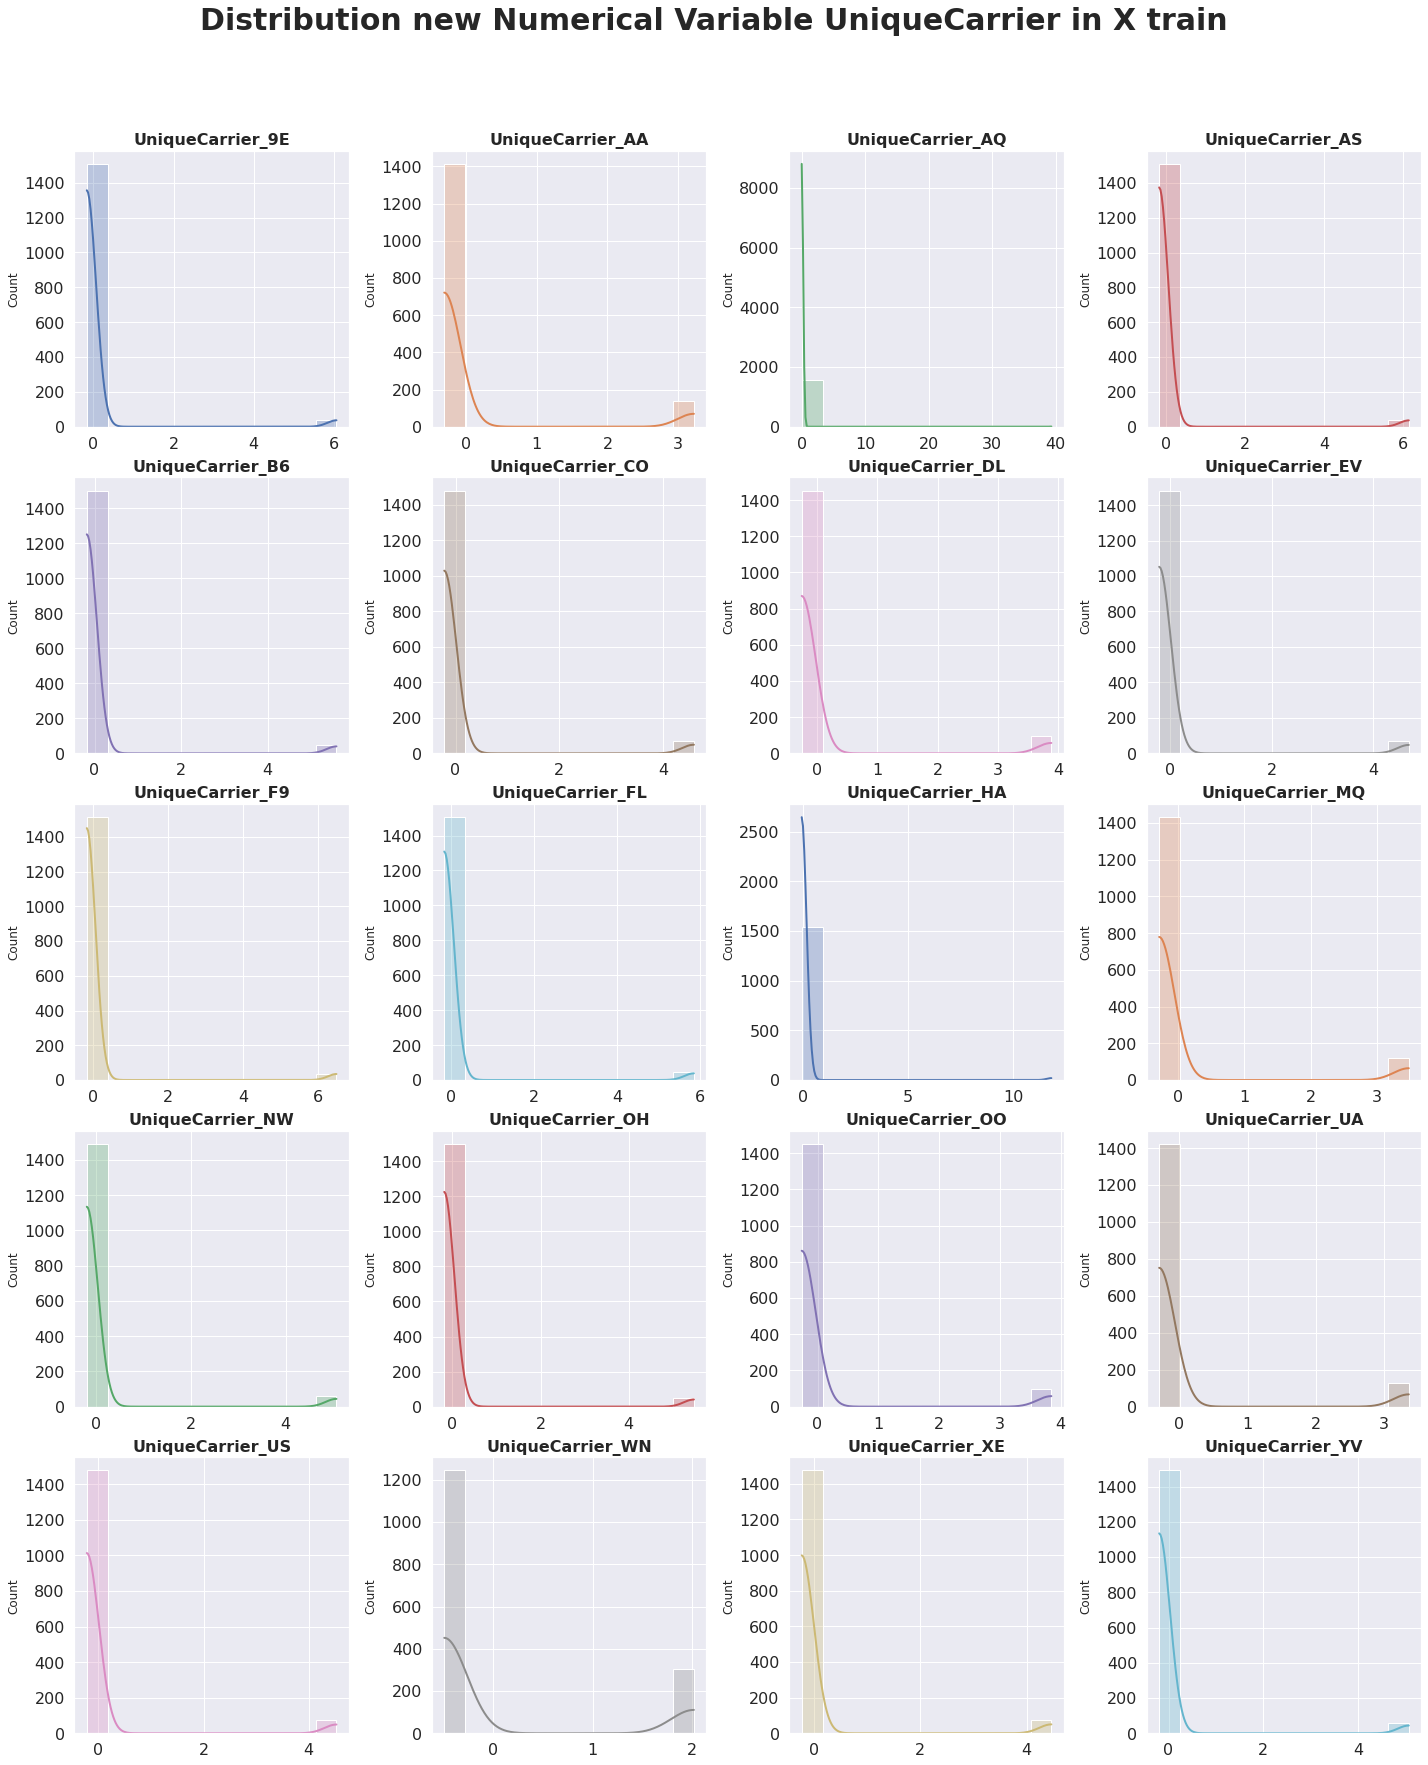

In [ ]:
# Distribution graph for each numerical variable 'UniqueCarrier'
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20,25))
axes = axes.flat
columnas_numeric = X_train[labels].columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = X_train,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution new Numerical Variable UniqueCarrier in X train', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable_Xtrain_UniqueCarrier.png")

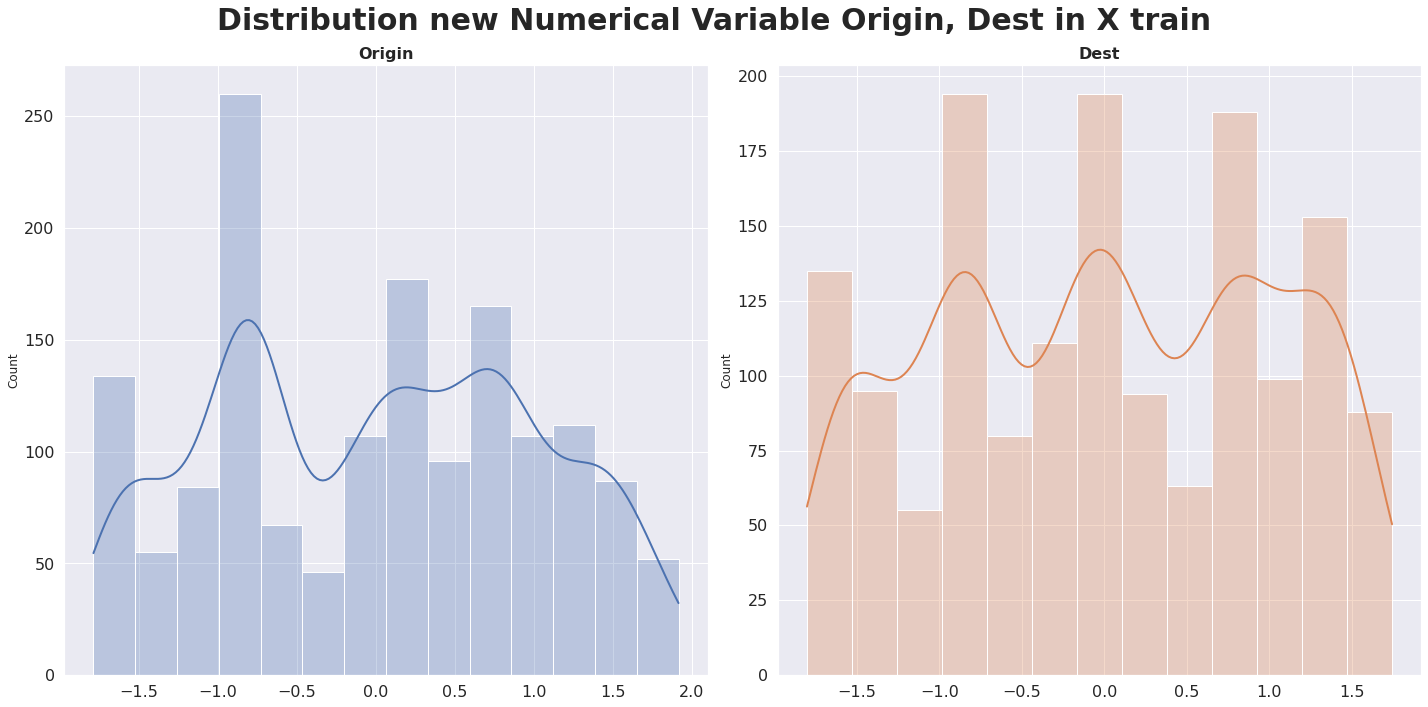

In [ ]:
# Distribution graph for each numerical variable 'Origin', 'Dest'
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=2, nrows=1,  figsize=(20, 10))
axes = axes.flat
columnas_numeric = X_train[['Origin', 'Dest']].columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = X_train,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution new Numerical Variable Origin, Dest in X train', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable_Xtrain_Origin_Dest.png")

## Numerical variables correlation X train

In [ ]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = X_train.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

variable_1         variable_2         r     abs_r
350     CRSElapsedTime           Distance  0.981690  0.981690
596           Distance     CRSElapsedTime  0.981690  0.981690
386            AirTime     CRSElapsedTime  0.980839  0.980839
345     CRSElapsedTime            AirTime  0.980839  0.980839
392            AirTime           Distance  0.976897  0.976897
597           Distance            AirTime  0.976897  0.976897
385            AirTime  ActualElapsedTime  0.976390  0.976390
303  ActualElapsedTime            AirTime  0.976390  0.976390
302  ActualElapsedTime     CRSElapsedTime  0.966291  0.966291
343     CRSElapsedTime  ActualElapsedTime  0.966291  0.966291

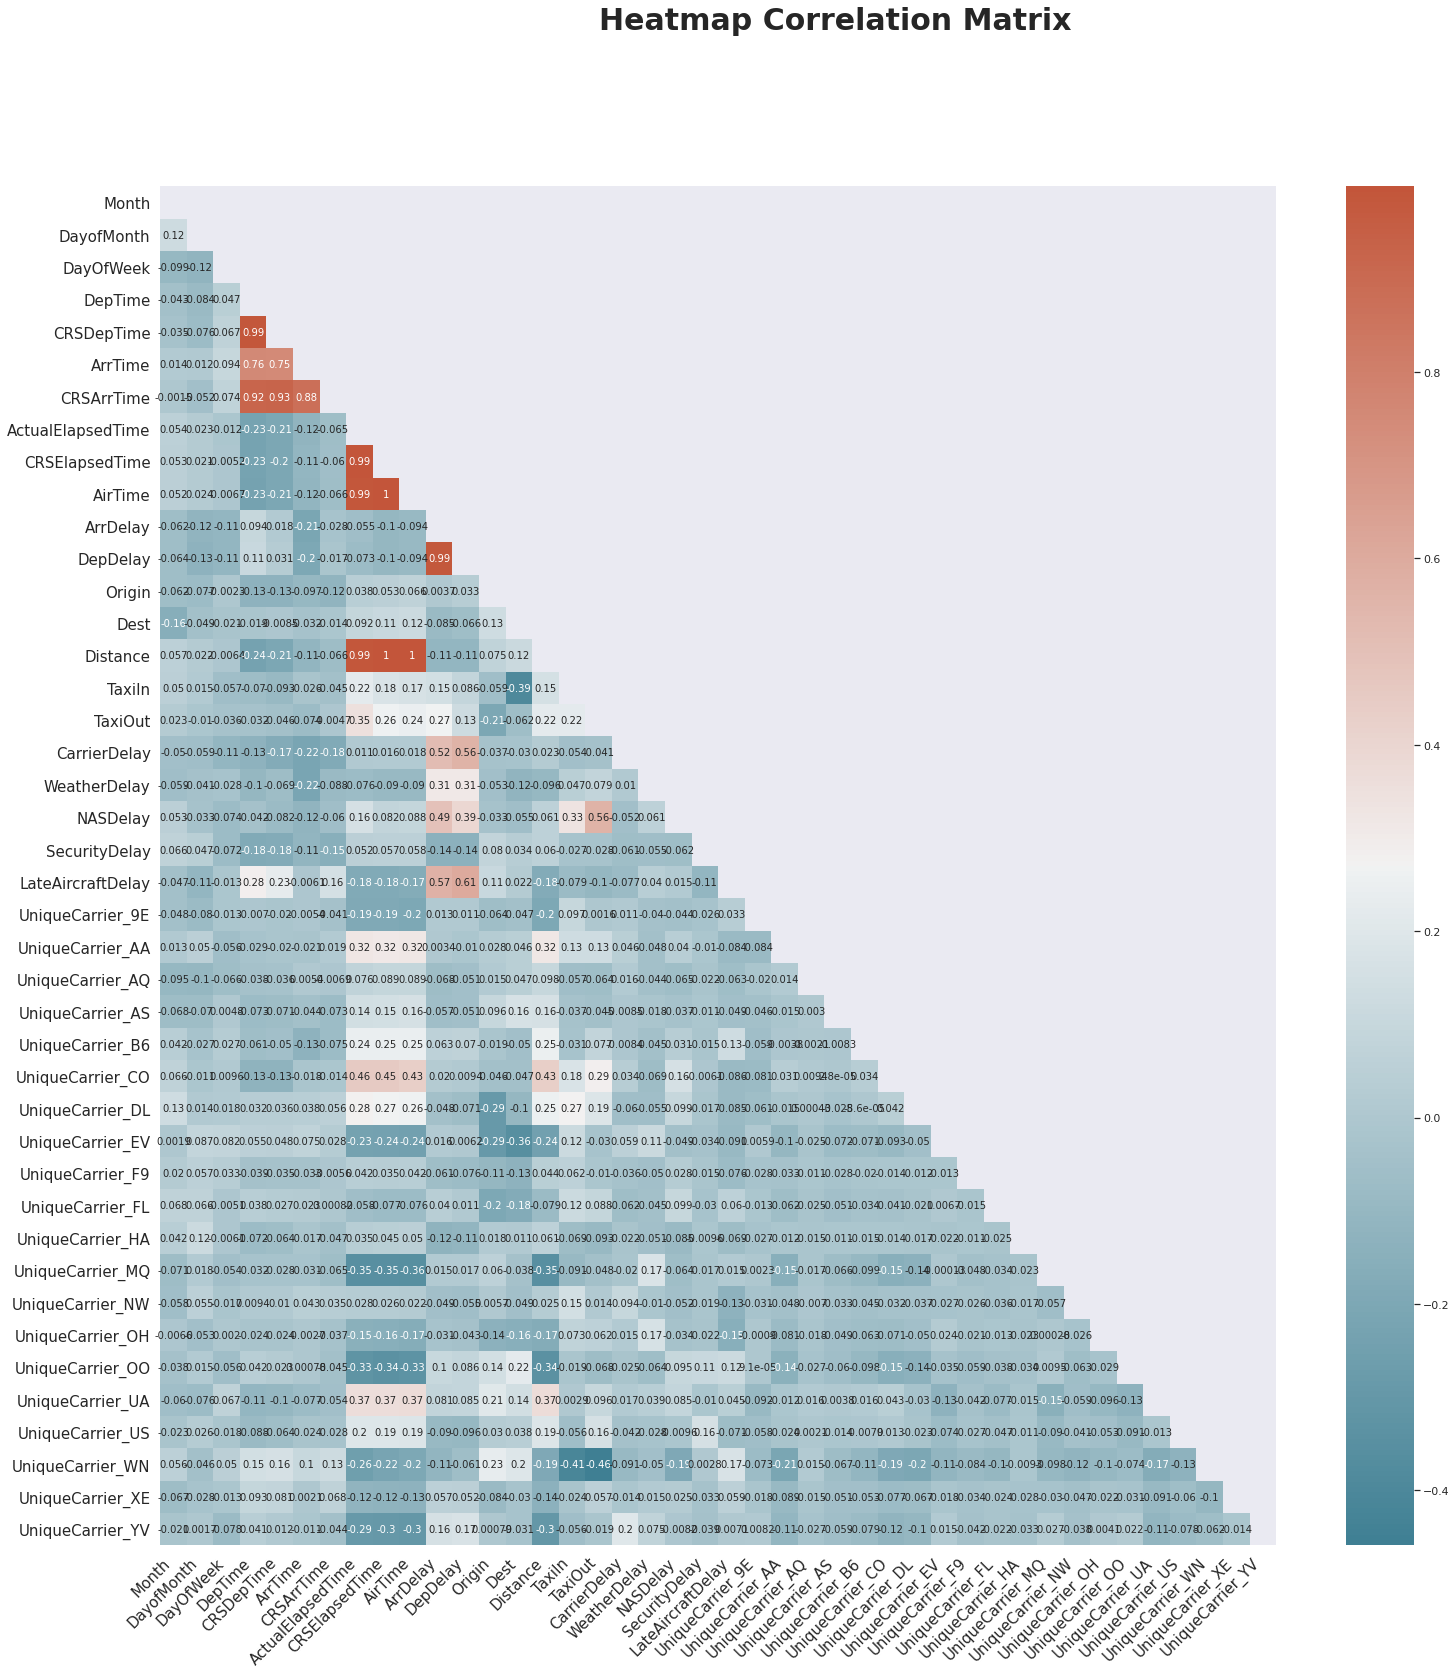

In [ ]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

corr= df.select_dtypes(include=['float64', 'int']).corr(method='pearson').corr()

# Getting the Upper Triangle of the co-relation matrix

matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, 
            annot=True, 
            mask=matrix, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            annot_kws = {"size": 10})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)

fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png")

## Distribution new Numerical Variable X test

In [ ]:
X_test.select_dtypes(include=['float64', 'int']).describe().round(2)

Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
count  388.00      388.00     388.00   388.00      388.00   388.00   
mean    -0.08        0.03      -0.00     0.02       -0.01     0.02   
std      0.96        1.04       0.99     0.91        0.94     0.94   
min     -1.48       -1.70      -1.52    -3.32       -2.05    -2.91   
25%     -0.91       -0.89      -1.01    -0.64       -0.76    -0.48   
50%     -0.07       -0.01       0.01     0.04       -0.04     0.18   
75%      0.49        0.98       0.52     0.71        0.79     0.73   
max      1.62        1.80       1.54     1.81        1.95     1.33   

       CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  \
count      388.00             388.00          388.00   388.00    388.00   
mean         0.01               0.08            0.11     0.10     -0.03   
std          0.94               1.08            1.09     1.09      1.03   
min         -3.50              -1.39           -1.44    -1.38     -1.21   
25%         -0.60              -0.77           -0.74    -0.74     -0.60   
50%          0.03              -0.20           -0.22    -0.25     -0.34   
75%          0.76               0.56            0.57     0.59      0.10   
max          1.53               4.51            3.93     4.04      6.50   

       DepDelay  Origin    Dest  Distance  TaxiIn  TaxiOut  CarrierDelay  \
count    388.00  388.00  388.00    388.00  388.00   388.00        388.00   
mean       0.00   -0.13   -0.07      0.11   -0.04    -0.08         -0.01   
std        1.04    0.99    0.98      1.11    0.96     0.80          0.96   
min       -0.71   -1.77   -1.80     -1.20   -1.27    -0.95         -0.53   
25%       -0.58   -0.86   -0.86     -0.74   -0.60    -0.52         -0.53   
50%       -0.35   -0.15   -0.10     -0.23   -0.16    -0.30         -0.00   
75%        0.16    0.69    0.75      0.60    0.29     0.05         -0.00   
max        6.92    1.90    1.72      4.67    8.30     4.78         11.20   

       WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
count        388.00    388.00         388.00             388.00   
mean           0.02     -0.02           0.06               0.03   
std            0.95      1.10           1.56               1.05   
min           -0.23     -0.53          -0.05              -0.73   
25%           -0.23     -0.53          -0.05              -0.73   
50%           -0.23     -0.00          -0.05               0.01   
75%            0.00     -0.00           0.01               0.01   
max           13.40     13.50          30.29              10.39   

       UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  UniqueCarrier_AS  \
count            388.00            388.00            388.00            388.00   
mean               0.03             -0.00             -0.03             -0.05   
std                1.08              1.00              0.00              0.84   
min               -0.16             -0.31             -0.03             -0.16   
25%               -0.16             -0.31             -0.03             -0.16   
50%               -0.16             -0.31             -0.03             -0.16   
75%               -0.16             -0.31             -0.03             -0.16   
max                6.06              3.22             -0.03              6.14   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count            388.00            388.00            388.00            388.00   
mean              -0.02              0.07              0.02             -0.05   
std                0.96              1.14              1.04              0.89   
min               -0.18             -0.22             -0.26             -0.21   
25%               -0.18             -0.22             -0.26             -0.21   
50%               -0.18             -0.22             -0.26             -0.21   
75%               -0.18             -0.22             -0.26             -0.21   
max                5.59           

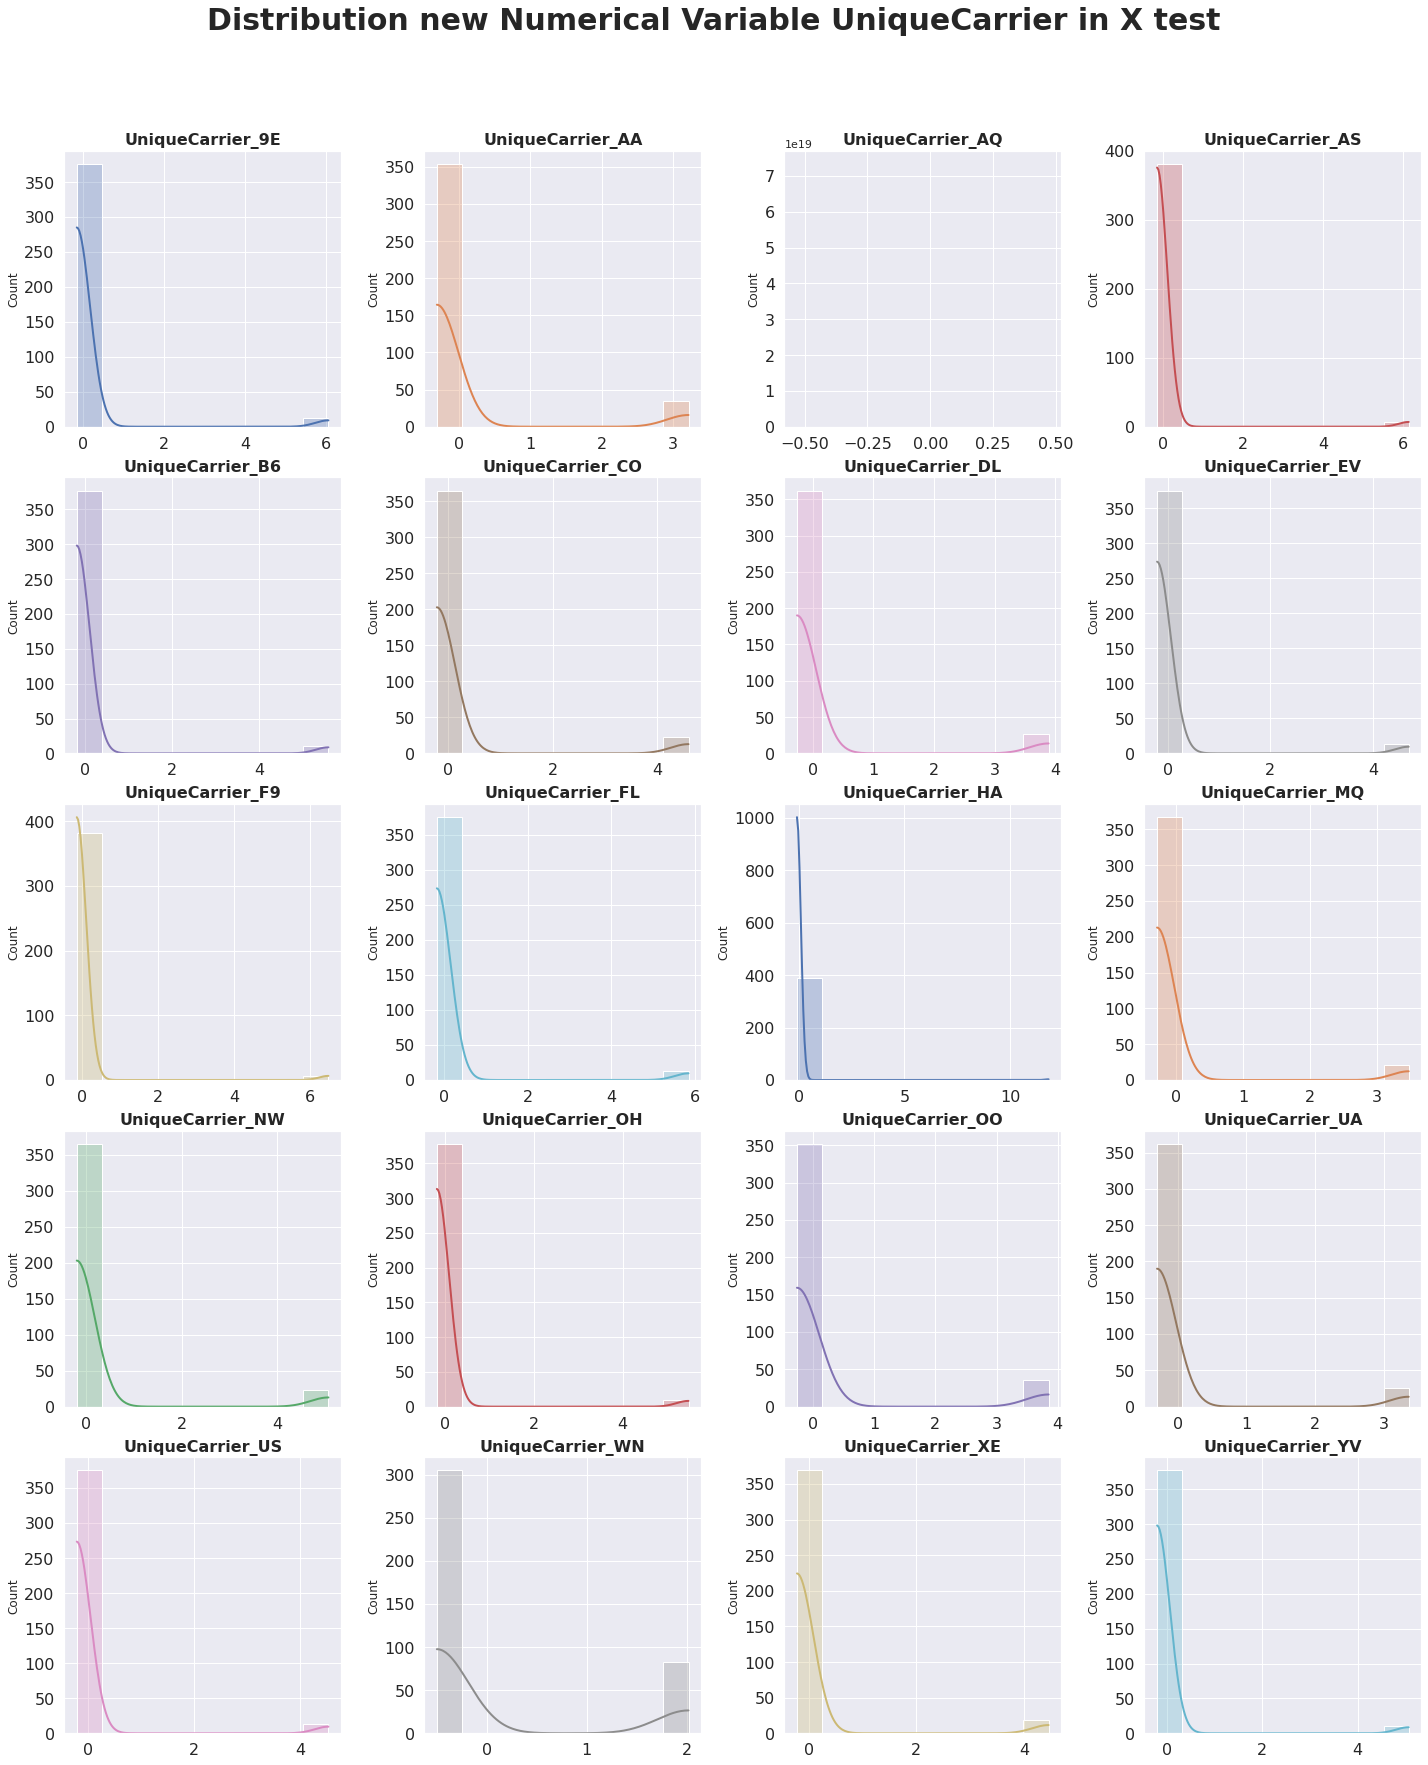

In [ ]:
# Distribution graph for each numerical variable 'UniqueCarrier'
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20,25))
axes = axes.flat
columnas_numeric = X_test[labels].columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = X_test.round(2),
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution new Numerical Variable UniqueCarrier in X test', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable_Xtest_UniqueCarrier.png")

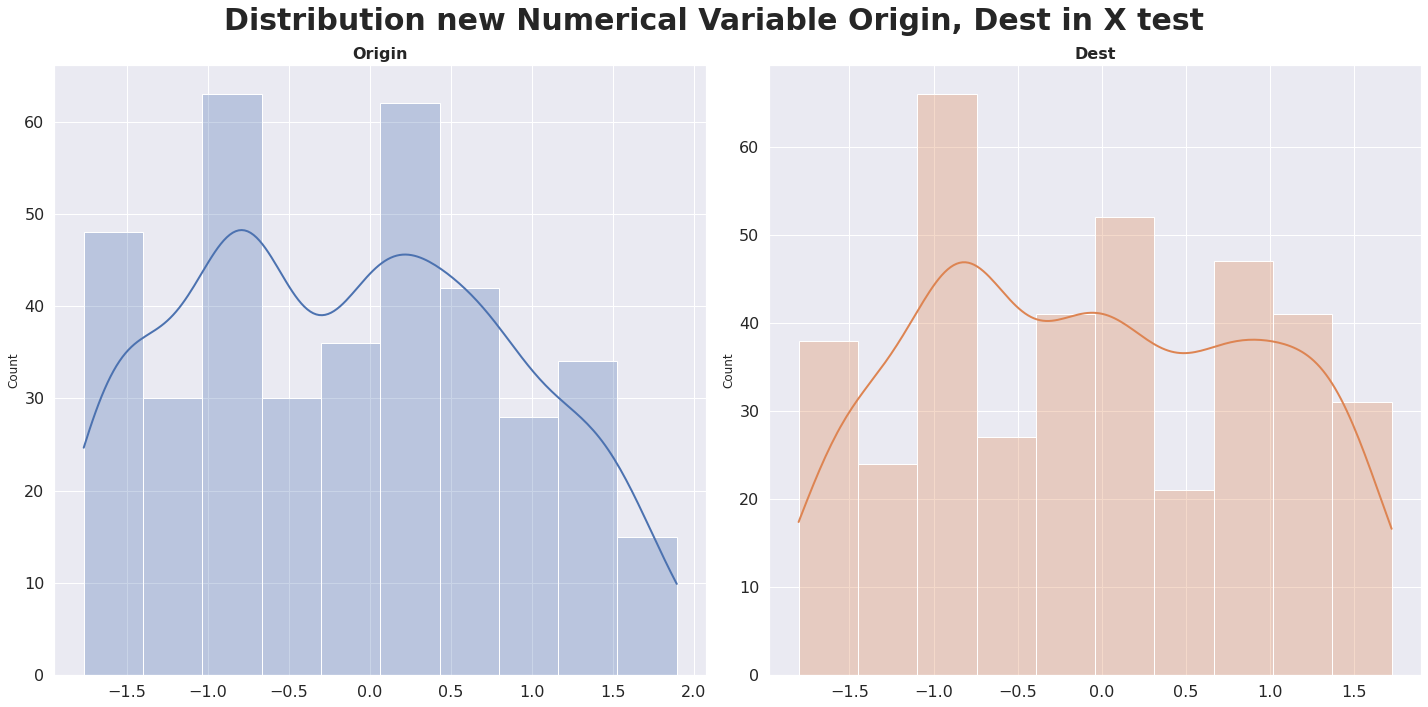

In [ ]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flat
columnas_numeric = X_test[['Origin', 'Dest']].columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = X_test,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution new Numerical Variable Origin, Dest in X test', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable_Xtest_Origin_Dest.png")

## Numerical variables correlation X test

In [ ]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = X_test.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

variable_1         variable_2         r     abs_r
386            AirTime     CRSElapsedTime  0.989780  0.989780
345     CRSElapsedTime            AirTime  0.989780  0.989780
385            AirTime  ActualElapsedTime  0.987601  0.987601
303  ActualElapsedTime            AirTime  0.987601  0.987601
597           Distance            AirTime  0.985549  0.985549
392            AirTime           Distance  0.985549  0.985549
343     CRSElapsedTime  ActualElapsedTime  0.984599  0.984599
302  ActualElapsedTime     CRSElapsedTime  0.984599  0.984599
350     CRSElapsedTime           Distance  0.982630  0.982630
596           Distance     CRSElapsedTime  0.982630  0.982630

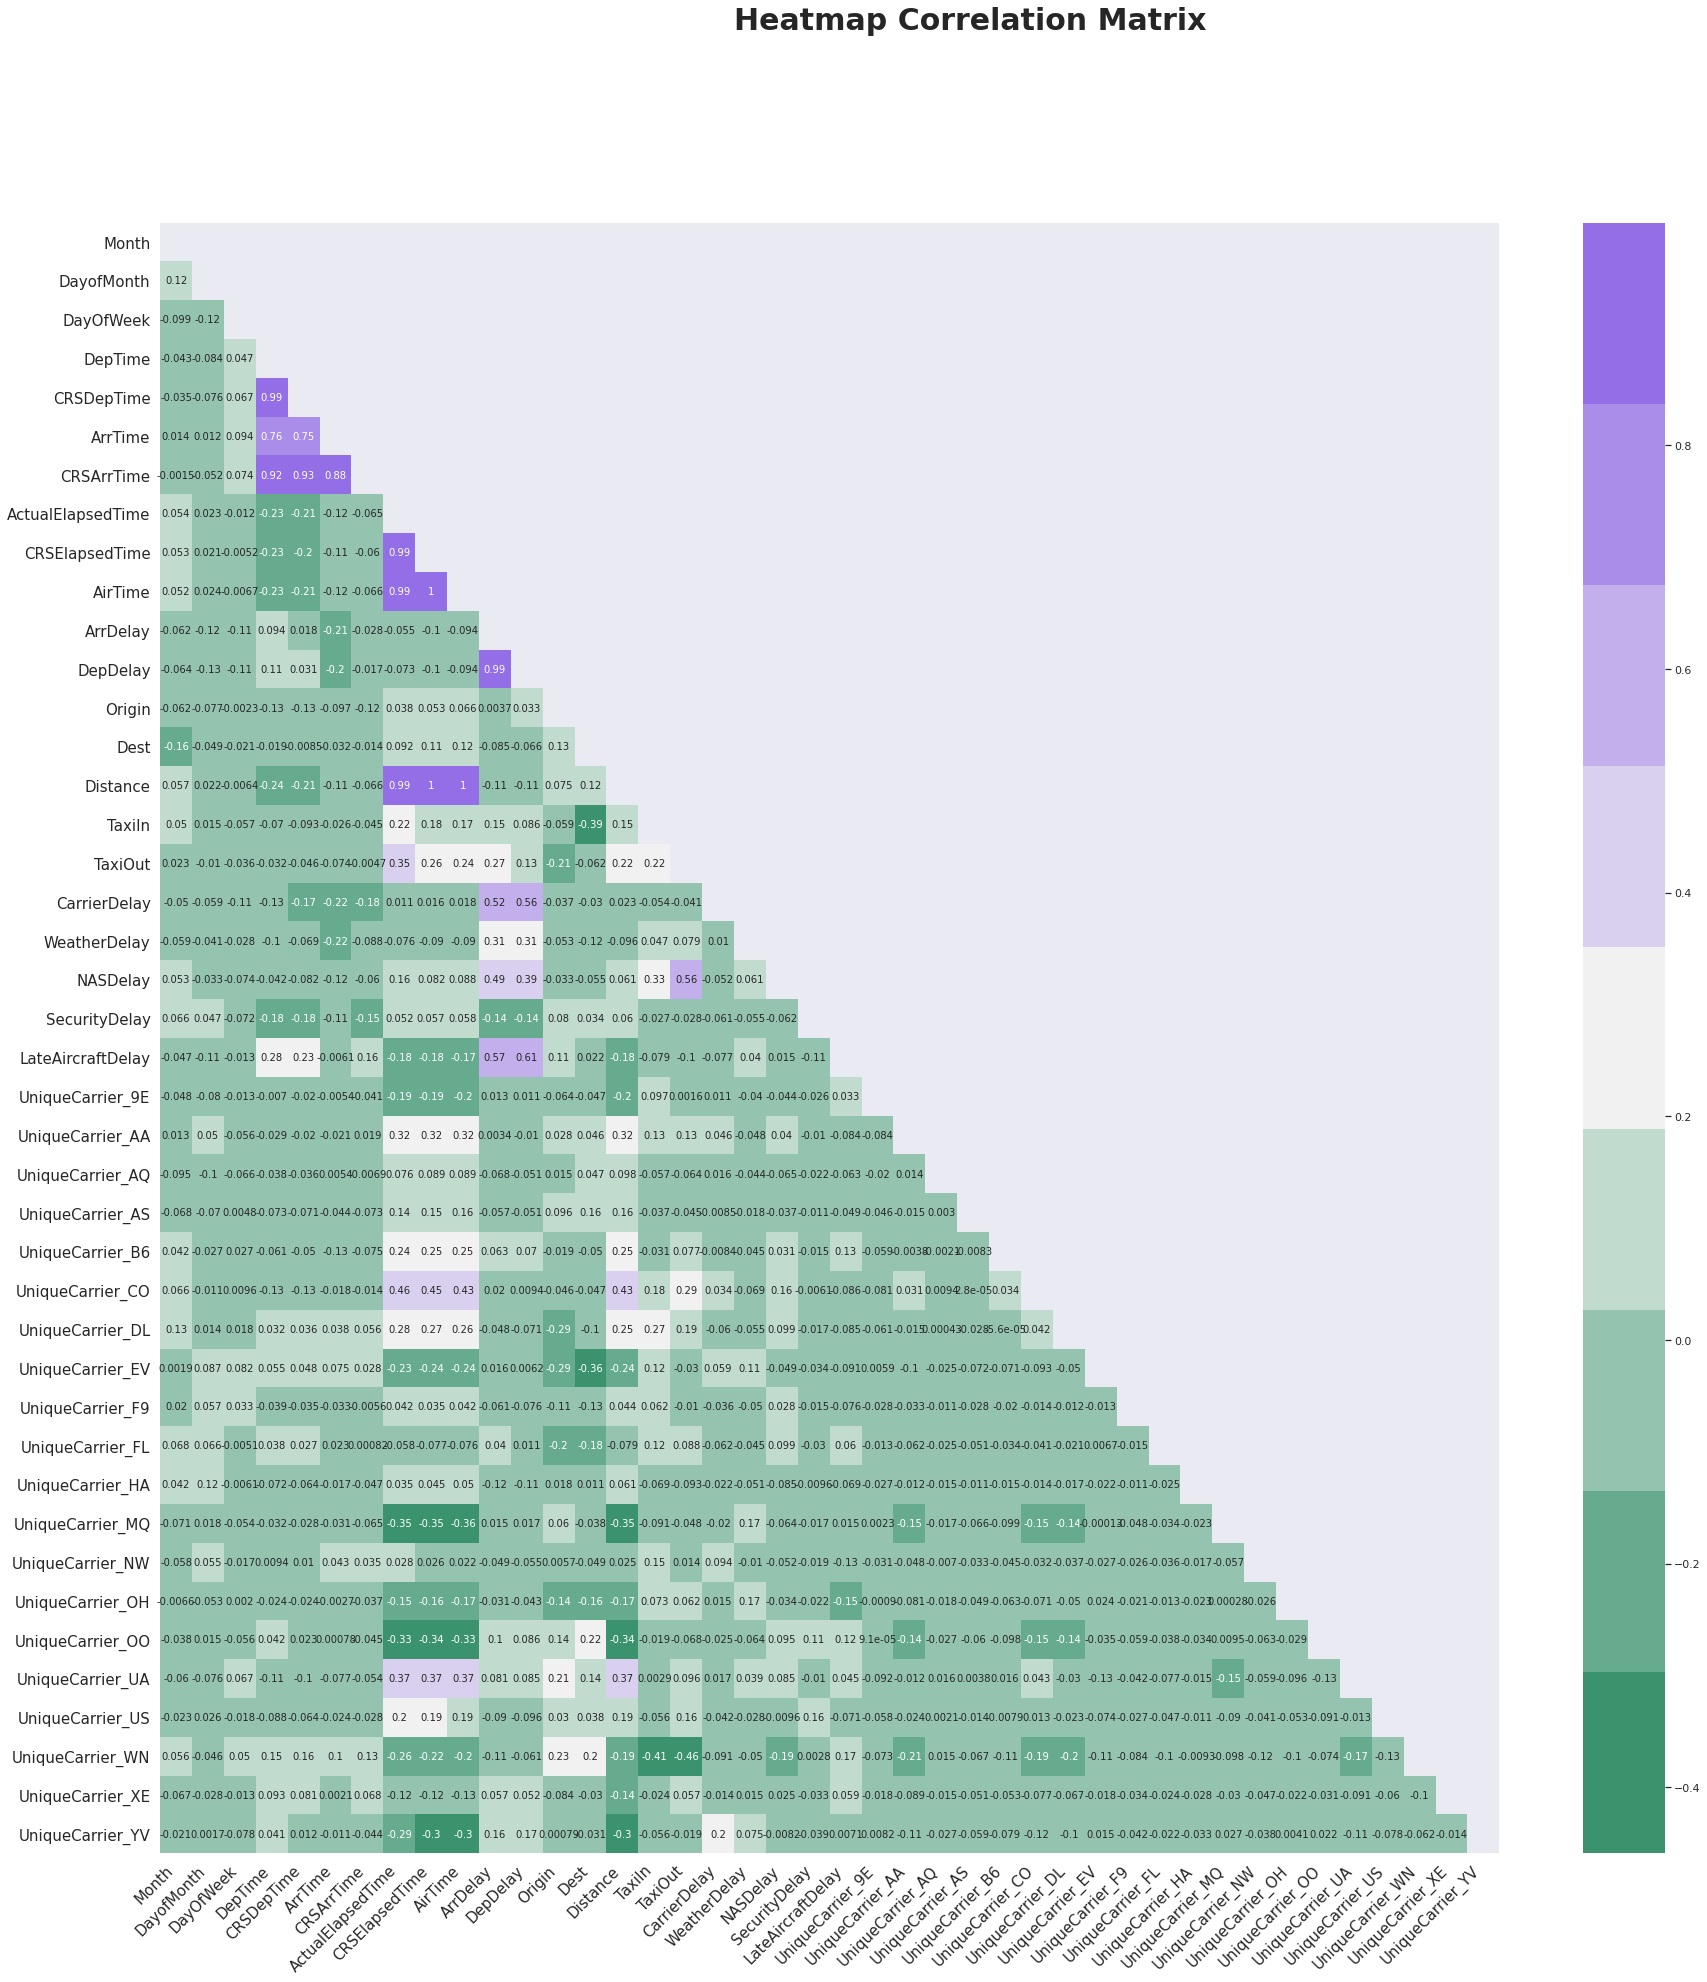

In [ ]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))

corr= df.select_dtypes(include=['float64', 'int']).corr(method='pearson').corr()

# Getting the Upper Triangle of the co-relation matrix

matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, 
            annot=True, 
            mask=matrix, 
            cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
            annot_kws = {"size": 10})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)

fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png")